In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import Pool, CatBoostRegressor
from gmdhpy import gmdh 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.model_selection import cross_val_score, cross_validate, KFold, LeaveOneOut, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
data = pd.read_csv('data.csv', sep=",")

<h3>Проведём анализ данных</h3>

In [3]:
data.head()

,Serial_No.,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.dtypes

Serial_No.             int64
GRE                    int64
TOEFL                  int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

In [5]:
data.isnull().sum()

Serial_No.           0
GRE                  0
TOEFL                0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [6]:
data.corr().Chance_of_Admit

Serial_No.           0.042336
GRE                  0.802610
TOEFL                0.791594
University_Rating    0.711250
SOP                  0.675732
LOR                  0.669889
CGPA                 0.873289
Research             0.553202
Chance_of_Admit      1.000000
Name: Chance_of_Admit, dtype: float64

In [7]:
data.drop(['Serial_No.'], axis=1, inplace=True)

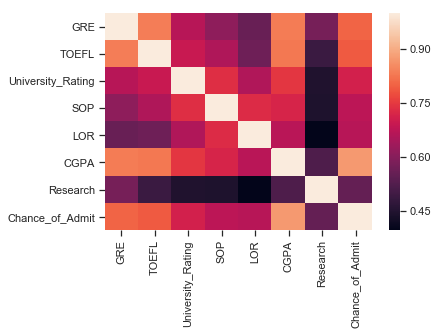

In [8]:
sns.heatmap(data.corr())

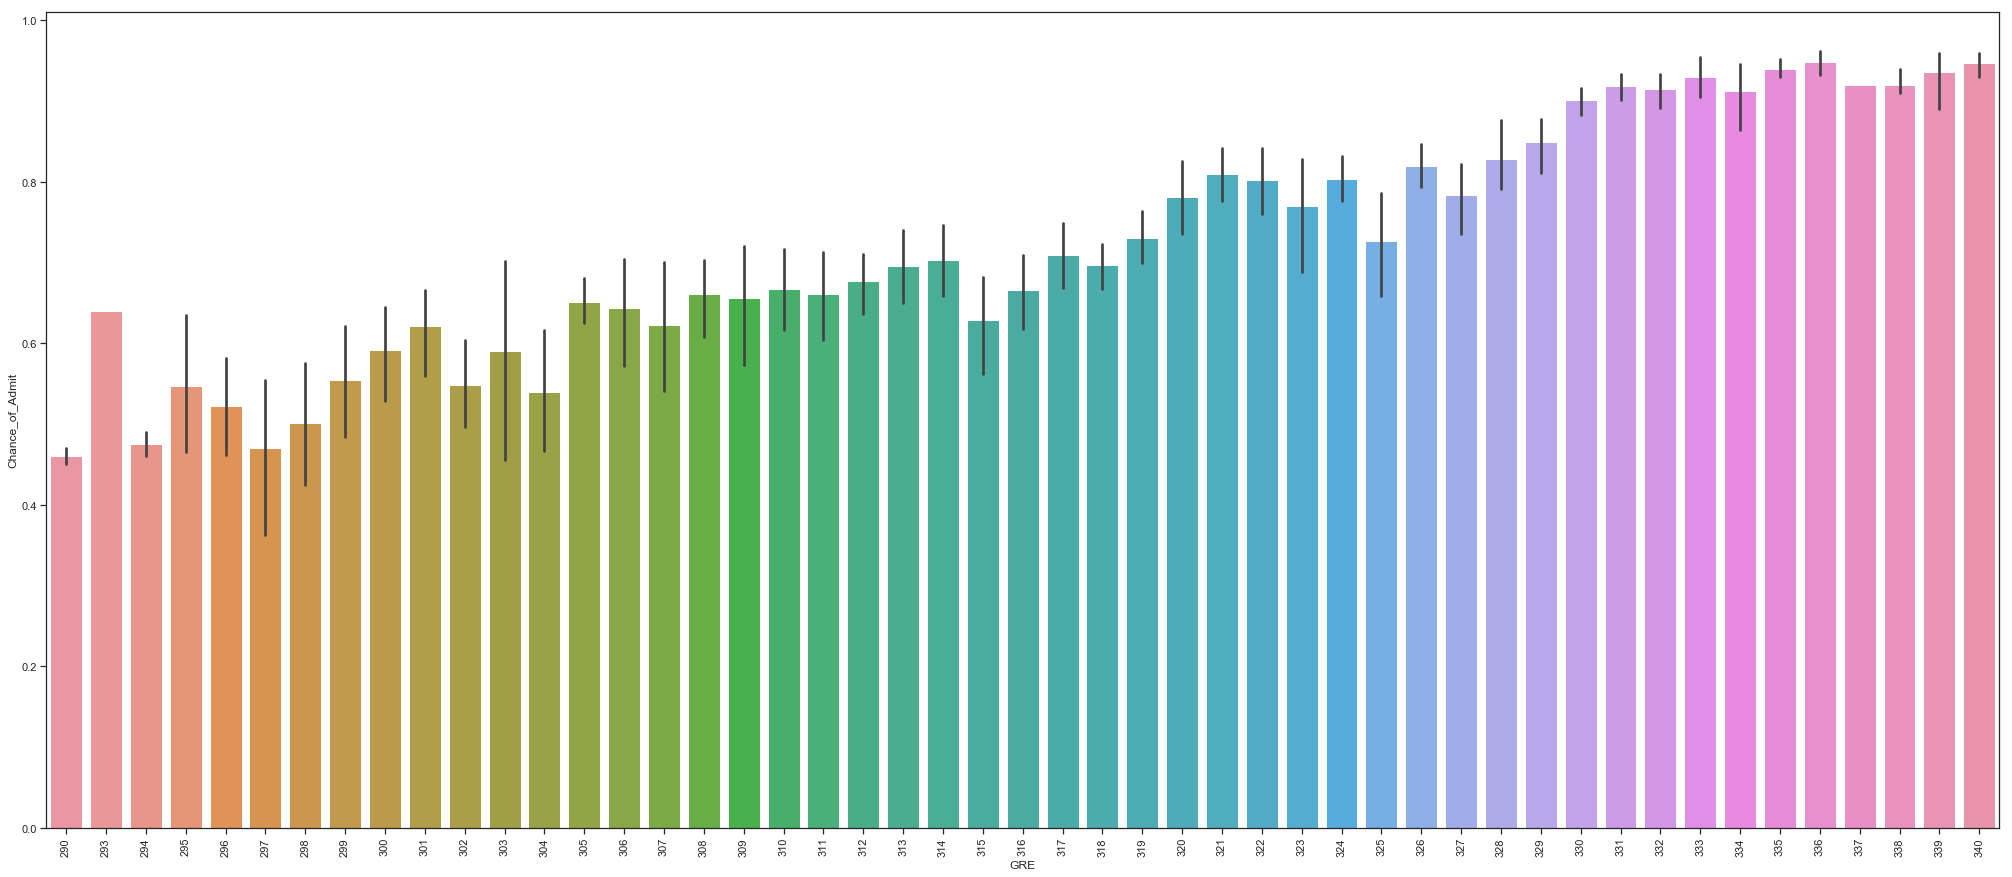

In [9]:
plt.figure(figsize=(35,15))
sns.barplot(x='GRE',y='Chance_of_Admit',data=data)
plt.xticks(rotation='vertical')
plt.show()

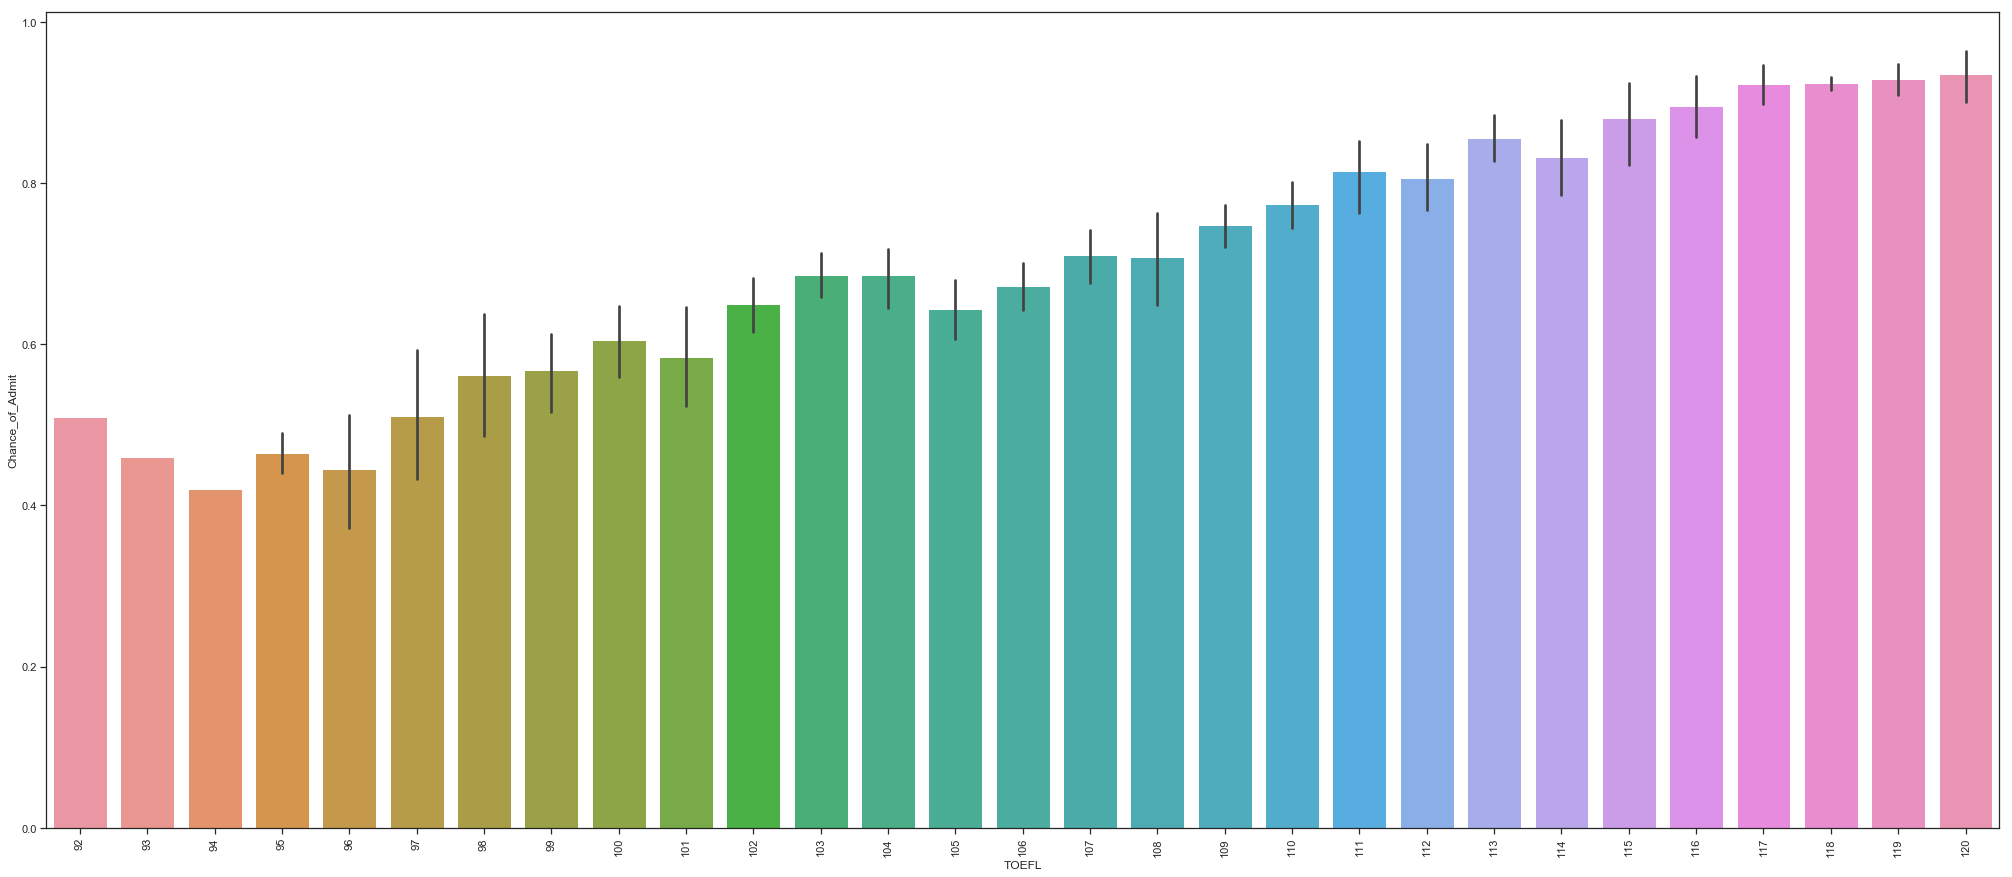

In [10]:
plt.figure(figsize=(35,15))
sns.barplot(x='TOEFL',y='Chance_of_Admit',data=data)
plt.xticks(rotation='vertical')
plt.show()

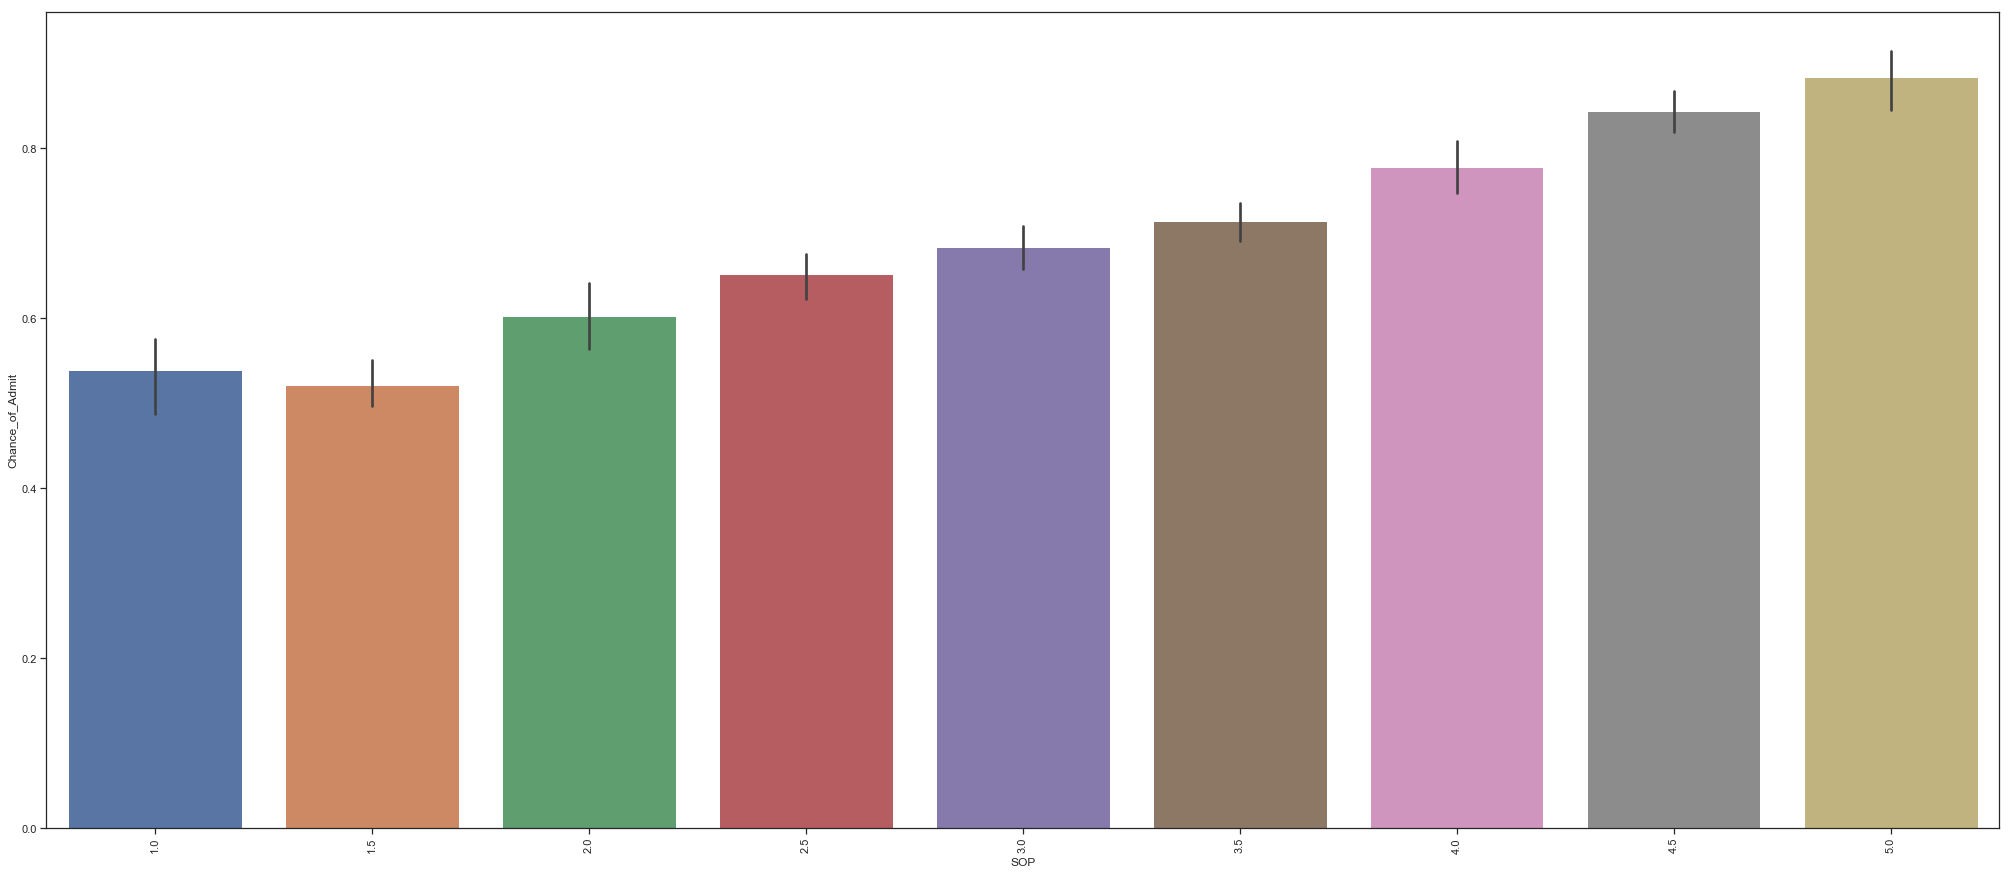

In [11]:
plt.figure(figsize=(35,15))
sns.barplot(x='SOP',y='Chance_of_Admit',data=data)
plt.xticks(rotation='vertical')
plt.show()

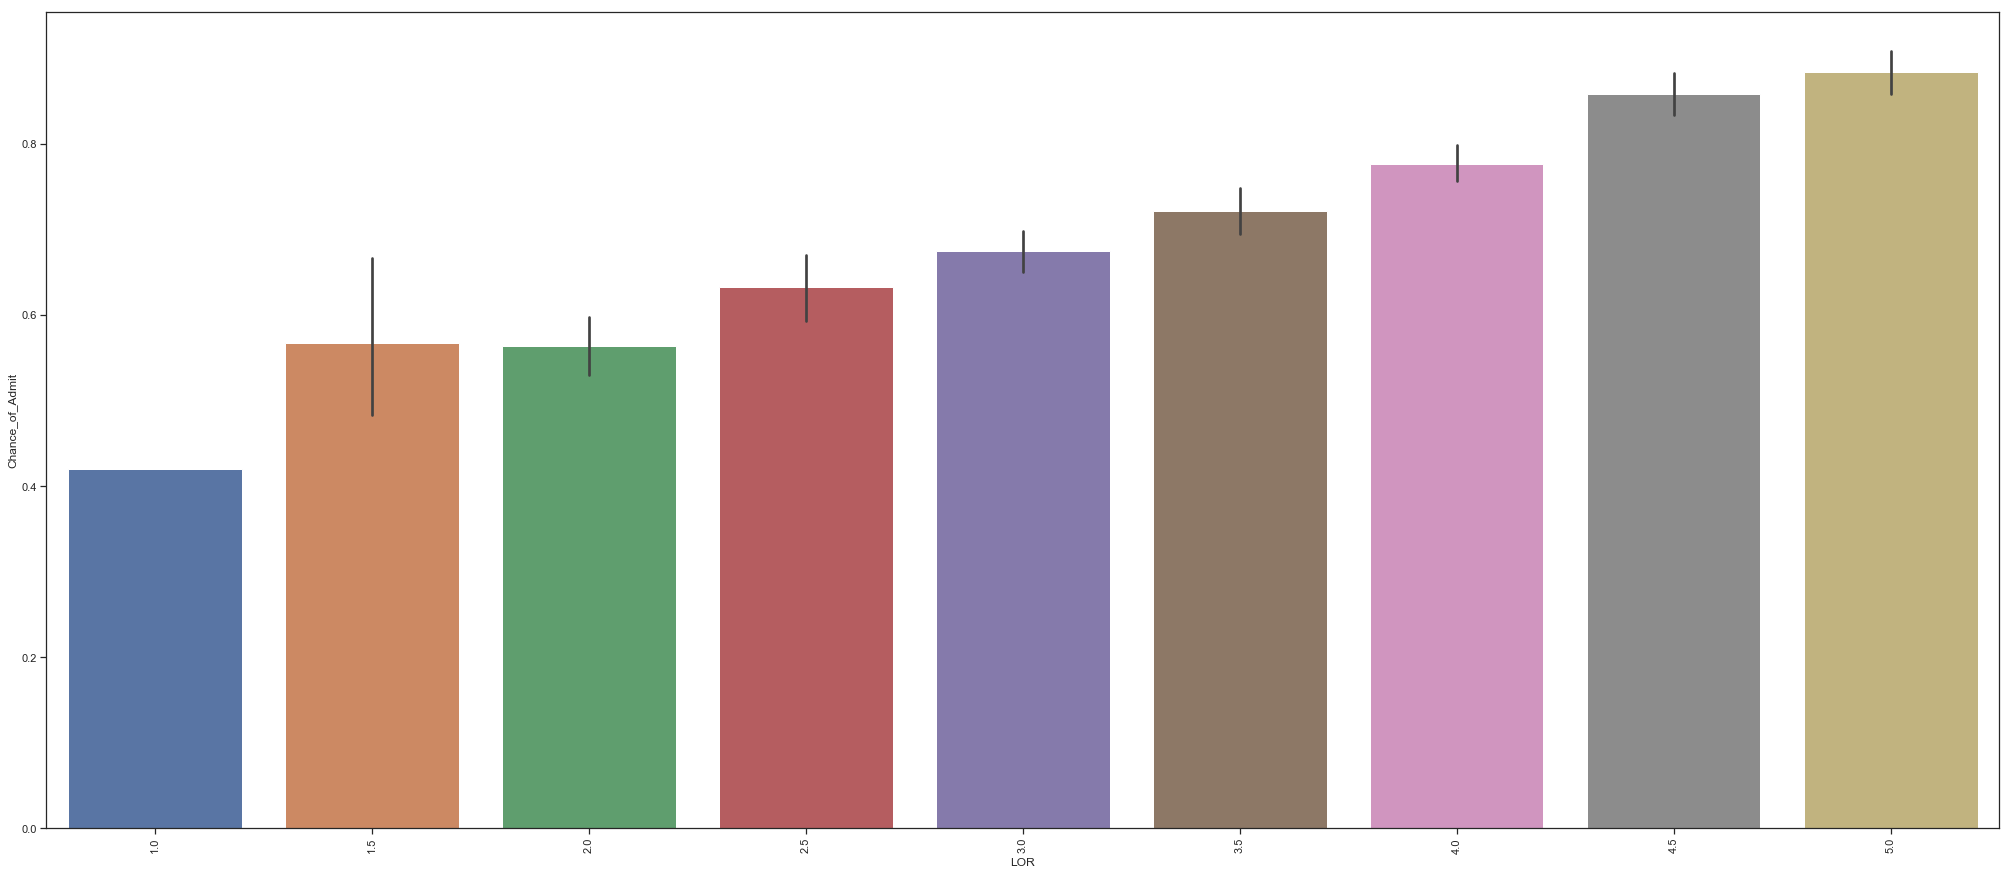

In [12]:
plt.figure(figsize=(35,15))
sns.barplot(x='LOR',y='Chance_of_Admit',data=data)
plt.xticks(rotation='vertical')
plt.show()

<h3>Сформируем обучающую и тестовую выборку</h3>

In [13]:
top = bottom = int(0.05 * data.Chance_of_Admit.shape[0])
data.sort_values(by=['Chance_of_Admit'],ascending=False, inplace=True)

DataParam = data[top:-bottom].drop('Chance_of_Admit', axis=1)
DataAnsw = data[top:-bottom].Chance_of_Admit
TrainX, TestX, TrainY, TestY = train_test_split(DataParam, DataAnsw, test_size=0.33, random_state=42)

<h3>Построим модели</h3>

In [14]:
LinReg = LinearRegression()  # линейная регрессия
BagReg = BaggingRegressor()  # бэгинг
DecTree = DecisionTreeRegressor()  # дерево решений
CatModel = CatBoostRegressor()  # кэтбуст
GmdModel = gmdh.Regressor()  # Метод группового учета аргументов

In [15]:
LinReg.fit(TrainX, TrainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
BagReg.fit(TrainX, TrainY)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [17]:
DecTree.fit(TrainX, TrainY)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [18]:
CatModel.fit(TrainX, TrainY)

0:	learn: 0.7153166	total: 61.6ms	remaining: 1m 1s
1:	learn: 0.6965363	total: 70.6ms	remaining: 35.3s
2:	learn: 0.6784287	total: 76.3ms	remaining: 25.4s
3:	learn: 0.6613442	total: 80.4ms	remaining: 20s
4:	learn: 0.6441044	total: 87.2ms	remaining: 17.3s
5:	learn: 0.6275384	total: 95.5ms	remaining: 15.8s
6:	learn: 0.6111729	total: 119ms	remaining: 16.8s
7:	learn: 0.5936464	total: 123ms	remaining: 15.3s
8:	learn: 0.5776315	total: 128ms	remaining: 14.1s
9:	learn: 0.5621504	total: 131ms	remaining: 13s
10:	learn: 0.5469571	total: 133ms	remaining: 12s
11:	learn: 0.5321697	total: 137ms	remaining: 11.3s
12:	learn: 0.5175370	total: 139ms	remaining: 10.5s
13:	learn: 0.5029716	total: 140ms	remaining: 9.88s
14:	learn: 0.4891746	total: 142ms	remaining: 9.34s
15:	learn: 0.4753906	total: 144ms	remaining: 8.88s
16:	learn: 0.4626721	total: 147ms	remaining: 8.48s
17:	learn: 0.4496693	total: 148ms	remaining: 8.08s
18:	learn: 0.4370186	total: 150ms	remaining: 7.72s
19:	learn: 0.4255705	total: 152ms	remaini

190:	learn: 0.0529240	total: 819ms	remaining: 3.47s
191:	learn: 0.0528936	total: 830ms	remaining: 3.49s
192:	learn: 0.0528519	total: 838ms	remaining: 3.5s
193:	learn: 0.0527983	total: 842ms	remaining: 3.5s
194:	learn: 0.0527326	total: 846ms	remaining: 3.49s
195:	learn: 0.0526882	total: 851ms	remaining: 3.49s
196:	learn: 0.0526390	total: 858ms	remaining: 3.5s
197:	learn: 0.0526021	total: 863ms	remaining: 3.5s
198:	learn: 0.0525869	total: 872ms	remaining: 3.51s
199:	learn: 0.0525570	total: 875ms	remaining: 3.5s
200:	learn: 0.0525282	total: 877ms	remaining: 3.49s
201:	learn: 0.0525054	total: 886ms	remaining: 3.5s
202:	learn: 0.0524734	total: 896ms	remaining: 3.52s
203:	learn: 0.0524615	total: 901ms	remaining: 3.52s
204:	learn: 0.0524446	total: 903ms	remaining: 3.5s
205:	learn: 0.0524056	total: 906ms	remaining: 3.49s
206:	learn: 0.0523805	total: 907ms	remaining: 3.48s
207:	learn: 0.0523477	total: 910ms	remaining: 3.46s
208:	learn: 0.0523118	total: 912ms	remaining: 3.45s
209:	learn: 0.05226

395:	learn: 0.0510714	total: 1.56s	remaining: 2.38s
396:	learn: 0.0510714	total: 1.56s	remaining: 2.37s
397:	learn: 0.0510713	total: 1.56s	remaining: 2.37s
398:	learn: 0.0510710	total: 1.57s	remaining: 2.36s
399:	learn: 0.0510710	total: 1.57s	remaining: 2.35s
400:	learn: 0.0510699	total: 1.57s	remaining: 2.35s
401:	learn: 0.0510685	total: 1.57s	remaining: 2.34s
402:	learn: 0.0510665	total: 1.58s	remaining: 2.34s
403:	learn: 0.0510664	total: 1.58s	remaining: 2.33s
404:	learn: 0.0510663	total: 1.59s	remaining: 2.33s
405:	learn: 0.0510648	total: 1.59s	remaining: 2.33s
406:	learn: 0.0510629	total: 1.59s	remaining: 2.32s
407:	learn: 0.0510629	total: 1.6s	remaining: 2.32s
408:	learn: 0.0510601	total: 1.6s	remaining: 2.31s
409:	learn: 0.0510587	total: 1.6s	remaining: 2.31s
410:	learn: 0.0510569	total: 1.6s	remaining: 2.3s
411:	learn: 0.0510552	total: 1.61s	remaining: 2.29s
412:	learn: 0.0510537	total: 1.61s	remaining: 2.29s
413:	learn: 0.0510536	total: 1.61s	remaining: 2.28s
414:	learn: 0.051

572:	learn: 0.0500109	total: 2.29s	remaining: 1.71s
573:	learn: 0.0499882	total: 2.3s	remaining: 1.71s
574:	learn: 0.0499880	total: 2.31s	remaining: 1.7s
575:	learn: 0.0499879	total: 2.32s	remaining: 1.71s
576:	learn: 0.0499878	total: 2.33s	remaining: 1.7s
577:	learn: 0.0499877	total: 2.33s	remaining: 1.7s
578:	learn: 0.0499876	total: 2.33s	remaining: 1.7s
579:	learn: 0.0499842	total: 2.34s	remaining: 1.69s
580:	learn: 0.0499841	total: 2.34s	remaining: 1.69s
581:	learn: 0.0499840	total: 2.34s	remaining: 1.68s
582:	learn: 0.0499840	total: 2.35s	remaining: 1.68s
583:	learn: 0.0499839	total: 2.35s	remaining: 1.68s
584:	learn: 0.0499837	total: 2.36s	remaining: 1.67s
585:	learn: 0.0499835	total: 2.36s	remaining: 1.67s
586:	learn: 0.0499490	total: 2.37s	remaining: 1.67s
587:	learn: 0.0499487	total: 2.38s	remaining: 1.66s
588:	learn: 0.0499487	total: 2.38s	remaining: 1.66s
589:	learn: 0.0499487	total: 2.39s	remaining: 1.66s
590:	learn: 0.0499476	total: 2.39s	remaining: 1.66s
591:	learn: 0.049

765:	learn: 0.0489918	total: 2.84s	remaining: 868ms
766:	learn: 0.0489918	total: 2.85s	remaining: 865ms
767:	learn: 0.0489918	total: 2.85s	remaining: 862ms
768:	learn: 0.0489917	total: 2.86s	remaining: 860ms
769:	learn: 0.0489911	total: 2.87s	remaining: 856ms
770:	learn: 0.0489910	total: 2.87s	remaining: 852ms
771:	learn: 0.0489839	total: 2.88s	remaining: 849ms
772:	learn: 0.0489757	total: 2.88s	remaining: 846ms
773:	learn: 0.0489594	total: 2.88s	remaining: 842ms
774:	learn: 0.0489593	total: 2.89s	remaining: 838ms
775:	learn: 0.0489593	total: 2.89s	remaining: 835ms
776:	learn: 0.0489427	total: 2.9s	remaining: 832ms
777:	learn: 0.0489427	total: 2.9s	remaining: 827ms
778:	learn: 0.0489222	total: 2.9s	remaining: 824ms
779:	learn: 0.0489222	total: 2.91s	remaining: 820ms
780:	learn: 0.0489203	total: 2.91s	remaining: 816ms
781:	learn: 0.0489203	total: 2.91s	remaining: 812ms
782:	learn: 0.0489136	total: 2.91s	remaining: 808ms
783:	learn: 0.0488770	total: 2.92s	remaining: 804ms
784:	learn: 0.0

936:	learn: 0.0478484	total: 3.19s	remaining: 214ms
937:	learn: 0.0478481	total: 3.19s	remaining: 211ms
938:	learn: 0.0478478	total: 3.19s	remaining: 207ms
939:	learn: 0.0478478	total: 3.2s	remaining: 204ms
940:	learn: 0.0478470	total: 3.2s	remaining: 201ms
941:	learn: 0.0478463	total: 3.2s	remaining: 197ms
942:	learn: 0.0478463	total: 3.21s	remaining: 194ms
943:	learn: 0.0478457	total: 3.21s	remaining: 190ms
944:	learn: 0.0478457	total: 3.22s	remaining: 187ms
945:	learn: 0.0478345	total: 3.22s	remaining: 184ms
946:	learn: 0.0478345	total: 3.23s	remaining: 180ms
947:	learn: 0.0478345	total: 3.23s	remaining: 177ms
948:	learn: 0.0478246	total: 3.24s	remaining: 174ms
949:	learn: 0.0478241	total: 3.24s	remaining: 171ms
950:	learn: 0.0477957	total: 3.25s	remaining: 168ms
951:	learn: 0.0477947	total: 3.26s	remaining: 164ms
952:	learn: 0.0477946	total: 3.26s	remaining: 161ms
953:	learn: 0.0477937	total: 3.27s	remaining: 158ms
954:	learn: 0.0477800	total: 3.28s	remaining: 155ms
955:	learn: 0.0

In [19]:
GmdModel.fit(TrainX, TrainY)

train layer0 in 0.02 sec


/anaconda3/lib/python3.7/site-packages/gmdhpy/data_preprocessing.py:64: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_x = data_x.as_matrix()
/anaconda3/lib/python3.7/site-packages/gmdhpy/data_preprocessing.py:67: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_y = data_y.as_matrix()


train layer1 in 0.12 sec
train layer2 in 0.07 sec
train layer3 in 0.12 sec
train layer4 in 0.08 sec
train layer5 in 0.06 sec
train layer6 in 0.07 sec
train layer7 in 0.08 sec
train layer8 in 0.08 sec


In [20]:
LinRegP = LinReg.predict(TestX)
BagRegP = BagReg.predict(TestX)
DecTreeP = DecTree.predict(TestX)
CatModelP = CatModel.predict(TestX)
GmdModelP = GmdModel.predict(TestX)

/anaconda3/lib/python3.7/site-packages/gmdhpy/data_preprocessing.py:113: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_x = data_x.as_matrix()


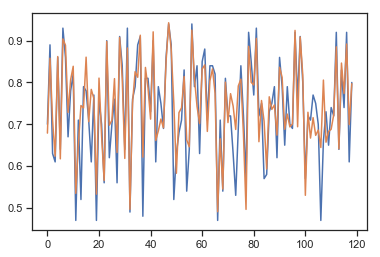

In [21]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(LinRegP) )], LinRegP)
plt.show()

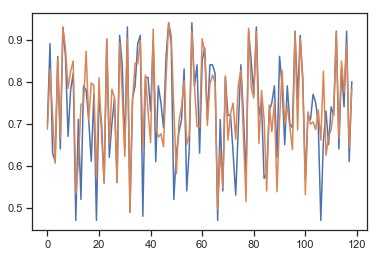

In [22]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(BagRegP) )], BagRegP)
plt.show()

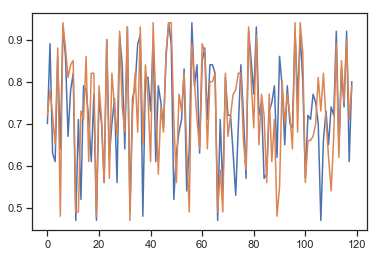

In [23]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(DecTreeP) )], DecTreeP)
plt.show()

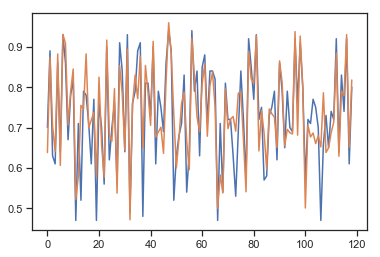

In [24]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(CatModelP) )], CatModelP)
plt.show()

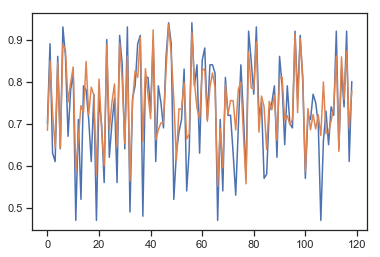

In [25]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(GmdModelP) )], GmdModelP)
plt.show()

<h3>Оценка линейной регрессии</h3>

In [26]:
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, LinRegP))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, LinRegP))
print("Коэффициент детерминации:\t",r2_score(TestY, LinRegP))

Средняя абсолютная ошибка:	 0.04419335993124452
Средняя квадратичная ошибка:	 0.00394099359934044
Коэффициент детерминации:	 0.7402996510848535


<h3>Оценка бэггинга</h3>

In [27]:
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, BagRegP))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, BagRegP))
print("Коэффициент детерминации:\t",r2_score(TestY, BagRegP))

Средняя абсолютная ошибка:	 0.049764705882352926
Средняя квадратичная ошибка:	 0.004835798319327731
Коэффициент детерминации:	 0.6813345469470263


<h3>Оценка дерева принятия решений</h3>

In [28]:
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, DecTreeP))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, DecTreeP))
print("Коэффициент детерминации:\t",r2_score(TestY, DecTreeP))

Средняя абсолютная ошибка:	 0.06731092436974787
Средняя квадратичная ошибка:	 0.00884957983193277
Коэффициент детерминации:	 0.4168376800992485


<h3>Оценка кэтбуста</h3>

In [29]:
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, CatModelP))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, CatModelP))
print("Коэффициент детерминации:\t",r2_score(TestY, CatModelP))

Средняя абсолютная ошибка:	 0.04831848136059293
Средняя квадратичная ошибка:	 0.004352267684358261
Коэффициент детерминации:	 0.7131978503113732


<h3>Оценка метода группового учета аргументов</h3>

In [30]:
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, GmdModelP))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, GmdModelP))
print("Коэффициент детерминации:\t",r2_score(TestY, GmdModelP))

Средняя абсолютная ошибка:	 0.04868965460835075
Средняя квадратичная ошибка:	 0.004550026653133339
Коэффициент детерминации:	 0.7001660927361814


<h2>Проведём подбор гиперпараметров</h2>

In [31]:
n_estimators = [1, 10, 100, 1000]
param_grid = dict(n_estimators = n_estimators)
grid = GridSearchCV(BagReg, param_grid=param_grid)
grid_result = grid.fit(TrainX, TrainY)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Score:  0.7260744446311701
Best Params:  {'n_estimators': 100}


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
max_depth = [i+1 for i in range(100)]
min_samples_split = [i+2 for i in range(50)]
param_grid = dict(max_depth = max_depth, min_samples_split=min_samples_split)
grid = GridSearchCV(DecTree, param_grid=param_grid)
grid_result = grid.fit(TrainX, TrainY)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Score:  0.6962332162789925
Best Params:  {'max_depth': 4, 'min_samples_split': 10}


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
depth = [6]
l2_leaf_reg = [i+2 for i in range(10)]
bootstrap_type = ['Bayesian','Bernoulli', 'No']
param_distributions = dict(depth = depth, l2_leaf_reg=l2_leaf_reg, bootstrap_type=bootstrap_type)
grid = RandomizedSearchCV(CatModel, param_distributions=param_distributions)
grid_result = grid.fit(TrainX, TrainY)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0:	learn: 0.7219317	total: 5.34ms	remaining: 5.34s
1:	learn: 0.7071351	total: 11.6ms	remaining: 5.78s
2:	learn: 0.6943180	total: 16.3ms	remaining: 5.4s
3:	learn: 0.6813077	total: 20.8ms	remaining: 5.18s
4:	learn: 0.6660755	total: 31.6ms	remaining: 6.3s
5:	learn: 0.6510674	total: 43.5ms	remaining: 7.2s
6:	learn: 0.6358502	total: 58.2ms	remaining: 8.25s
7:	learn: 0.6218342	total: 65.3ms	remaining: 8.1s
8:	learn: 0.6052912	total: 69.1ms	remaining: 7.61s
9:	learn: 0.5890851	total: 76.4ms	remaining: 7.56s
10:	learn: 0.5785393	total: 92.5ms	remaining: 8.32s
11:	learn: 0.5653589	total: 96.7ms	remaining: 7.96s
12:	learn: 0.5534558	total: 100ms	remaining: 7.62s
13:	learn: 0.5446314	total: 105ms	remaining: 7.38s
14:	learn: 0.5332213	total: 108ms	remaining: 7.06s
15:	learn: 0.5220258	total: 110ms	remaining: 6.77s
16:	learn: 0.5125102	total: 113ms	remaining: 6.52s
17:	learn: 0.5015503	total: 115ms	remaining: 6.29s
18:	learn: 0.4910899	total: 117ms	remaining: 6.06s
19:	learn: 0.4823243	total: 120ms

168:	learn: 0.0753934	total: 887ms	remaining: 4.36s
169:	learn: 0.0751313	total: 890ms	remaining: 4.34s
170:	learn: 0.0748606	total: 894ms	remaining: 4.33s
171:	learn: 0.0747258	total: 897ms	remaining: 4.32s
172:	learn: 0.0745248	total: 901ms	remaining: 4.31s
173:	learn: 0.0743149	total: 906ms	remaining: 4.3s
174:	learn: 0.0741790	total: 911ms	remaining: 4.29s
175:	learn: 0.0739569	total: 916ms	remaining: 4.29s
176:	learn: 0.0737628	total: 918ms	remaining: 4.27s
177:	learn: 0.0734902	total: 920ms	remaining: 4.25s
178:	learn: 0.0732907	total: 924ms	remaining: 4.24s
179:	learn: 0.0730762	total: 929ms	remaining: 4.23s
180:	learn: 0.0729201	total: 933ms	remaining: 4.22s
181:	learn: 0.0728059	total: 936ms	remaining: 4.21s
182:	learn: 0.0726915	total: 938ms	remaining: 4.18s
183:	learn: 0.0725634	total: 939ms	remaining: 4.17s
184:	learn: 0.0724055	total: 942ms	remaining: 4.15s
185:	learn: 0.0722137	total: 944ms	remaining: 4.13s
186:	learn: 0.0720466	total: 948ms	remaining: 4.12s
187:	learn: 0

378:	learn: 0.0598403	total: 1.43s	remaining: 2.35s
379:	learn: 0.0598018	total: 1.44s	remaining: 2.35s
380:	learn: 0.0597903	total: 1.44s	remaining: 2.34s
381:	learn: 0.0597484	total: 1.44s	remaining: 2.34s
382:	learn: 0.0597375	total: 1.45s	remaining: 2.33s
383:	learn: 0.0597172	total: 1.45s	remaining: 2.33s
384:	learn: 0.0596965	total: 1.46s	remaining: 2.33s
385:	learn: 0.0596191	total: 1.46s	remaining: 2.32s
386:	learn: 0.0594906	total: 1.46s	remaining: 2.32s
387:	learn: 0.0594382	total: 1.47s	remaining: 2.31s
388:	learn: 0.0594116	total: 1.47s	remaining: 2.31s
389:	learn: 0.0593596	total: 1.47s	remaining: 2.3s
390:	learn: 0.0593460	total: 1.47s	remaining: 2.29s
391:	learn: 0.0593269	total: 1.47s	remaining: 2.29s
392:	learn: 0.0593028	total: 1.48s	remaining: 2.28s
393:	learn: 0.0592862	total: 1.48s	remaining: 2.27s
394:	learn: 0.0592526	total: 1.48s	remaining: 2.27s
395:	learn: 0.0592410	total: 1.48s	remaining: 2.26s
396:	learn: 0.0592190	total: 1.49s	remaining: 2.26s
397:	learn: 0

575:	learn: 0.0529644	total: 1.97s	remaining: 1.45s
576:	learn: 0.0529555	total: 1.98s	remaining: 1.45s
577:	learn: 0.0529441	total: 1.98s	remaining: 1.45s
578:	learn: 0.0529347	total: 1.98s	remaining: 1.44s
579:	learn: 0.0528841	total: 1.99s	remaining: 1.44s
580:	learn: 0.0528781	total: 1.99s	remaining: 1.44s
581:	learn: 0.0528496	total: 2s	remaining: 1.43s
582:	learn: 0.0528299	total: 2s	remaining: 1.43s
583:	learn: 0.0528141	total: 2s	remaining: 1.43s
584:	learn: 0.0528054	total: 2s	remaining: 1.42s
585:	learn: 0.0527864	total: 2.01s	remaining: 1.42s
586:	learn: 0.0526865	total: 2.01s	remaining: 1.41s
587:	learn: 0.0526269	total: 2.01s	remaining: 1.41s
588:	learn: 0.0526190	total: 2.01s	remaining: 1.41s
589:	learn: 0.0525051	total: 2.02s	remaining: 1.4s
590:	learn: 0.0524781	total: 2.02s	remaining: 1.4s
591:	learn: 0.0524760	total: 2.02s	remaining: 1.39s
592:	learn: 0.0524685	total: 2.02s	remaining: 1.39s
593:	learn: 0.0524632	total: 2.02s	remaining: 1.38s
594:	learn: 0.0524170	tota

740:	learn: 0.0484144	total: 2.7s	remaining: 944ms
741:	learn: 0.0483856	total: 2.71s	remaining: 941ms
742:	learn: 0.0483136	total: 2.71s	remaining: 938ms
743:	learn: 0.0482819	total: 2.72s	remaining: 935ms
744:	learn: 0.0482730	total: 2.72s	remaining: 931ms
745:	learn: 0.0482720	total: 2.72s	remaining: 928ms
746:	learn: 0.0482625	total: 2.73s	remaining: 925ms
747:	learn: 0.0482553	total: 2.73s	remaining: 921ms
748:	learn: 0.0481993	total: 2.73s	remaining: 917ms
749:	learn: 0.0481356	total: 2.74s	remaining: 913ms
750:	learn: 0.0481333	total: 2.74s	remaining: 909ms
751:	learn: 0.0480775	total: 2.74s	remaining: 905ms
752:	learn: 0.0480517	total: 2.75s	remaining: 901ms
753:	learn: 0.0480445	total: 2.75s	remaining: 897ms
754:	learn: 0.0480317	total: 2.75s	remaining: 894ms
755:	learn: 0.0480285	total: 2.76s	remaining: 890ms
756:	learn: 0.0480056	total: 2.76s	remaining: 886ms
757:	learn: 0.0479261	total: 2.76s	remaining: 882ms
758:	learn: 0.0479176	total: 2.76s	remaining: 878ms
759:	learn: 0

919:	learn: 0.0440783	total: 3.43s	remaining: 298ms
920:	learn: 0.0440083	total: 3.44s	remaining: 295ms
921:	learn: 0.0440049	total: 3.44s	remaining: 291ms
922:	learn: 0.0439952	total: 3.44s	remaining: 287ms
923:	learn: 0.0439852	total: 3.45s	remaining: 283ms
924:	learn: 0.0439810	total: 3.45s	remaining: 280ms
925:	learn: 0.0439524	total: 3.46s	remaining: 276ms
926:	learn: 0.0439438	total: 3.46s	remaining: 273ms
927:	learn: 0.0439011	total: 3.46s	remaining: 269ms
928:	learn: 0.0438954	total: 3.47s	remaining: 265ms
929:	learn: 0.0438938	total: 3.47s	remaining: 261ms
930:	learn: 0.0438570	total: 3.47s	remaining: 257ms
931:	learn: 0.0438383	total: 3.47s	remaining: 253ms
932:	learn: 0.0438267	total: 3.48s	remaining: 250ms
933:	learn: 0.0438204	total: 3.48s	remaining: 246ms
934:	learn: 0.0437983	total: 3.48s	remaining: 242ms
935:	learn: 0.0437801	total: 3.49s	remaining: 238ms
936:	learn: 0.0437735	total: 3.49s	remaining: 235ms
937:	learn: 0.0437594	total: 3.49s	remaining: 231ms
938:	learn: 

105:	learn: 0.1043446	total: 409ms	remaining: 3.45s
106:	learn: 0.1034054	total: 413ms	remaining: 3.44s
107:	learn: 0.1022461	total: 416ms	remaining: 3.44s
108:	learn: 0.1010429	total: 419ms	remaining: 3.43s
109:	learn: 0.0999722	total: 423ms	remaining: 3.42s
110:	learn: 0.0989168	total: 426ms	remaining: 3.42s
111:	learn: 0.0980610	total: 434ms	remaining: 3.44s
112:	learn: 0.0971215	total: 440ms	remaining: 3.45s
113:	learn: 0.0962042	total: 444ms	remaining: 3.45s
114:	learn: 0.0953440	total: 447ms	remaining: 3.44s
115:	learn: 0.0943416	total: 449ms	remaining: 3.42s
116:	learn: 0.0936266	total: 452ms	remaining: 3.41s
117:	learn: 0.0927642	total: 456ms	remaining: 3.4s
118:	learn: 0.0918554	total: 457ms	remaining: 3.38s
119:	learn: 0.0912159	total: 459ms	remaining: 3.37s
120:	learn: 0.0904177	total: 461ms	remaining: 3.35s
121:	learn: 0.0897965	total: 463ms	remaining: 3.33s
122:	learn: 0.0892224	total: 467ms	remaining: 3.33s
123:	learn: 0.0885290	total: 470ms	remaining: 3.32s
124:	learn: 0

305:	learn: 0.0572205	total: 956ms	remaining: 2.17s
306:	learn: 0.0571589	total: 961ms	remaining: 2.17s
307:	learn: 0.0571313	total: 964ms	remaining: 2.17s
308:	learn: 0.0570885	total: 967ms	remaining: 2.16s
309:	learn: 0.0570736	total: 970ms	remaining: 2.16s
310:	learn: 0.0570587	total: 974ms	remaining: 2.16s
311:	learn: 0.0570373	total: 978ms	remaining: 2.16s
312:	learn: 0.0570219	total: 983ms	remaining: 2.16s
313:	learn: 0.0569808	total: 985ms	remaining: 2.15s
314:	learn: 0.0569362	total: 989ms	remaining: 2.15s
315:	learn: 0.0568845	total: 992ms	remaining: 2.15s
316:	learn: 0.0568033	total: 996ms	remaining: 2.15s
317:	learn: 0.0567644	total: 998ms	remaining: 2.14s
318:	learn: 0.0567112	total: 1s	remaining: 2.14s
319:	learn: 0.0566727	total: 1s	remaining: 2.13s
320:	learn: 0.0566334	total: 1.01s	remaining: 2.13s
321:	learn: 0.0565895	total: 1.01s	remaining: 2.13s
322:	learn: 0.0565779	total: 1.01s	remaining: 2.12s
323:	learn: 0.0565484	total: 1.01s	remaining: 2.12s
324:	learn: 0.0564

485:	learn: 0.0514753	total: 1.5s	remaining: 1.58s
486:	learn: 0.0514547	total: 1.5s	remaining: 1.58s
487:	learn: 0.0514302	total: 1.5s	remaining: 1.58s
488:	learn: 0.0514217	total: 1.51s	remaining: 1.58s
489:	learn: 0.0513992	total: 1.51s	remaining: 1.57s
490:	learn: 0.0513910	total: 1.52s	remaining: 1.57s
491:	learn: 0.0513896	total: 1.52s	remaining: 1.57s
492:	learn: 0.0513778	total: 1.53s	remaining: 1.57s
493:	learn: 0.0513056	total: 1.53s	remaining: 1.57s
494:	learn: 0.0512793	total: 1.53s	remaining: 1.56s
495:	learn: 0.0512641	total: 1.53s	remaining: 1.56s
496:	learn: 0.0512514	total: 1.54s	remaining: 1.56s
497:	learn: 0.0512403	total: 1.54s	remaining: 1.55s
498:	learn: 0.0512018	total: 1.54s	remaining: 1.55s
499:	learn: 0.0511737	total: 1.55s	remaining: 1.55s
500:	learn: 0.0511583	total: 1.55s	remaining: 1.54s
501:	learn: 0.0511472	total: 1.55s	remaining: 1.54s
502:	learn: 0.0511321	total: 1.55s	remaining: 1.53s
503:	learn: 0.0511209	total: 1.56s	remaining: 1.53s
504:	learn: 0.0

675:	learn: 0.0471374	total: 2.04s	remaining: 976ms
676:	learn: 0.0471010	total: 2.04s	remaining: 974ms
677:	learn: 0.0470584	total: 2.04s	remaining: 971ms
678:	learn: 0.0470509	total: 2.05s	remaining: 969ms
679:	learn: 0.0470053	total: 2.05s	remaining: 966ms
680:	learn: 0.0469881	total: 2.06s	remaining: 964ms
681:	learn: 0.0469730	total: 2.06s	remaining: 962ms
682:	learn: 0.0469550	total: 2.07s	remaining: 959ms
683:	learn: 0.0469269	total: 2.07s	remaining: 956ms
684:	learn: 0.0469264	total: 2.07s	remaining: 952ms
685:	learn: 0.0469256	total: 2.07s	remaining: 949ms
686:	learn: 0.0468341	total: 2.08s	remaining: 946ms
687:	learn: 0.0468301	total: 2.08s	remaining: 943ms
688:	learn: 0.0468022	total: 2.08s	remaining: 940ms
689:	learn: 0.0467445	total: 2.08s	remaining: 936ms
690:	learn: 0.0467299	total: 2.09s	remaining: 933ms
691:	learn: 0.0467187	total: 2.09s	remaining: 930ms
692:	learn: 0.0466962	total: 2.09s	remaining: 926ms
693:	learn: 0.0466895	total: 2.09s	remaining: 923ms
694:	learn: 

852:	learn: 0.0435805	total: 2.57s	remaining: 444ms
853:	learn: 0.0435776	total: 2.58s	remaining: 441ms
854:	learn: 0.0435533	total: 2.58s	remaining: 438ms
855:	learn: 0.0435447	total: 2.59s	remaining: 435ms
856:	learn: 0.0435429	total: 2.59s	remaining: 432ms
857:	learn: 0.0435367	total: 2.6s	remaining: 430ms
858:	learn: 0.0435169	total: 2.6s	remaining: 427ms
859:	learn: 0.0435065	total: 2.6s	remaining: 424ms
860:	learn: 0.0435031	total: 2.61s	remaining: 421ms
861:	learn: 0.0434978	total: 2.61s	remaining: 418ms
862:	learn: 0.0434931	total: 2.61s	remaining: 414ms
863:	learn: 0.0434785	total: 2.61s	remaining: 411ms
864:	learn: 0.0434277	total: 2.62s	remaining: 408ms
865:	learn: 0.0434042	total: 2.62s	remaining: 405ms
866:	learn: 0.0433943	total: 2.62s	remaining: 402ms
867:	learn: 0.0433756	total: 2.62s	remaining: 399ms
868:	learn: 0.0433728	total: 2.63s	remaining: 396ms
869:	learn: 0.0433710	total: 2.63s	remaining: 393ms
870:	learn: 0.0433655	total: 2.63s	remaining: 390ms
871:	learn: 0.0

22:	learn: 0.4566979	total: 63.4ms	remaining: 2.69s
23:	learn: 0.4481648	total: 68.2ms	remaining: 2.77s
24:	learn: 0.4371247	total: 71.8ms	remaining: 2.8s
25:	learn: 0.4294282	total: 75.8ms	remaining: 2.84s
26:	learn: 0.4199721	total: 79.8ms	remaining: 2.88s
27:	learn: 0.4101288	total: 82.8ms	remaining: 2.88s
28:	learn: 0.4019082	total: 88.7ms	remaining: 2.97s
29:	learn: 0.3921862	total: 90.5ms	remaining: 2.93s
30:	learn: 0.3851738	total: 94.1ms	remaining: 2.94s
31:	learn: 0.3764271	total: 96.7ms	remaining: 2.92s
32:	learn: 0.3669115	total: 98.4ms	remaining: 2.88s
33:	learn: 0.3585174	total: 101ms	remaining: 2.87s
34:	learn: 0.3514594	total: 105ms	remaining: 2.91s
35:	learn: 0.3448027	total: 109ms	remaining: 2.91s
36:	learn: 0.3386109	total: 111ms	remaining: 2.9s
37:	learn: 0.3328943	total: 114ms	remaining: 2.88s
38:	learn: 0.3245371	total: 116ms	remaining: 2.85s
39:	learn: 0.3176094	total: 118ms	remaining: 2.84s
40:	learn: 0.3106250	total: 120ms	remaining: 2.81s
41:	learn: 0.3048218	t

215:	learn: 0.0637654	total: 612ms	remaining: 2.22s
216:	learn: 0.0637035	total: 615ms	remaining: 2.22s
217:	learn: 0.0635429	total: 618ms	remaining: 2.21s
218:	learn: 0.0634886	total: 621ms	remaining: 2.21s
219:	learn: 0.0633802	total: 625ms	remaining: 2.21s
220:	learn: 0.0633360	total: 627ms	remaining: 2.21s
221:	learn: 0.0632853	total: 630ms	remaining: 2.21s
222:	learn: 0.0631599	total: 634ms	remaining: 2.21s
223:	learn: 0.0631297	total: 639ms	remaining: 2.21s
224:	learn: 0.0630861	total: 641ms	remaining: 2.21s
225:	learn: 0.0629922	total: 643ms	remaining: 2.2s
226:	learn: 0.0629519	total: 645ms	remaining: 2.2s
227:	learn: 0.0628293	total: 649ms	remaining: 2.19s
228:	learn: 0.0627957	total: 652ms	remaining: 2.19s
229:	learn: 0.0626367	total: 654ms	remaining: 2.19s
230:	learn: 0.0625579	total: 656ms	remaining: 2.19s
231:	learn: 0.0624697	total: 658ms	remaining: 2.18s
232:	learn: 0.0624011	total: 661ms	remaining: 2.17s
233:	learn: 0.0623485	total: 663ms	remaining: 2.17s
234:	learn: 0.

384:	learn: 0.0556827	total: 1.04s	remaining: 1.66s
385:	learn: 0.0556552	total: 1.04s	remaining: 1.66s
386:	learn: 0.0556492	total: 1.04s	remaining: 1.65s
387:	learn: 0.0556444	total: 1.05s	remaining: 1.65s
388:	learn: 0.0556289	total: 1.05s	remaining: 1.65s
389:	learn: 0.0555684	total: 1.05s	remaining: 1.65s
390:	learn: 0.0555547	total: 1.06s	remaining: 1.65s
391:	learn: 0.0555451	total: 1.06s	remaining: 1.65s
392:	learn: 0.0555395	total: 1.07s	remaining: 1.65s
393:	learn: 0.0555051	total: 1.07s	remaining: 1.64s
394:	learn: 0.0555032	total: 1.07s	remaining: 1.64s
395:	learn: 0.0554144	total: 1.07s	remaining: 1.64s
396:	learn: 0.0553876	total: 1.07s	remaining: 1.63s
397:	learn: 0.0553585	total: 1.08s	remaining: 1.63s
398:	learn: 0.0553412	total: 1.08s	remaining: 1.63s
399:	learn: 0.0553165	total: 1.08s	remaining: 1.63s
400:	learn: 0.0553009	total: 1.09s	remaining: 1.63s
401:	learn: 0.0552702	total: 1.09s	remaining: 1.63s
402:	learn: 0.0552370	total: 1.1s	remaining: 1.63s
403:	learn: 0

552:	learn: 0.0510326	total: 1.51s	remaining: 1.22s
553:	learn: 0.0509712	total: 1.51s	remaining: 1.22s
554:	learn: 0.0509506	total: 1.52s	remaining: 1.22s
555:	learn: 0.0509463	total: 1.52s	remaining: 1.22s
556:	learn: 0.0509332	total: 1.53s	remaining: 1.22s
557:	learn: 0.0508830	total: 1.54s	remaining: 1.22s
558:	learn: 0.0508758	total: 1.54s	remaining: 1.22s
559:	learn: 0.0508745	total: 1.54s	remaining: 1.21s
560:	learn: 0.0508733	total: 1.55s	remaining: 1.21s
561:	learn: 0.0508660	total: 1.55s	remaining: 1.21s
562:	learn: 0.0508539	total: 1.55s	remaining: 1.21s
563:	learn: 0.0508355	total: 1.56s	remaining: 1.2s
564:	learn: 0.0508204	total: 1.56s	remaining: 1.2s
565:	learn: 0.0507936	total: 1.56s	remaining: 1.2s
566:	learn: 0.0507879	total: 1.56s	remaining: 1.19s
567:	learn: 0.0507327	total: 1.57s	remaining: 1.19s
568:	learn: 0.0507181	total: 1.57s	remaining: 1.19s
569:	learn: 0.0507154	total: 1.57s	remaining: 1.19s
570:	learn: 0.0507077	total: 1.58s	remaining: 1.19s
571:	learn: 0.0

740:	learn: 0.0460649	total: 2.05s	remaining: 716ms
741:	learn: 0.0460187	total: 2.05s	remaining: 714ms
742:	learn: 0.0460170	total: 2.06s	remaining: 712ms
743:	learn: 0.0459909	total: 2.06s	remaining: 710ms
744:	learn: 0.0459813	total: 2.07s	remaining: 708ms
745:	learn: 0.0459789	total: 2.07s	remaining: 705ms
746:	learn: 0.0459576	total: 2.08s	remaining: 703ms
747:	learn: 0.0459139	total: 2.08s	remaining: 701ms
748:	learn: 0.0459107	total: 2.08s	remaining: 698ms
749:	learn: 0.0459006	total: 2.08s	remaining: 695ms
750:	learn: 0.0458772	total: 2.09s	remaining: 692ms
751:	learn: 0.0458756	total: 2.09s	remaining: 689ms
752:	learn: 0.0458417	total: 2.09s	remaining: 687ms
753:	learn: 0.0458412	total: 2.09s	remaining: 683ms
754:	learn: 0.0458238	total: 2.1s	remaining: 680ms
755:	learn: 0.0456937	total: 2.1s	remaining: 678ms
756:	learn: 0.0456902	total: 2.1s	remaining: 675ms
757:	learn: 0.0456437	total: 2.1s	remaining: 672ms
758:	learn: 0.0456218	total: 2.11s	remaining: 669ms
759:	learn: 0.04

932:	learn: 0.0419101	total: 2.59s	remaining: 186ms
933:	learn: 0.0418833	total: 2.59s	remaining: 183ms
934:	learn: 0.0418797	total: 2.59s	remaining: 180ms
935:	learn: 0.0418650	total: 2.6s	remaining: 178ms
936:	learn: 0.0417696	total: 2.6s	remaining: 175ms
937:	learn: 0.0417333	total: 2.61s	remaining: 172ms
938:	learn: 0.0416783	total: 2.61s	remaining: 170ms
939:	learn: 0.0416644	total: 2.62s	remaining: 167ms
940:	learn: 0.0416569	total: 2.62s	remaining: 164ms
941:	learn: 0.0416394	total: 2.62s	remaining: 161ms
942:	learn: 0.0416245	total: 2.62s	remaining: 159ms
943:	learn: 0.0415871	total: 2.63s	remaining: 156ms
944:	learn: 0.0415849	total: 2.63s	remaining: 153ms
945:	learn: 0.0415842	total: 2.63s	remaining: 150ms
946:	learn: 0.0415763	total: 2.63s	remaining: 147ms
947:	learn: 0.0415679	total: 2.64s	remaining: 145ms
948:	learn: 0.0415428	total: 2.64s	remaining: 142ms
949:	learn: 0.0414300	total: 2.64s	remaining: 139ms
950:	learn: 0.0413767	total: 2.65s	remaining: 136ms
951:	learn: 0.

103:	learn: 0.0970400	total: 326ms	remaining: 2.81s
104:	learn: 0.0959556	total: 331ms	remaining: 2.82s
105:	learn: 0.0948229	total: 335ms	remaining: 2.82s
106:	learn: 0.0938633	total: 339ms	remaining: 2.83s
107:	learn: 0.0930189	total: 343ms	remaining: 2.83s
108:	learn: 0.0922568	total: 348ms	remaining: 2.84s
109:	learn: 0.0912257	total: 352ms	remaining: 2.84s
110:	learn: 0.0902051	total: 355ms	remaining: 2.84s
111:	learn: 0.0893547	total: 359ms	remaining: 2.84s
112:	learn: 0.0885015	total: 362ms	remaining: 2.84s
113:	learn: 0.0876501	total: 365ms	remaining: 2.83s
114:	learn: 0.0869363	total: 369ms	remaining: 2.83s
115:	learn: 0.0862163	total: 372ms	remaining: 2.83s
116:	learn: 0.0854886	total: 374ms	remaining: 2.82s
117:	learn: 0.0849159	total: 376ms	remaining: 2.81s
118:	learn: 0.0843154	total: 378ms	remaining: 2.8s
119:	learn: 0.0835458	total: 380ms	remaining: 2.79s
120:	learn: 0.0828320	total: 383ms	remaining: 2.78s
121:	learn: 0.0822145	total: 385ms	remaining: 2.77s
122:	learn: 0

293:	learn: 0.0583443	total: 871ms	remaining: 2.09s
294:	learn: 0.0583291	total: 875ms	remaining: 2.09s
295:	learn: 0.0583123	total: 878ms	remaining: 2.09s
296:	learn: 0.0582910	total: 882ms	remaining: 2.09s
297:	learn: 0.0581928	total: 887ms	remaining: 2.09s
298:	learn: 0.0581754	total: 890ms	remaining: 2.09s
299:	learn: 0.0581618	total: 894ms	remaining: 2.08s
300:	learn: 0.0581377	total: 899ms	remaining: 2.09s
301:	learn: 0.0581081	total: 901ms	remaining: 2.08s
302:	learn: 0.0580954	total: 903ms	remaining: 2.08s
303:	learn: 0.0580573	total: 906ms	remaining: 2.07s
304:	learn: 0.0580462	total: 908ms	remaining: 2.07s
305:	learn: 0.0579858	total: 910ms	remaining: 2.06s
306:	learn: 0.0579513	total: 915ms	remaining: 2.06s
307:	learn: 0.0579230	total: 917ms	remaining: 2.06s
308:	learn: 0.0579111	total: 919ms	remaining: 2.06s
309:	learn: 0.0578878	total: 921ms	remaining: 2.05s
310:	learn: 0.0578738	total: 923ms	remaining: 2.04s
311:	learn: 0.0578527	total: 925ms	remaining: 2.04s
312:	learn: 

503:	learn: 0.0555603	total: 1.41s	remaining: 1.39s
504:	learn: 0.0555587	total: 1.41s	remaining: 1.39s
505:	learn: 0.0555572	total: 1.42s	remaining: 1.38s
506:	learn: 0.0555557	total: 1.42s	remaining: 1.38s
507:	learn: 0.0555542	total: 1.42s	remaining: 1.38s
508:	learn: 0.0555536	total: 1.43s	remaining: 1.38s
509:	learn: 0.0555521	total: 1.43s	remaining: 1.37s
510:	learn: 0.0555472	total: 1.44s	remaining: 1.37s
511:	learn: 0.0555449	total: 1.44s	remaining: 1.37s
512:	learn: 0.0555397	total: 1.44s	remaining: 1.37s
513:	learn: 0.0555035	total: 1.45s	remaining: 1.37s
514:	learn: 0.0555006	total: 1.45s	remaining: 1.36s
515:	learn: 0.0554984	total: 1.45s	remaining: 1.36s
516:	learn: 0.0554970	total: 1.45s	remaining: 1.36s
517:	learn: 0.0554867	total: 1.45s	remaining: 1.35s
518:	learn: 0.0554495	total: 1.46s	remaining: 1.35s
519:	learn: 0.0554432	total: 1.46s	remaining: 1.35s
520:	learn: 0.0554411	total: 1.46s	remaining: 1.34s
521:	learn: 0.0554289	total: 1.47s	remaining: 1.34s
522:	learn: 

704:	learn: 0.0537887	total: 1.95s	remaining: 816ms
705:	learn: 0.0537783	total: 1.95s	remaining: 814ms
706:	learn: 0.0537728	total: 1.96s	remaining: 812ms
707:	learn: 0.0537522	total: 1.96s	remaining: 810ms
708:	learn: 0.0537273	total: 1.97s	remaining: 808ms
709:	learn: 0.0537132	total: 1.97s	remaining: 806ms
710:	learn: 0.0536517	total: 1.98s	remaining: 804ms
711:	learn: 0.0536512	total: 1.98s	remaining: 801ms
712:	learn: 0.0536479	total: 1.98s	remaining: 798ms
713:	learn: 0.0536477	total: 1.99s	remaining: 795ms
714:	learn: 0.0536474	total: 1.99s	remaining: 792ms
715:	learn: 0.0536398	total: 1.99s	remaining: 789ms
716:	learn: 0.0535678	total: 1.99s	remaining: 786ms
717:	learn: 0.0535612	total: 2s	remaining: 784ms
718:	learn: 0.0535518	total: 2s	remaining: 781ms
719:	learn: 0.0535481	total: 2s	remaining: 778ms
720:	learn: 0.0535113	total: 2s	remaining: 775ms
721:	learn: 0.0535044	total: 2s	remaining: 772ms
722:	learn: 0.0535042	total: 2.01s	remaining: 770ms
723:	learn: 0.0535041	total

909:	learn: 0.0517124	total: 2.48s	remaining: 245ms
910:	learn: 0.0517124	total: 2.48s	remaining: 242ms
911:	learn: 0.0517124	total: 2.48s	remaining: 240ms
912:	learn: 0.0517124	total: 2.49s	remaining: 237ms
913:	learn: 0.0517045	total: 2.49s	remaining: 234ms
914:	learn: 0.0517043	total: 2.49s	remaining: 232ms
915:	learn: 0.0517043	total: 2.5s	remaining: 229ms
916:	learn: 0.0517043	total: 2.5s	remaining: 226ms
917:	learn: 0.0517024	total: 2.51s	remaining: 224ms
918:	learn: 0.0516634	total: 2.51s	remaining: 221ms
919:	learn: 0.0516066	total: 2.51s	remaining: 218ms
920:	learn: 0.0516063	total: 2.51s	remaining: 216ms
921:	learn: 0.0516050	total: 2.52s	remaining: 213ms
922:	learn: 0.0516050	total: 2.52s	remaining: 210ms
923:	learn: 0.0516050	total: 2.52s	remaining: 207ms
924:	learn: 0.0516045	total: 2.52s	remaining: 205ms
925:	learn: 0.0516045	total: 2.52s	remaining: 202ms
926:	learn: 0.0515933	total: 2.53s	remaining: 199ms
927:	learn: 0.0515908	total: 2.53s	remaining: 196ms
928:	learn: 0.

81:	learn: 0.1281638	total: 265ms	remaining: 2.97s
82:	learn: 0.1259762	total: 270ms	remaining: 2.98s
83:	learn: 0.1237163	total: 273ms	remaining: 2.98s
84:	learn: 0.1218154	total: 278ms	remaining: 2.99s
85:	learn: 0.1199588	total: 282ms	remaining: 2.99s
86:	learn: 0.1183989	total: 286ms	remaining: 3s
87:	learn: 0.1165406	total: 292ms	remaining: 3.03s
88:	learn: 0.1148450	total: 298ms	remaining: 3.05s
89:	learn: 0.1131325	total: 300ms	remaining: 3.04s
90:	learn: 0.1114708	total: 305ms	remaining: 3.04s
91:	learn: 0.1099455	total: 309ms	remaining: 3.05s
92:	learn: 0.1084868	total: 315ms	remaining: 3.07s
93:	learn: 0.1068629	total: 318ms	remaining: 3.07s
94:	learn: 0.1053471	total: 323ms	remaining: 3.08s
95:	learn: 0.1040109	total: 327ms	remaining: 3.08s
96:	learn: 0.1025943	total: 330ms	remaining: 3.07s
97:	learn: 0.1012926	total: 334ms	remaining: 3.07s
98:	learn: 0.1000618	total: 341ms	remaining: 3.1s
99:	learn: 0.0988560	total: 349ms	remaining: 3.14s
100:	learn: 0.0975042	total: 354ms	

258:	learn: 0.0560502	total: 822ms	remaining: 2.35s
259:	learn: 0.0559924	total: 826ms	remaining: 2.35s
260:	learn: 0.0559701	total: 829ms	remaining: 2.35s
261:	learn: 0.0559365	total: 832ms	remaining: 2.34s
262:	learn: 0.0558780	total: 837ms	remaining: 2.35s
263:	learn: 0.0558456	total: 841ms	remaining: 2.34s
264:	learn: 0.0558091	total: 845ms	remaining: 2.34s
265:	learn: 0.0557498	total: 850ms	remaining: 2.34s
266:	learn: 0.0557163	total: 856ms	remaining: 2.35s
267:	learn: 0.0556902	total: 859ms	remaining: 2.35s
268:	learn: 0.0556278	total: 862ms	remaining: 2.34s
269:	learn: 0.0555570	total: 865ms	remaining: 2.34s
270:	learn: 0.0555176	total: 869ms	remaining: 2.34s
271:	learn: 0.0554857	total: 873ms	remaining: 2.34s
272:	learn: 0.0554547	total: 876ms	remaining: 2.33s
273:	learn: 0.0554168	total: 878ms	remaining: 2.33s
274:	learn: 0.0554020	total: 880ms	remaining: 2.32s
275:	learn: 0.0553580	total: 883ms	remaining: 2.32s
276:	learn: 0.0553301	total: 885ms	remaining: 2.31s
277:	learn: 

418:	learn: 0.0527102	total: 1.26s	remaining: 1.75s
419:	learn: 0.0527099	total: 1.26s	remaining: 1.74s
420:	learn: 0.0526930	total: 1.27s	remaining: 1.74s
421:	learn: 0.0526866	total: 1.27s	remaining: 1.74s
422:	learn: 0.0526802	total: 1.27s	remaining: 1.74s
423:	learn: 0.0526759	total: 1.28s	remaining: 1.74s
424:	learn: 0.0526639	total: 1.28s	remaining: 1.73s
425:	learn: 0.0526597	total: 1.28s	remaining: 1.73s
426:	learn: 0.0526594	total: 1.29s	remaining: 1.73s
427:	learn: 0.0526592	total: 1.29s	remaining: 1.72s
428:	learn: 0.0526550	total: 1.29s	remaining: 1.72s
429:	learn: 0.0526509	total: 1.29s	remaining: 1.71s
430:	learn: 0.0526505	total: 1.29s	remaining: 1.71s
431:	learn: 0.0526456	total: 1.3s	remaining: 1.71s
432:	learn: 0.0526453	total: 1.3s	remaining: 1.7s
433:	learn: 0.0526423	total: 1.3s	remaining: 1.7s
434:	learn: 0.0526419	total: 1.3s	remaining: 1.69s
435:	learn: 0.0526203	total: 1.3s	remaining: 1.69s
436:	learn: 0.0526078	total: 1.31s	remaining: 1.68s
437:	learn: 0.05260

596:	learn: 0.0515463	total: 1.72s	remaining: 1.16s
597:	learn: 0.0515462	total: 1.72s	remaining: 1.16s
598:	learn: 0.0515456	total: 1.73s	remaining: 1.15s
599:	learn: 0.0515435	total: 1.73s	remaining: 1.15s
600:	learn: 0.0515417	total: 1.73s	remaining: 1.15s
601:	learn: 0.0515396	total: 1.74s	remaining: 1.15s
602:	learn: 0.0515385	total: 1.74s	remaining: 1.15s
603:	learn: 0.0515339	total: 1.75s	remaining: 1.14s
604:	learn: 0.0515234	total: 1.75s	remaining: 1.14s
605:	learn: 0.0515227	total: 1.75s	remaining: 1.14s
606:	learn: 0.0515003	total: 1.75s	remaining: 1.14s
607:	learn: 0.0515002	total: 1.75s	remaining: 1.13s
608:	learn: 0.0514995	total: 1.76s	remaining: 1.13s
609:	learn: 0.0514974	total: 1.76s	remaining: 1.12s
610:	learn: 0.0514806	total: 1.76s	remaining: 1.12s
611:	learn: 0.0514806	total: 1.76s	remaining: 1.12s
612:	learn: 0.0514806	total: 1.76s	remaining: 1.11s
613:	learn: 0.0514806	total: 1.77s	remaining: 1.11s
614:	learn: 0.0514806	total: 1.77s	remaining: 1.11s
615:	learn: 

795:	learn: 0.0508158	total: 2.22s	remaining: 570ms
796:	learn: 0.0508105	total: 2.23s	remaining: 567ms
797:	learn: 0.0508093	total: 2.23s	remaining: 565ms
798:	learn: 0.0508093	total: 2.23s	remaining: 562ms
799:	learn: 0.0508077	total: 2.24s	remaining: 560ms
800:	learn: 0.0507974	total: 2.24s	remaining: 557ms
801:	learn: 0.0507933	total: 2.25s	remaining: 555ms
802:	learn: 0.0507792	total: 2.25s	remaining: 553ms
803:	learn: 0.0507698	total: 2.25s	remaining: 550ms
804:	learn: 0.0507617	total: 2.26s	remaining: 547ms
805:	learn: 0.0507600	total: 2.26s	remaining: 544ms
806:	learn: 0.0507590	total: 2.26s	remaining: 541ms
807:	learn: 0.0507590	total: 2.27s	remaining: 539ms
808:	learn: 0.0507562	total: 2.27s	remaining: 537ms
809:	learn: 0.0507544	total: 2.28s	remaining: 534ms
810:	learn: 0.0507544	total: 2.28s	remaining: 531ms
811:	learn: 0.0507544	total: 2.28s	remaining: 528ms
812:	learn: 0.0507541	total: 2.28s	remaining: 525ms
813:	learn: 0.0507526	total: 2.28s	remaining: 522ms
814:	learn: 

960:	learn: 0.0503029	total: 2.65s	remaining: 108ms
961:	learn: 0.0502972	total: 2.65s	remaining: 105ms
962:	learn: 0.0502971	total: 2.66s	remaining: 102ms
963:	learn: 0.0502971	total: 2.66s	remaining: 99.3ms
964:	learn: 0.0502964	total: 2.66s	remaining: 96.6ms
965:	learn: 0.0502950	total: 2.67s	remaining: 93.9ms
966:	learn: 0.0502950	total: 2.67s	remaining: 91.2ms
967:	learn: 0.0502948	total: 2.67s	remaining: 88.4ms
968:	learn: 0.0502948	total: 2.68s	remaining: 85.6ms
969:	learn: 0.0502948	total: 2.68s	remaining: 82.9ms
970:	learn: 0.0502947	total: 2.68s	remaining: 80.2ms
971:	learn: 0.0502947	total: 2.69s	remaining: 77.5ms
972:	learn: 0.0502947	total: 2.69s	remaining: 74.7ms
973:	learn: 0.0502934	total: 2.69s	remaining: 71.9ms
974:	learn: 0.0502932	total: 2.69s	remaining: 69.1ms
975:	learn: 0.0502915	total: 2.7s	remaining: 66.3ms
976:	learn: 0.0502899	total: 2.7s	remaining: 63.6ms
977:	learn: 0.0502899	total: 2.7s	remaining: 60.8ms
978:	learn: 0.0502881	total: 2.7s	remaining: 58ms
97

126:	learn: 0.0755136	total: 379ms	remaining: 2.61s
127:	learn: 0.0749298	total: 383ms	remaining: 2.61s
128:	learn: 0.0745373	total: 387ms	remaining: 2.62s
129:	learn: 0.0740763	total: 390ms	remaining: 2.61s
130:	learn: 0.0736470	total: 395ms	remaining: 2.62s
131:	learn: 0.0732978	total: 400ms	remaining: 2.63s
132:	learn: 0.0728470	total: 404ms	remaining: 2.63s
133:	learn: 0.0724575	total: 407ms	remaining: 2.63s
134:	learn: 0.0720507	total: 412ms	remaining: 2.64s
135:	learn: 0.0716365	total: 414ms	remaining: 2.63s
136:	learn: 0.0712943	total: 416ms	remaining: 2.62s
137:	learn: 0.0708729	total: 419ms	remaining: 2.61s
138:	learn: 0.0704135	total: 421ms	remaining: 2.6s
139:	learn: 0.0700516	total: 423ms	remaining: 2.6s
140:	learn: 0.0696724	total: 425ms	remaining: 2.59s
141:	learn: 0.0693737	total: 427ms	remaining: 2.58s
142:	learn: 0.0691039	total: 429ms	remaining: 2.57s
143:	learn: 0.0687782	total: 431ms	remaining: 2.56s
144:	learn: 0.0684219	total: 434ms	remaining: 2.56s
145:	learn: 0.

338:	learn: 0.0549332	total: 924ms	remaining: 1.8s
339:	learn: 0.0549250	total: 928ms	remaining: 1.8s
340:	learn: 0.0549143	total: 931ms	remaining: 1.8s
341:	learn: 0.0549119	total: 934ms	remaining: 1.8s
342:	learn: 0.0549023	total: 937ms	remaining: 1.79s
343:	learn: 0.0549009	total: 940ms	remaining: 1.79s
344:	learn: 0.0548661	total: 945ms	remaining: 1.79s
345:	learn: 0.0548555	total: 949ms	remaining: 1.79s
346:	learn: 0.0548501	total: 954ms	remaining: 1.79s
347:	learn: 0.0548496	total: 956ms	remaining: 1.79s
348:	learn: 0.0548450	total: 958ms	remaining: 1.79s
349:	learn: 0.0548410	total: 959ms	remaining: 1.78s
350:	learn: 0.0548363	total: 962ms	remaining: 1.78s
351:	learn: 0.0548315	total: 964ms	remaining: 1.77s
352:	learn: 0.0548158	total: 967ms	remaining: 1.77s
353:	learn: 0.0548072	total: 968ms	remaining: 1.77s
354:	learn: 0.0547975	total: 970ms	remaining: 1.76s
355:	learn: 0.0547867	total: 972ms	remaining: 1.76s
356:	learn: 0.0547861	total: 974ms	remaining: 1.75s
357:	learn: 0.05

500:	learn: 0.0539179	total: 1.28s	remaining: 1.28s
501:	learn: 0.0539175	total: 1.29s	remaining: 1.28s
502:	learn: 0.0539037	total: 1.29s	remaining: 1.27s
503:	learn: 0.0539030	total: 1.29s	remaining: 1.27s
504:	learn: 0.0538520	total: 1.3s	remaining: 1.27s
505:	learn: 0.0538516	total: 1.3s	remaining: 1.27s
506:	learn: 0.0538513	total: 1.31s	remaining: 1.27s
507:	learn: 0.0538509	total: 1.31s	remaining: 1.27s
508:	learn: 0.0538508	total: 1.31s	remaining: 1.27s
509:	learn: 0.0538405	total: 1.32s	remaining: 1.27s
510:	learn: 0.0538402	total: 1.32s	remaining: 1.26s
511:	learn: 0.0538365	total: 1.32s	remaining: 1.26s
512:	learn: 0.0538364	total: 1.32s	remaining: 1.25s
513:	learn: 0.0538348	total: 1.32s	remaining: 1.25s
514:	learn: 0.0538344	total: 1.33s	remaining: 1.25s
515:	learn: 0.0538339	total: 1.33s	remaining: 1.25s
516:	learn: 0.0538319	total: 1.33s	remaining: 1.24s
517:	learn: 0.0538283	total: 1.33s	remaining: 1.24s
518:	learn: 0.0538269	total: 1.33s	remaining: 1.24s
519:	learn: 0.

716:	learn: 0.0531601	total: 1.81s	remaining: 716ms
717:	learn: 0.0531600	total: 1.82s	remaining: 714ms
718:	learn: 0.0531598	total: 1.82s	remaining: 712ms
719:	learn: 0.0531593	total: 1.82s	remaining: 709ms
720:	learn: 0.0531592	total: 1.83s	remaining: 707ms
721:	learn: 0.0531591	total: 1.83s	remaining: 705ms
722:	learn: 0.0531500	total: 1.83s	remaining: 703ms
723:	learn: 0.0531498	total: 1.84s	remaining: 701ms
724:	learn: 0.0531498	total: 1.84s	remaining: 699ms
725:	learn: 0.0531496	total: 1.84s	remaining: 696ms
726:	learn: 0.0531495	total: 1.84s	remaining: 693ms
727:	learn: 0.0531493	total: 1.85s	remaining: 690ms
728:	learn: 0.0531490	total: 1.85s	remaining: 687ms
729:	learn: 0.0531487	total: 1.85s	remaining: 685ms
730:	learn: 0.0531486	total: 1.85s	remaining: 682ms
731:	learn: 0.0531486	total: 1.86s	remaining: 680ms
732:	learn: 0.0531484	total: 1.86s	remaining: 677ms
733:	learn: 0.0531484	total: 1.86s	remaining: 674ms
734:	learn: 0.0531483	total: 1.86s	remaining: 671ms
735:	learn: 

885:	learn: 0.0526921	total: 2.23s	remaining: 287ms
886:	learn: 0.0526920	total: 2.24s	remaining: 285ms
887:	learn: 0.0526917	total: 2.24s	remaining: 283ms
888:	learn: 0.0526917	total: 2.24s	remaining: 280ms
889:	learn: 0.0526916	total: 2.25s	remaining: 278ms
890:	learn: 0.0526914	total: 2.25s	remaining: 276ms
891:	learn: 0.0526896	total: 2.26s	remaining: 273ms
892:	learn: 0.0526843	total: 2.26s	remaining: 271ms
893:	learn: 0.0526843	total: 2.26s	remaining: 268ms
894:	learn: 0.0526842	total: 2.26s	remaining: 266ms
895:	learn: 0.0526842	total: 2.27s	remaining: 263ms
896:	learn: 0.0526842	total: 2.27s	remaining: 261ms
897:	learn: 0.0526840	total: 2.27s	remaining: 258ms
898:	learn: 0.0526839	total: 2.27s	remaining: 255ms
899:	learn: 0.0526838	total: 2.27s	remaining: 253ms
900:	learn: 0.0526838	total: 2.28s	remaining: 250ms
901:	learn: 0.0526837	total: 2.28s	remaining: 248ms
902:	learn: 0.0526836	total: 2.28s	remaining: 245ms
903:	learn: 0.0526836	total: 2.28s	remaining: 242ms
904:	learn: 

51:	learn: 0.2131812	total: 152ms	remaining: 2.77s
52:	learn: 0.2081066	total: 155ms	remaining: 2.77s
53:	learn: 0.2034396	total: 159ms	remaining: 2.79s
54:	learn: 0.1986278	total: 162ms	remaining: 2.79s
55:	learn: 0.1939398	total: 166ms	remaining: 2.79s
56:	learn: 0.1893993	total: 169ms	remaining: 2.79s
57:	learn: 0.1857952	total: 174ms	remaining: 2.82s
58:	learn: 0.1824999	total: 179ms	remaining: 2.85s
59:	learn: 0.1788097	total: 181ms	remaining: 2.84s
60:	learn: 0.1753964	total: 185ms	remaining: 2.85s
61:	learn: 0.1717325	total: 189ms	remaining: 2.86s
62:	learn: 0.1681395	total: 192ms	remaining: 2.85s
63:	learn: 0.1649719	total: 194ms	remaining: 2.84s
64:	learn: 0.1614100	total: 197ms	remaining: 2.84s
65:	learn: 0.1578752	total: 199ms	remaining: 2.82s
66:	learn: 0.1542647	total: 202ms	remaining: 2.82s
67:	learn: 0.1510857	total: 205ms	remaining: 2.8s
68:	learn: 0.1483407	total: 207ms	remaining: 2.8s
69:	learn: 0.1451795	total: 209ms	remaining: 2.77s
70:	learn: 0.1424059	total: 211ms

246:	learn: 0.0571061	total: 700ms	remaining: 2.13s
247:	learn: 0.0570889	total: 704ms	remaining: 2.13s
248:	learn: 0.0570707	total: 708ms	remaining: 2.13s
249:	learn: 0.0570153	total: 712ms	remaining: 2.14s
250:	learn: 0.0569806	total: 717ms	remaining: 2.14s
251:	learn: 0.0569735	total: 720ms	remaining: 2.14s
252:	learn: 0.0569512	total: 725ms	remaining: 2.14s
253:	learn: 0.0568803	total: 731ms	remaining: 2.15s
254:	learn: 0.0568655	total: 733ms	remaining: 2.14s
255:	learn: 0.0568460	total: 736ms	remaining: 2.14s
256:	learn: 0.0568281	total: 739ms	remaining: 2.14s
257:	learn: 0.0567903	total: 742ms	remaining: 2.13s
258:	learn: 0.0567698	total: 745ms	remaining: 2.13s
259:	learn: 0.0567563	total: 747ms	remaining: 2.13s
260:	learn: 0.0567465	total: 749ms	remaining: 2.12s
261:	learn: 0.0567301	total: 751ms	remaining: 2.11s
262:	learn: 0.0567048	total: 753ms	remaining: 2.11s
263:	learn: 0.0566942	total: 755ms	remaining: 2.1s
264:	learn: 0.0566679	total: 757ms	remaining: 2.1s
265:	learn: 0.

409:	learn: 0.0545181	total: 1.13s	remaining: 1.63s
410:	learn: 0.0545060	total: 1.13s	remaining: 1.62s
411:	learn: 0.0544890	total: 1.14s	remaining: 1.62s
412:	learn: 0.0544708	total: 1.14s	remaining: 1.62s
413:	learn: 0.0544694	total: 1.15s	remaining: 1.62s
414:	learn: 0.0544657	total: 1.15s	remaining: 1.62s
415:	learn: 0.0544648	total: 1.15s	remaining: 1.62s
416:	learn: 0.0544536	total: 1.16s	remaining: 1.62s
417:	learn: 0.0544532	total: 1.16s	remaining: 1.62s
418:	learn: 0.0544413	total: 1.16s	remaining: 1.61s
419:	learn: 0.0544112	total: 1.17s	remaining: 1.61s
420:	learn: 0.0544097	total: 1.17s	remaining: 1.61s
421:	learn: 0.0543943	total: 1.17s	remaining: 1.6s
422:	learn: 0.0543807	total: 1.17s	remaining: 1.6s
423:	learn: 0.0543658	total: 1.18s	remaining: 1.6s
424:	learn: 0.0543623	total: 1.18s	remaining: 1.59s
425:	learn: 0.0543465	total: 1.18s	remaining: 1.59s
426:	learn: 0.0543452	total: 1.18s	remaining: 1.59s
427:	learn: 0.0543416	total: 1.19s	remaining: 1.58s
428:	learn: 0.0

573:	learn: 0.0528745	total: 1.6s	remaining: 1.19s
574:	learn: 0.0528439	total: 1.61s	remaining: 1.19s
575:	learn: 0.0528321	total: 1.61s	remaining: 1.19s
576:	learn: 0.0528320	total: 1.62s	remaining: 1.18s
577:	learn: 0.0528307	total: 1.62s	remaining: 1.18s
578:	learn: 0.0528270	total: 1.63s	remaining: 1.18s
579:	learn: 0.0528267	total: 1.63s	remaining: 1.18s
580:	learn: 0.0528043	total: 1.64s	remaining: 1.18s
581:	learn: 0.0528026	total: 1.64s	remaining: 1.18s
582:	learn: 0.0528001	total: 1.65s	remaining: 1.18s
583:	learn: 0.0527999	total: 1.65s	remaining: 1.17s
584:	learn: 0.0527917	total: 1.65s	remaining: 1.17s
585:	learn: 0.0527914	total: 1.65s	remaining: 1.17s
586:	learn: 0.0527708	total: 1.66s	remaining: 1.16s
587:	learn: 0.0527654	total: 1.66s	remaining: 1.16s
588:	learn: 0.0527599	total: 1.66s	remaining: 1.16s
589:	learn: 0.0527597	total: 1.67s	remaining: 1.16s
590:	learn: 0.0527519	total: 1.67s	remaining: 1.16s
591:	learn: 0.0527518	total: 1.67s	remaining: 1.15s
592:	learn: 0

771:	learn: 0.0505657	total: 2.13s	remaining: 631ms
772:	learn: 0.0505632	total: 2.14s	remaining: 628ms
773:	learn: 0.0505561	total: 2.14s	remaining: 626ms
774:	learn: 0.0504789	total: 2.15s	remaining: 624ms
775:	learn: 0.0504784	total: 2.15s	remaining: 621ms
776:	learn: 0.0504725	total: 2.16s	remaining: 619ms
777:	learn: 0.0504725	total: 2.16s	remaining: 616ms
778:	learn: 0.0504725	total: 2.16s	remaining: 614ms
779:	learn: 0.0504725	total: 2.17s	remaining: 611ms
780:	learn: 0.0504719	total: 2.17s	remaining: 608ms
781:	learn: 0.0504719	total: 2.17s	remaining: 605ms
782:	learn: 0.0504697	total: 2.17s	remaining: 602ms
783:	learn: 0.0504668	total: 2.17s	remaining: 599ms
784:	learn: 0.0503651	total: 2.18s	remaining: 597ms
785:	learn: 0.0503611	total: 2.18s	remaining: 594ms
786:	learn: 0.0503587	total: 2.18s	remaining: 591ms
787:	learn: 0.0503585	total: 2.19s	remaining: 588ms
788:	learn: 0.0503584	total: 2.19s	remaining: 585ms
789:	learn: 0.0503547	total: 2.19s	remaining: 582ms
790:	learn: 

958:	learn: 0.0487378	total: 2.67s	remaining: 114ms
959:	learn: 0.0487354	total: 2.68s	remaining: 112ms
960:	learn: 0.0487339	total: 2.68s	remaining: 109ms
961:	learn: 0.0487255	total: 2.69s	remaining: 106ms
962:	learn: 0.0487252	total: 2.69s	remaining: 103ms
963:	learn: 0.0487251	total: 2.7s	remaining: 101ms
964:	learn: 0.0487250	total: 2.7s	remaining: 98ms
965:	learn: 0.0487135	total: 2.71s	remaining: 95.2ms
966:	learn: 0.0487117	total: 2.71s	remaining: 92.4ms
967:	learn: 0.0487100	total: 2.71s	remaining: 89.7ms
968:	learn: 0.0487077	total: 2.71s	remaining: 86.9ms
969:	learn: 0.0487060	total: 2.72s	remaining: 84ms
970:	learn: 0.0487045	total: 2.72s	remaining: 81.2ms
971:	learn: 0.0487045	total: 2.72s	remaining: 78.4ms
972:	learn: 0.0486989	total: 2.72s	remaining: 75.6ms
973:	learn: 0.0486839	total: 2.73s	remaining: 72.8ms
974:	learn: 0.0486837	total: 2.73s	remaining: 70ms
975:	learn: 0.0486747	total: 2.73s	remaining: 67.2ms
976:	learn: 0.0486727	total: 2.73s	remaining: 64.4ms
977:	le

127:	learn: 0.0660466	total: 382ms	remaining: 2.6s
128:	learn: 0.0656364	total: 386ms	remaining: 2.6s
129:	learn: 0.0652128	total: 389ms	remaining: 2.6s
130:	learn: 0.0648957	total: 394ms	remaining: 2.61s
131:	learn: 0.0645225	total: 399ms	remaining: 2.62s
132:	learn: 0.0642147	total: 402ms	remaining: 2.62s
133:	learn: 0.0639318	total: 407ms	remaining: 2.63s
134:	learn: 0.0636506	total: 413ms	remaining: 2.64s
135:	learn: 0.0633416	total: 415ms	remaining: 2.64s
136:	learn: 0.0630104	total: 417ms	remaining: 2.63s
137:	learn: 0.0627339	total: 420ms	remaining: 2.62s
138:	learn: 0.0624649	total: 422ms	remaining: 2.62s
139:	learn: 0.0622286	total: 424ms	remaining: 2.6s
140:	learn: 0.0619849	total: 429ms	remaining: 2.62s
141:	learn: 0.0617630	total: 432ms	remaining: 2.61s
142:	learn: 0.0615626	total: 434ms	remaining: 2.6s
143:	learn: 0.0613747	total: 436ms	remaining: 2.59s
144:	learn: 0.0611451	total: 438ms	remaining: 2.58s
145:	learn: 0.0608739	total: 442ms	remaining: 2.58s
146:	learn: 0.060

318:	learn: 0.0509494	total: 934ms	remaining: 1.99s
319:	learn: 0.0509435	total: 938ms	remaining: 1.99s
320:	learn: 0.0509430	total: 940ms	remaining: 1.99s
321:	learn: 0.0509129	total: 945ms	remaining: 1.99s
322:	learn: 0.0508918	total: 950ms	remaining: 1.99s
323:	learn: 0.0508557	total: 954ms	remaining: 1.99s
324:	learn: 0.0508324	total: 960ms	remaining: 1.99s
325:	learn: 0.0508296	total: 963ms	remaining: 1.99s
326:	learn: 0.0508079	total: 966ms	remaining: 1.99s
327:	learn: 0.0507952	total: 968ms	remaining: 1.98s
328:	learn: 0.0507945	total: 970ms	remaining: 1.98s
329:	learn: 0.0507812	total: 973ms	remaining: 1.98s
330:	learn: 0.0507555	total: 976ms	remaining: 1.97s
331:	learn: 0.0507551	total: 977ms	remaining: 1.97s
332:	learn: 0.0507547	total: 979ms	remaining: 1.96s
333:	learn: 0.0507532	total: 981ms	remaining: 1.96s
334:	learn: 0.0507354	total: 983ms	remaining: 1.95s
335:	learn: 0.0507349	total: 985ms	remaining: 1.95s
336:	learn: 0.0507344	total: 986ms	remaining: 1.94s
337:	learn: 

520:	learn: 0.0489929	total: 1.48s	remaining: 1.36s
521:	learn: 0.0489929	total: 1.48s	remaining: 1.36s
522:	learn: 0.0489914	total: 1.49s	remaining: 1.36s
523:	learn: 0.0489767	total: 1.49s	remaining: 1.35s
524:	learn: 0.0489753	total: 1.5s	remaining: 1.35s
525:	learn: 0.0489587	total: 1.5s	remaining: 1.35s
526:	learn: 0.0489585	total: 1.5s	remaining: 1.35s
527:	learn: 0.0489487	total: 1.51s	remaining: 1.35s
528:	learn: 0.0489441	total: 1.51s	remaining: 1.35s
529:	learn: 0.0489435	total: 1.51s	remaining: 1.34s
530:	learn: 0.0489435	total: 1.51s	remaining: 1.34s
531:	learn: 0.0489390	total: 1.52s	remaining: 1.33s
532:	learn: 0.0489378	total: 1.52s	remaining: 1.33s
533:	learn: 0.0489378	total: 1.52s	remaining: 1.33s
534:	learn: 0.0489320	total: 1.52s	remaining: 1.32s
535:	learn: 0.0489285	total: 1.53s	remaining: 1.32s
536:	learn: 0.0489149	total: 1.53s	remaining: 1.32s
537:	learn: 0.0489093	total: 1.54s	remaining: 1.32s
538:	learn: 0.0488996	total: 1.54s	remaining: 1.32s
539:	learn: 0.0

719:	learn: 0.0480553	total: 2.02s	remaining: 784ms
720:	learn: 0.0480333	total: 2.03s	remaining: 786ms
721:	learn: 0.0480103	total: 2.04s	remaining: 784ms
722:	learn: 0.0480100	total: 2.04s	remaining: 782ms
723:	learn: 0.0480100	total: 2.04s	remaining: 779ms
724:	learn: 0.0480095	total: 2.05s	remaining: 777ms
725:	learn: 0.0479750	total: 2.06s	remaining: 776ms
726:	learn: 0.0479723	total: 2.06s	remaining: 773ms
727:	learn: 0.0479723	total: 2.06s	remaining: 770ms
728:	learn: 0.0479509	total: 2.07s	remaining: 769ms
729:	learn: 0.0479491	total: 2.07s	remaining: 766ms
730:	learn: 0.0479491	total: 2.08s	remaining: 764ms
731:	learn: 0.0479455	total: 2.08s	remaining: 761ms
732:	learn: 0.0479455	total: 2.08s	remaining: 759ms
733:	learn: 0.0479449	total: 2.09s	remaining: 756ms
734:	learn: 0.0479448	total: 2.09s	remaining: 754ms
735:	learn: 0.0479448	total: 2.1s	remaining: 752ms
736:	learn: 0.0479448	total: 2.1s	remaining: 749ms
737:	learn: 0.0479445	total: 2.1s	remaining: 746ms
738:	learn: 0.0

932:	learn: 0.0474092	total: 2.54s	remaining: 183ms
933:	learn: 0.0474092	total: 2.54s	remaining: 180ms
934:	learn: 0.0474092	total: 2.55s	remaining: 177ms
935:	learn: 0.0474091	total: 2.55s	remaining: 174ms
936:	learn: 0.0474091	total: 2.55s	remaining: 172ms
937:	learn: 0.0474091	total: 2.56s	remaining: 169ms
938:	learn: 0.0474091	total: 2.56s	remaining: 166ms
939:	learn: 0.0474077	total: 2.56s	remaining: 164ms
940:	learn: 0.0474063	total: 2.57s	remaining: 161ms
941:	learn: 0.0474063	total: 2.57s	remaining: 158ms
942:	learn: 0.0474050	total: 2.58s	remaining: 156ms
943:	learn: 0.0473974	total: 2.58s	remaining: 153ms
944:	learn: 0.0473973	total: 2.58s	remaining: 150ms
945:	learn: 0.0473973	total: 2.58s	remaining: 147ms
946:	learn: 0.0473959	total: 2.59s	remaining: 145ms
947:	learn: 0.0473958	total: 2.59s	remaining: 142ms
948:	learn: 0.0473945	total: 2.59s	remaining: 139ms
949:	learn: 0.0473945	total: 2.59s	remaining: 137ms
950:	learn: 0.0473945	total: 2.6s	remaining: 134ms
951:	learn: 0

131:	learn: 0.0653041	total: 375ms	remaining: 2.47s
132:	learn: 0.0650200	total: 380ms	remaining: 2.48s
133:	learn: 0.0646973	total: 384ms	remaining: 2.48s
134:	learn: 0.0643996	total: 389ms	remaining: 2.49s
135:	learn: 0.0640965	total: 393ms	remaining: 2.5s
136:	learn: 0.0637968	total: 397ms	remaining: 2.5s
137:	learn: 0.0635385	total: 403ms	remaining: 2.52s
138:	learn: 0.0633008	total: 407ms	remaining: 2.52s
139:	learn: 0.0630453	total: 414ms	remaining: 2.54s
140:	learn: 0.0628061	total: 418ms	remaining: 2.55s
141:	learn: 0.0625548	total: 423ms	remaining: 2.55s
142:	learn: 0.0623105	total: 427ms	remaining: 2.56s
143:	learn: 0.0621246	total: 431ms	remaining: 2.56s
144:	learn: 0.0618780	total: 436ms	remaining: 2.57s
145:	learn: 0.0616953	total: 442ms	remaining: 2.59s
146:	learn: 0.0615278	total: 449ms	remaining: 2.6s
147:	learn: 0.0613348	total: 454ms	remaining: 2.61s
148:	learn: 0.0611405	total: 458ms	remaining: 2.62s
149:	learn: 0.0609749	total: 462ms	remaining: 2.62s
150:	learn: 0.0

334:	learn: 0.0531555	total: 918ms	remaining: 1.82s
335:	learn: 0.0531543	total: 920ms	remaining: 1.82s
336:	learn: 0.0531541	total: 923ms	remaining: 1.82s
337:	learn: 0.0531342	total: 927ms	remaining: 1.81s
338:	learn: 0.0531340	total: 930ms	remaining: 1.81s
339:	learn: 0.0531260	total: 933ms	remaining: 1.81s
340:	learn: 0.0531249	total: 936ms	remaining: 1.81s
341:	learn: 0.0531237	total: 940ms	remaining: 1.81s
342:	learn: 0.0531194	total: 946ms	remaining: 1.81s
343:	learn: 0.0531172	total: 948ms	remaining: 1.81s
344:	learn: 0.0531133	total: 950ms	remaining: 1.8s
345:	learn: 0.0531124	total: 952ms	remaining: 1.8s
346:	learn: 0.0530693	total: 955ms	remaining: 1.8s
347:	learn: 0.0530618	total: 956ms	remaining: 1.79s
348:	learn: 0.0530608	total: 958ms	remaining: 1.79s
349:	learn: 0.0530535	total: 960ms	remaining: 1.78s
350:	learn: 0.0530526	total: 963ms	remaining: 1.78s
351:	learn: 0.0530525	total: 967ms	remaining: 1.78s
352:	learn: 0.0530514	total: 970ms	remaining: 1.78s
353:	learn: 0.0

505:	learn: 0.0522179	total: 1.32s	remaining: 1.29s
506:	learn: 0.0522176	total: 1.32s	remaining: 1.28s
507:	learn: 0.0522167	total: 1.32s	remaining: 1.28s
508:	learn: 0.0522165	total: 1.33s	remaining: 1.28s
509:	learn: 0.0522156	total: 1.33s	remaining: 1.28s
510:	learn: 0.0522128	total: 1.33s	remaining: 1.27s
511:	learn: 0.0522109	total: 1.34s	remaining: 1.27s
512:	learn: 0.0522108	total: 1.34s	remaining: 1.27s
513:	learn: 0.0522094	total: 1.35s	remaining: 1.27s
514:	learn: 0.0522091	total: 1.35s	remaining: 1.27s
515:	learn: 0.0522078	total: 1.35s	remaining: 1.27s
516:	learn: 0.0522060	total: 1.35s	remaining: 1.26s
517:	learn: 0.0522058	total: 1.35s	remaining: 1.26s
518:	learn: 0.0522055	total: 1.36s	remaining: 1.26s
519:	learn: 0.0522053	total: 1.36s	remaining: 1.25s
520:	learn: 0.0522044	total: 1.36s	remaining: 1.25s
521:	learn: 0.0522041	total: 1.36s	remaining: 1.25s
522:	learn: 0.0522033	total: 1.36s	remaining: 1.25s
523:	learn: 0.0522030	total: 1.37s	remaining: 1.24s
524:	learn: 

664:	learn: 0.0517266	total: 1.67s	remaining: 843ms
665:	learn: 0.0517266	total: 1.68s	remaining: 840ms
666:	learn: 0.0517265	total: 1.68s	remaining: 838ms
667:	learn: 0.0517246	total: 1.68s	remaining: 836ms
668:	learn: 0.0517241	total: 1.69s	remaining: 834ms
669:	learn: 0.0517241	total: 1.69s	remaining: 832ms
670:	learn: 0.0517240	total: 1.69s	remaining: 830ms
671:	learn: 0.0517238	total: 1.7s	remaining: 829ms
672:	learn: 0.0517238	total: 1.7s	remaining: 827ms
673:	learn: 0.0517237	total: 1.7s	remaining: 824ms
674:	learn: 0.0517236	total: 1.7s	remaining: 821ms
675:	learn: 0.0517214	total: 1.71s	remaining: 819ms
676:	learn: 0.0517213	total: 1.71s	remaining: 816ms
677:	learn: 0.0517212	total: 1.71s	remaining: 814ms
678:	learn: 0.0517211	total: 1.72s	remaining: 811ms
679:	learn: 0.0517211	total: 1.72s	remaining: 808ms
680:	learn: 0.0517210	total: 1.72s	remaining: 805ms
681:	learn: 0.0517210	total: 1.72s	remaining: 802ms
682:	learn: 0.0516848	total: 1.72s	remaining: 799ms
683:	learn: 0.05

866:	learn: 0.0508801	total: 2.15s	remaining: 330ms
867:	learn: 0.0508801	total: 2.15s	remaining: 328ms
868:	learn: 0.0508801	total: 2.16s	remaining: 325ms
869:	learn: 0.0508800	total: 2.16s	remaining: 323ms
870:	learn: 0.0508800	total: 2.16s	remaining: 321ms
871:	learn: 0.0508800	total: 2.17s	remaining: 318ms
872:	learn: 0.0508800	total: 2.17s	remaining: 316ms
873:	learn: 0.0508799	total: 2.18s	remaining: 314ms
874:	learn: 0.0508799	total: 2.18s	remaining: 311ms
875:	learn: 0.0508413	total: 2.18s	remaining: 309ms
876:	learn: 0.0508413	total: 2.19s	remaining: 307ms
877:	learn: 0.0508413	total: 2.19s	remaining: 304ms
878:	learn: 0.0508413	total: 2.19s	remaining: 302ms
879:	learn: 0.0508383	total: 2.19s	remaining: 299ms
880:	learn: 0.0508383	total: 2.19s	remaining: 296ms
881:	learn: 0.0508382	total: 2.19s	remaining: 294ms
882:	learn: 0.0508382	total: 2.2s	remaining: 291ms
883:	learn: 0.0508382	total: 2.2s	remaining: 289ms
884:	learn: 0.0508382	total: 2.2s	remaining: 286ms
885:	learn: 0.0

69:	learn: 0.1323494	total: 201ms	remaining: 2.68s
70:	learn: 0.1299030	total: 205ms	remaining: 2.69s
71:	learn: 0.1273320	total: 210ms	remaining: 2.71s
72:	learn: 0.1248433	total: 213ms	remaining: 2.71s
73:	learn: 0.1224532	total: 218ms	remaining: 2.72s
74:	learn: 0.1199917	total: 222ms	remaining: 2.73s
75:	learn: 0.1179358	total: 227ms	remaining: 2.76s
76:	learn: 0.1157167	total: 230ms	remaining: 2.75s
77:	learn: 0.1136161	total: 232ms	remaining: 2.75s
78:	learn: 0.1116565	total: 235ms	remaining: 2.74s
79:	learn: 0.1097600	total: 238ms	remaining: 2.73s
80:	learn: 0.1078393	total: 240ms	remaining: 2.72s
81:	learn: 0.1060346	total: 245ms	remaining: 2.75s
82:	learn: 0.1042553	total: 250ms	remaining: 2.77s
83:	learn: 0.1025945	total: 252ms	remaining: 2.75s
84:	learn: 0.1009521	total: 256ms	remaining: 2.76s
85:	learn: 0.0994002	total: 260ms	remaining: 2.77s
86:	learn: 0.0978703	total: 264ms	remaining: 2.77s
87:	learn: 0.0963067	total: 268ms	remaining: 2.77s
88:	learn: 0.0948920	total: 271

258:	learn: 0.0547827	total: 751ms	remaining: 2.15s
259:	learn: 0.0547651	total: 754ms	remaining: 2.15s
260:	learn: 0.0547484	total: 758ms	remaining: 2.15s
261:	learn: 0.0547152	total: 762ms	remaining: 2.15s
262:	learn: 0.0547010	total: 769ms	remaining: 2.15s
263:	learn: 0.0546898	total: 774ms	remaining: 2.16s
264:	learn: 0.0546865	total: 779ms	remaining: 2.16s
265:	learn: 0.0546746	total: 781ms	remaining: 2.16s
266:	learn: 0.0546668	total: 785ms	remaining: 2.15s
267:	learn: 0.0546592	total: 788ms	remaining: 2.15s
268:	learn: 0.0546483	total: 790ms	remaining: 2.15s
269:	learn: 0.0546407	total: 791ms	remaining: 2.14s
270:	learn: 0.0546289	total: 793ms	remaining: 2.13s
271:	learn: 0.0546113	total: 796ms	remaining: 2.13s
272:	learn: 0.0545973	total: 798ms	remaining: 2.12s
273:	learn: 0.0545874	total: 801ms	remaining: 2.12s
274:	learn: 0.0545812	total: 804ms	remaining: 2.12s
275:	learn: 0.0545773	total: 806ms	remaining: 2.11s
276:	learn: 0.0545684	total: 808ms	remaining: 2.11s
277:	learn: 

418:	learn: 0.0527718	total: 1.16s	remaining: 1.6s
419:	learn: 0.0527409	total: 1.16s	remaining: 1.6s
420:	learn: 0.0527052	total: 1.17s	remaining: 1.6s
421:	learn: 0.0526983	total: 1.17s	remaining: 1.6s
422:	learn: 0.0526732	total: 1.17s	remaining: 1.6s
423:	learn: 0.0526728	total: 1.18s	remaining: 1.6s
424:	learn: 0.0526725	total: 1.18s	remaining: 1.59s
425:	learn: 0.0526708	total: 1.18s	remaining: 1.59s
426:	learn: 0.0526706	total: 1.19s	remaining: 1.59s
427:	learn: 0.0526689	total: 1.19s	remaining: 1.59s
428:	learn: 0.0525500	total: 1.19s	remaining: 1.59s
429:	learn: 0.0525366	total: 1.2s	remaining: 1.59s
430:	learn: 0.0525348	total: 1.2s	remaining: 1.58s
431:	learn: 0.0525346	total: 1.2s	remaining: 1.58s
432:	learn: 0.0525206	total: 1.2s	remaining: 1.58s
433:	learn: 0.0525101	total: 1.21s	remaining: 1.57s
434:	learn: 0.0525036	total: 1.21s	remaining: 1.57s
435:	learn: 0.0524881	total: 1.21s	remaining: 1.57s
436:	learn: 0.0524879	total: 1.21s	remaining: 1.56s
437:	learn: 0.0524709	

609:	learn: 0.0504036	total: 1.65s	remaining: 1.05s
610:	learn: 0.0504036	total: 1.65s	remaining: 1.05s
611:	learn: 0.0503545	total: 1.65s	remaining: 1.05s
612:	learn: 0.0503427	total: 1.66s	remaining: 1.05s
613:	learn: 0.0503427	total: 1.66s	remaining: 1.04s
614:	learn: 0.0503427	total: 1.66s	remaining: 1.04s
615:	learn: 0.0503424	total: 1.67s	remaining: 1.04s
616:	learn: 0.0503379	total: 1.67s	remaining: 1.04s
617:	learn: 0.0503379	total: 1.68s	remaining: 1.03s
618:	learn: 0.0503379	total: 1.68s	remaining: 1.03s
619:	learn: 0.0503280	total: 1.68s	remaining: 1.03s
620:	learn: 0.0503280	total: 1.68s	remaining: 1.03s
621:	learn: 0.0503280	total: 1.68s	remaining: 1.02s
622:	learn: 0.0503280	total: 1.69s	remaining: 1.02s
623:	learn: 0.0503276	total: 1.69s	remaining: 1.02s
624:	learn: 0.0503157	total: 1.69s	remaining: 1.01s
625:	learn: 0.0503157	total: 1.69s	remaining: 1.01s
626:	learn: 0.0503113	total: 1.69s	remaining: 1.01s
627:	learn: 0.0503113	total: 1.7s	remaining: 1s
628:	learn: 0.05

768:	learn: 0.0489154	total: 2.05s	remaining: 615ms
769:	learn: 0.0489139	total: 2.05s	remaining: 613ms
770:	learn: 0.0489074	total: 2.05s	remaining: 610ms
771:	learn: 0.0489033	total: 2.06s	remaining: 607ms
772:	learn: 0.0489029	total: 2.06s	remaining: 605ms
773:	learn: 0.0488924	total: 2.06s	remaining: 602ms
774:	learn: 0.0488922	total: 2.07s	remaining: 600ms
775:	learn: 0.0488891	total: 2.07s	remaining: 598ms
776:	learn: 0.0488891	total: 2.07s	remaining: 595ms
777:	learn: 0.0488798	total: 2.08s	remaining: 594ms
778:	learn: 0.0488798	total: 2.08s	remaining: 591ms
779:	learn: 0.0488686	total: 2.08s	remaining: 588ms
780:	learn: 0.0488686	total: 2.09s	remaining: 585ms
781:	learn: 0.0488600	total: 2.09s	remaining: 583ms
782:	learn: 0.0488600	total: 2.09s	remaining: 580ms
783:	learn: 0.0488597	total: 2.1s	remaining: 577ms
784:	learn: 0.0488597	total: 2.1s	remaining: 574ms
785:	learn: 0.0487596	total: 2.1s	remaining: 572ms
786:	learn: 0.0487258	total: 2.1s	remaining: 569ms
787:	learn: 0.04

947:	learn: 0.0477241	total: 2.53s	remaining: 139ms
948:	learn: 0.0477241	total: 2.53s	remaining: 136ms
949:	learn: 0.0477004	total: 2.54s	remaining: 134ms
950:	learn: 0.0476972	total: 2.55s	remaining: 131ms
951:	learn: 0.0475848	total: 2.56s	remaining: 129ms
952:	learn: 0.0475830	total: 2.56s	remaining: 126ms
953:	learn: 0.0475825	total: 2.57s	remaining: 124ms
954:	learn: 0.0475825	total: 2.57s	remaining: 121ms
955:	learn: 0.0475825	total: 2.57s	remaining: 118ms
956:	learn: 0.0475824	total: 2.57s	remaining: 116ms
957:	learn: 0.0475023	total: 2.57s	remaining: 113ms
958:	learn: 0.0475022	total: 2.58s	remaining: 110ms
959:	learn: 0.0475022	total: 2.58s	remaining: 107ms
960:	learn: 0.0475021	total: 2.58s	remaining: 105ms
961:	learn: 0.0475021	total: 2.58s	remaining: 102ms
962:	learn: 0.0474959	total: 2.58s	remaining: 99.3ms
963:	learn: 0.0474934	total: 2.59s	remaining: 96.6ms
964:	learn: 0.0474932	total: 2.59s	remaining: 93.9ms
965:	learn: 0.0474931	total: 2.59s	remaining: 91.2ms
966:	lea

112:	learn: 0.0661522	total: 344ms	remaining: 2.7s
113:	learn: 0.0655518	total: 349ms	remaining: 2.71s
114:	learn: 0.0649807	total: 353ms	remaining: 2.72s
115:	learn: 0.0645053	total: 358ms	remaining: 2.73s
116:	learn: 0.0640572	total: 364ms	remaining: 2.75s
117:	learn: 0.0636165	total: 371ms	remaining: 2.77s
118:	learn: 0.0631425	total: 374ms	remaining: 2.77s
119:	learn: 0.0627549	total: 377ms	remaining: 2.77s
120:	learn: 0.0623561	total: 381ms	remaining: 2.77s
121:	learn: 0.0619498	total: 384ms	remaining: 2.76s
122:	learn: 0.0615049	total: 386ms	remaining: 2.75s
123:	learn: 0.0611529	total: 389ms	remaining: 2.74s
124:	learn: 0.0607074	total: 391ms	remaining: 2.74s
125:	learn: 0.0603209	total: 396ms	remaining: 2.75s
126:	learn: 0.0599273	total: 400ms	remaining: 2.75s
127:	learn: 0.0595309	total: 403ms	remaining: 2.74s
128:	learn: 0.0592048	total: 404ms	remaining: 2.73s
129:	learn: 0.0589124	total: 407ms	remaining: 2.72s
130:	learn: 0.0586305	total: 414ms	remaining: 2.74s
131:	learn: 0

311:	learn: 0.0483228	total: 893ms	remaining: 1.97s
312:	learn: 0.0483218	total: 896ms	remaining: 1.97s
313:	learn: 0.0482586	total: 901ms	remaining: 1.97s
314:	learn: 0.0482585	total: 904ms	remaining: 1.97s
315:	learn: 0.0482155	total: 908ms	remaining: 1.97s
316:	learn: 0.0482152	total: 911ms	remaining: 1.96s
317:	learn: 0.0482124	total: 915ms	remaining: 1.96s
318:	learn: 0.0482097	total: 918ms	remaining: 1.96s
319:	learn: 0.0482075	total: 923ms	remaining: 1.96s
320:	learn: 0.0482048	total: 926ms	remaining: 1.96s
321:	learn: 0.0482045	total: 928ms	remaining: 1.95s
322:	learn: 0.0481348	total: 930ms	remaining: 1.95s
323:	learn: 0.0481294	total: 932ms	remaining: 1.94s
324:	learn: 0.0481291	total: 933ms	remaining: 1.94s
325:	learn: 0.0481270	total: 935ms	remaining: 1.93s
326:	learn: 0.0481249	total: 939ms	remaining: 1.93s
327:	learn: 0.0480998	total: 942ms	remaining: 1.93s
328:	learn: 0.0480970	total: 944ms	remaining: 1.92s
329:	learn: 0.0480970	total: 945ms	remaining: 1.92s
330:	learn: 

525:	learn: 0.0466224	total: 1.43s	remaining: 1.29s
526:	learn: 0.0466222	total: 1.43s	remaining: 1.28s
527:	learn: 0.0466221	total: 1.43s	remaining: 1.28s
528:	learn: 0.0466220	total: 1.44s	remaining: 1.28s
529:	learn: 0.0466219	total: 1.44s	remaining: 1.28s
530:	learn: 0.0466219	total: 1.44s	remaining: 1.27s
531:	learn: 0.0466217	total: 1.45s	remaining: 1.27s
532:	learn: 0.0466216	total: 1.45s	remaining: 1.27s
533:	learn: 0.0466215	total: 1.45s	remaining: 1.27s
534:	learn: 0.0466215	total: 1.46s	remaining: 1.27s
535:	learn: 0.0465817	total: 1.46s	remaining: 1.26s
536:	learn: 0.0465737	total: 1.46s	remaining: 1.26s
537:	learn: 0.0465736	total: 1.46s	remaining: 1.26s
538:	learn: 0.0465657	total: 1.47s	remaining: 1.26s
539:	learn: 0.0465656	total: 1.47s	remaining: 1.25s
540:	learn: 0.0465656	total: 1.47s	remaining: 1.25s
541:	learn: 0.0465479	total: 1.47s	remaining: 1.25s
542:	learn: 0.0465205	total: 1.48s	remaining: 1.24s
543:	learn: 0.0465204	total: 1.48s	remaining: 1.24s
544:	learn: 

721:	learn: 0.0454006	total: 1.97s	remaining: 758ms
722:	learn: 0.0453773	total: 1.97s	remaining: 756ms
723:	learn: 0.0453751	total: 1.98s	remaining: 754ms
724:	learn: 0.0453445	total: 1.98s	remaining: 752ms
725:	learn: 0.0453296	total: 1.99s	remaining: 750ms
726:	learn: 0.0453296	total: 1.99s	remaining: 747ms
727:	learn: 0.0453296	total: 1.99s	remaining: 745ms
728:	learn: 0.0453280	total: 2s	remaining: 743ms
729:	learn: 0.0453279	total: 2s	remaining: 740ms
730:	learn: 0.0452483	total: 2s	remaining: 738ms
731:	learn: 0.0452482	total: 2.01s	remaining: 734ms
732:	learn: 0.0452463	total: 2.01s	remaining: 732ms
733:	learn: 0.0452463	total: 2.01s	remaining: 728ms
734:	learn: 0.0452463	total: 2.01s	remaining: 726ms
735:	learn: 0.0452462	total: 2.02s	remaining: 723ms
736:	learn: 0.0452462	total: 2.02s	remaining: 720ms
737:	learn: 0.0452462	total: 2.02s	remaining: 717ms
738:	learn: 0.0452447	total: 2.02s	remaining: 714ms
739:	learn: 0.0452447	total: 2.03s	remaining: 712ms
740:	learn: 0.0452445

880:	learn: 0.0447121	total: 2.38s	remaining: 321ms
881:	learn: 0.0447111	total: 2.38s	remaining: 318ms
882:	learn: 0.0447110	total: 2.38s	remaining: 316ms
883:	learn: 0.0447110	total: 2.38s	remaining: 313ms
884:	learn: 0.0447103	total: 2.39s	remaining: 311ms
885:	learn: 0.0447103	total: 2.39s	remaining: 308ms
886:	learn: 0.0447103	total: 2.4s	remaining: 306ms
887:	learn: 0.0447102	total: 2.4s	remaining: 303ms
888:	learn: 0.0447102	total: 2.4s	remaining: 300ms
889:	learn: 0.0447102	total: 2.41s	remaining: 298ms
890:	learn: 0.0446554	total: 2.41s	remaining: 295ms
891:	learn: 0.0446554	total: 2.41s	remaining: 292ms
892:	learn: 0.0446540	total: 2.41s	remaining: 289ms
893:	learn: 0.0446540	total: 2.42s	remaining: 286ms
894:	learn: 0.0446533	total: 2.42s	remaining: 284ms
895:	learn: 0.0446533	total: 2.42s	remaining: 281ms
896:	learn: 0.0446522	total: 2.42s	remaining: 278ms
897:	learn: 0.0446522	total: 2.42s	remaining: 275ms
898:	learn: 0.0446507	total: 2.43s	remaining: 273ms
899:	learn: 0.0

60:	learn: 0.1574899	total: 160ms	remaining: 2.46s
61:	learn: 0.1538226	total: 164ms	remaining: 2.48s
62:	learn: 0.1503354	total: 168ms	remaining: 2.5s
63:	learn: 0.1469150	total: 173ms	remaining: 2.52s
64:	learn: 0.1438758	total: 177ms	remaining: 2.55s
65:	learn: 0.1411391	total: 182ms	remaining: 2.57s
66:	learn: 0.1384090	total: 188ms	remaining: 2.62s
67:	learn: 0.1353485	total: 191ms	remaining: 2.61s
68:	learn: 0.1326963	total: 194ms	remaining: 2.61s
69:	learn: 0.1297332	total: 195ms	remaining: 2.6s
70:	learn: 0.1270408	total: 200ms	remaining: 2.61s
71:	learn: 0.1245626	total: 203ms	remaining: 2.62s
72:	learn: 0.1218027	total: 205ms	remaining: 2.6s
73:	learn: 0.1194529	total: 207ms	remaining: 2.59s
74:	learn: 0.1170212	total: 210ms	remaining: 2.59s
75:	learn: 0.1147268	total: 212ms	remaining: 2.58s
76:	learn: 0.1125035	total: 215ms	remaining: 2.58s
77:	learn: 0.1102970	total: 218ms	remaining: 2.58s
78:	learn: 0.1082253	total: 222ms	remaining: 2.59s
79:	learn: 0.1061889	total: 229ms	

255:	learn: 0.0498500	total: 710ms	remaining: 2.06s
256:	learn: 0.0498446	total: 713ms	remaining: 2.06s
257:	learn: 0.0498377	total: 716ms	remaining: 2.06s
258:	learn: 0.0497761	total: 721ms	remaining: 2.06s
259:	learn: 0.0497753	total: 724ms	remaining: 2.06s
260:	learn: 0.0497746	total: 727ms	remaining: 2.06s
261:	learn: 0.0497250	total: 731ms	remaining: 2.06s
262:	learn: 0.0497187	total: 737ms	remaining: 2.06s
263:	learn: 0.0497131	total: 739ms	remaining: 2.06s
264:	learn: 0.0497076	total: 743ms	remaining: 2.06s
265:	learn: 0.0497047	total: 746ms	remaining: 2.06s
266:	learn: 0.0497025	total: 748ms	remaining: 2.05s
267:	learn: 0.0496994	total: 749ms	remaining: 2.05s
268:	learn: 0.0496972	total: 752ms	remaining: 2.04s
269:	learn: 0.0496962	total: 753ms	remaining: 2.04s
270:	learn: 0.0496953	total: 755ms	remaining: 2.03s
271:	learn: 0.0496827	total: 757ms	remaining: 2.03s
272:	learn: 0.0496810	total: 759ms	remaining: 2.02s
273:	learn: 0.0496794	total: 761ms	remaining: 2.02s
274:	learn: 

415:	learn: 0.0494874	total: 1.07s	remaining: 1.5s
416:	learn: 0.0494873	total: 1.07s	remaining: 1.5s
417:	learn: 0.0494871	total: 1.07s	remaining: 1.49s
418:	learn: 0.0494825	total: 1.07s	remaining: 1.49s
419:	learn: 0.0494824	total: 1.08s	remaining: 1.49s
420:	learn: 0.0494823	total: 1.08s	remaining: 1.49s
421:	learn: 0.0494822	total: 1.09s	remaining: 1.49s
422:	learn: 0.0494790	total: 1.09s	remaining: 1.49s
423:	learn: 0.0494789	total: 1.09s	remaining: 1.49s
424:	learn: 0.0494787	total: 1.09s	remaining: 1.48s
425:	learn: 0.0494787	total: 1.1s	remaining: 1.48s
426:	learn: 0.0494786	total: 1.1s	remaining: 1.47s
427:	learn: 0.0494785	total: 1.1s	remaining: 1.47s
428:	learn: 0.0494753	total: 1.1s	remaining: 1.47s
429:	learn: 0.0494751	total: 1.1s	remaining: 1.47s
430:	learn: 0.0494469	total: 1.11s	remaining: 1.47s
431:	learn: 0.0494467	total: 1.11s	remaining: 1.46s
432:	learn: 0.0494437	total: 1.11s	remaining: 1.46s
433:	learn: 0.0494436	total: 1.11s	remaining: 1.46s
434:	learn: 0.04944

574:	learn: 0.0491442	total: 1.42s	remaining: 1.05s
575:	learn: 0.0491437	total: 1.42s	remaining: 1.05s
576:	learn: 0.0491421	total: 1.43s	remaining: 1.04s
577:	learn: 0.0491420	total: 1.43s	remaining: 1.04s
578:	learn: 0.0491420	total: 1.43s	remaining: 1.04s
579:	learn: 0.0491420	total: 1.43s	remaining: 1.04s
580:	learn: 0.0491419	total: 1.44s	remaining: 1.04s
581:	learn: 0.0491419	total: 1.44s	remaining: 1.03s
582:	learn: 0.0491419	total: 1.44s	remaining: 1.03s
583:	learn: 0.0491419	total: 1.45s	remaining: 1.03s
584:	learn: 0.0491418	total: 1.45s	remaining: 1.03s
585:	learn: 0.0491418	total: 1.45s	remaining: 1.02s
586:	learn: 0.0491418	total: 1.45s	remaining: 1.02s
587:	learn: 0.0491417	total: 1.45s	remaining: 1.02s
588:	learn: 0.0491417	total: 1.46s	remaining: 1.01s
589:	learn: 0.0491417	total: 1.46s	remaining: 1.01s
590:	learn: 0.0491416	total: 1.46s	remaining: 1.01s
591:	learn: 0.0491416	total: 1.46s	remaining: 1.01s
592:	learn: 0.0491374	total: 1.46s	remaining: 1s
593:	learn: 0.0

737:	learn: 0.0490766	total: 1.81s	remaining: 644ms
738:	learn: 0.0490766	total: 1.82s	remaining: 642ms
739:	learn: 0.0490766	total: 1.82s	remaining: 640ms
740:	learn: 0.0490766	total: 1.82s	remaining: 638ms
741:	learn: 0.0490766	total: 1.83s	remaining: 635ms
742:	learn: 0.0490764	total: 1.83s	remaining: 634ms
743:	learn: 0.0490764	total: 1.83s	remaining: 632ms
744:	learn: 0.0490703	total: 1.84s	remaining: 630ms
745:	learn: 0.0490703	total: 1.84s	remaining: 628ms
746:	learn: 0.0490701	total: 1.85s	remaining: 626ms
747:	learn: 0.0490701	total: 1.85s	remaining: 623ms
748:	learn: 0.0490701	total: 1.85s	remaining: 621ms
749:	learn: 0.0490701	total: 1.85s	remaining: 618ms
750:	learn: 0.0490701	total: 1.86s	remaining: 615ms
751:	learn: 0.0490701	total: 1.86s	remaining: 613ms
752:	learn: 0.0490701	total: 1.86s	remaining: 610ms
753:	learn: 0.0490701	total: 1.86s	remaining: 608ms
754:	learn: 0.0490699	total: 1.86s	remaining: 605ms
755:	learn: 0.0490699	total: 1.87s	remaining: 602ms
756:	learn: 

913:	learn: 0.0487490	total: 2.28s	remaining: 214ms
914:	learn: 0.0487490	total: 2.28s	remaining: 212ms
915:	learn: 0.0487490	total: 2.28s	remaining: 209ms
916:	learn: 0.0487490	total: 2.29s	remaining: 207ms
917:	learn: 0.0487487	total: 2.29s	remaining: 205ms
918:	learn: 0.0487487	total: 2.29s	remaining: 202ms
919:	learn: 0.0487484	total: 2.3s	remaining: 200ms
920:	learn: 0.0487481	total: 2.3s	remaining: 197ms
921:	learn: 0.0487478	total: 2.31s	remaining: 195ms
922:	learn: 0.0487478	total: 2.31s	remaining: 193ms
923:	learn: 0.0487478	total: 2.31s	remaining: 190ms
924:	learn: 0.0487478	total: 2.31s	remaining: 187ms
925:	learn: 0.0487478	total: 2.31s	remaining: 185ms
926:	learn: 0.0487475	total: 2.32s	remaining: 183ms
927:	learn: 0.0487472	total: 2.32s	remaining: 180ms
928:	learn: 0.0487472	total: 2.32s	remaining: 177ms
929:	learn: 0.0487469	total: 2.32s	remaining: 175ms
930:	learn: 0.0487467	total: 2.33s	remaining: 172ms
931:	learn: 0.0487467	total: 2.33s	remaining: 170ms
932:	learn: 0.

106:	learn: 0.0812198	total: 344ms	remaining: 2.87s
107:	learn: 0.0804536	total: 348ms	remaining: 2.87s
108:	learn: 0.0797413	total: 352ms	remaining: 2.88s
109:	learn: 0.0790998	total: 356ms	remaining: 2.88s
110:	learn: 0.0784303	total: 362ms	remaining: 2.9s
111:	learn: 0.0778087	total: 370ms	remaining: 2.93s
112:	learn: 0.0771277	total: 372ms	remaining: 2.92s
113:	learn: 0.0765068	total: 375ms	remaining: 2.91s
114:	learn: 0.0758857	total: 377ms	remaining: 2.9s
115:	learn: 0.0753662	total: 380ms	remaining: 2.9s
116:	learn: 0.0748135	total: 384ms	remaining: 2.9s
117:	learn: 0.0742005	total: 387ms	remaining: 2.89s
118:	learn: 0.0737459	total: 390ms	remaining: 2.88s
119:	learn: 0.0732279	total: 392ms	remaining: 2.88s
120:	learn: 0.0727775	total: 395ms	remaining: 2.87s
121:	learn: 0.0723509	total: 397ms	remaining: 2.86s
122:	learn: 0.0719651	total: 400ms	remaining: 2.85s
123:	learn: 0.0715497	total: 401ms	remaining: 2.83s
124:	learn: 0.0710430	total: 404ms	remaining: 2.83s
125:	learn: 0.07

264:	learn: 0.0571040	total: 775ms	remaining: 2.15s
265:	learn: 0.0570884	total: 779ms	remaining: 2.15s
266:	learn: 0.0570774	total: 782ms	remaining: 2.15s
267:	learn: 0.0570647	total: 785ms	remaining: 2.14s
268:	learn: 0.0570583	total: 788ms	remaining: 2.14s
269:	learn: 0.0570510	total: 792ms	remaining: 2.14s
270:	learn: 0.0570499	total: 797ms	remaining: 2.14s
271:	learn: 0.0570386	total: 802ms	remaining: 2.15s
272:	learn: 0.0570377	total: 808ms	remaining: 2.15s
273:	learn: 0.0570269	total: 810ms	remaining: 2.15s
274:	learn: 0.0570236	total: 812ms	remaining: 2.14s
275:	learn: 0.0570132	total: 814ms	remaining: 2.13s
276:	learn: 0.0570077	total: 816ms	remaining: 2.13s
277:	learn: 0.0569942	total: 818ms	remaining: 2.13s
278:	learn: 0.0569842	total: 821ms	remaining: 2.12s
279:	learn: 0.0569835	total: 822ms	remaining: 2.11s
280:	learn: 0.0569827	total: 824ms	remaining: 2.11s
281:	learn: 0.0569730	total: 826ms	remaining: 2.1s
282:	learn: 0.0569724	total: 827ms	remaining: 2.1s
283:	learn: 0.

466:	learn: 0.0554075	total: 1.26s	remaining: 1.44s
467:	learn: 0.0554071	total: 1.26s	remaining: 1.44s
468:	learn: 0.0554067	total: 1.26s	remaining: 1.43s
469:	learn: 0.0554015	total: 1.27s	remaining: 1.43s
470:	learn: 0.0553965	total: 1.27s	remaining: 1.43s
471:	learn: 0.0553961	total: 1.28s	remaining: 1.43s
472:	learn: 0.0553911	total: 1.28s	remaining: 1.43s
473:	learn: 0.0553436	total: 1.29s	remaining: 1.43s
474:	learn: 0.0552981	total: 1.29s	remaining: 1.43s
475:	learn: 0.0552933	total: 1.29s	remaining: 1.42s
476:	learn: 0.0552929	total: 1.3s	remaining: 1.42s
477:	learn: 0.0552493	total: 1.3s	remaining: 1.42s
478:	learn: 0.0552445	total: 1.3s	remaining: 1.42s
479:	learn: 0.0552027	total: 1.31s	remaining: 1.42s
480:	learn: 0.0551980	total: 1.31s	remaining: 1.41s
481:	learn: 0.0551934	total: 1.31s	remaining: 1.41s
482:	learn: 0.0551533	total: 1.31s	remaining: 1.41s
483:	learn: 0.0551487	total: 1.32s	remaining: 1.4s
484:	learn: 0.0550559	total: 1.32s	remaining: 1.4s
485:	learn: 0.054

663:	learn: 0.0510536	total: 1.8s	remaining: 909ms
664:	learn: 0.0510536	total: 1.8s	remaining: 907ms
665:	learn: 0.0510099	total: 1.8s	remaining: 905ms
666:	learn: 0.0510085	total: 1.81s	remaining: 904ms
667:	learn: 0.0510072	total: 1.81s	remaining: 902ms
668:	learn: 0.0510058	total: 1.82s	remaining: 901ms
669:	learn: 0.0509631	total: 1.83s	remaining: 899ms
670:	learn: 0.0509214	total: 1.83s	remaining: 898ms
671:	learn: 0.0508807	total: 1.83s	remaining: 896ms
672:	learn: 0.0508806	total: 1.84s	remaining: 893ms
673:	learn: 0.0508408	total: 1.84s	remaining: 890ms
674:	learn: 0.0508018	total: 1.84s	remaining: 887ms
675:	learn: 0.0507637	total: 1.84s	remaining: 884ms
676:	learn: 0.0507624	total: 1.85s	remaining: 882ms
677:	learn: 0.0507072	total: 1.85s	remaining: 879ms
678:	learn: 0.0506545	total: 1.85s	remaining: 876ms
679:	learn: 0.0506545	total: 1.85s	remaining: 873ms
680:	learn: 0.0506176	total: 1.86s	remaining: 871ms
681:	learn: 0.0505674	total: 1.86s	remaining: 869ms
682:	learn: 0.0

858:	learn: 0.0499997	total: 2.33s	remaining: 382ms
859:	learn: 0.0499986	total: 2.33s	remaining: 379ms
860:	learn: 0.0499974	total: 2.33s	remaining: 377ms
861:	learn: 0.0499962	total: 2.34s	remaining: 374ms
862:	learn: 0.0499962	total: 2.34s	remaining: 371ms
863:	learn: 0.0499962	total: 2.34s	remaining: 369ms
864:	learn: 0.0499962	total: 2.35s	remaining: 366ms
865:	learn: 0.0499929	total: 2.35s	remaining: 364ms
866:	learn: 0.0499929	total: 2.35s	remaining: 361ms
867:	learn: 0.0499929	total: 2.36s	remaining: 358ms
868:	learn: 0.0499897	total: 2.36s	remaining: 356ms
869:	learn: 0.0499897	total: 2.36s	remaining: 353ms
870:	learn: 0.0499897	total: 2.36s	remaining: 350ms
871:	learn: 0.0499865	total: 2.37s	remaining: 347ms
872:	learn: 0.0499865	total: 2.37s	remaining: 344ms
873:	learn: 0.0499834	total: 2.37s	remaining: 342ms
874:	learn: 0.0499740	total: 2.37s	remaining: 339ms
875:	learn: 0.0499736	total: 2.37s	remaining: 336ms
876:	learn: 0.0499650	total: 2.38s	remaining: 333ms
877:	learn: 

17:	learn: 0.4574066	total: 47.3ms	remaining: 2.58s
18:	learn: 0.4454947	total: 50.9ms	remaining: 2.63s
19:	learn: 0.4337587	total: 53.7ms	remaining: 2.63s
20:	learn: 0.4217923	total: 56.7ms	remaining: 2.65s
21:	learn: 0.4110123	total: 60.8ms	remaining: 2.7s
22:	learn: 0.4020082	total: 65ms	remaining: 2.76s
23:	learn: 0.3924241	total: 69.8ms	remaining: 2.84s
24:	learn: 0.3829554	total: 75.9ms	remaining: 2.96s
25:	learn: 0.3725899	total: 77.8ms	remaining: 2.92s
26:	learn: 0.3636496	total: 80.4ms	remaining: 2.9s
27:	learn: 0.3549783	total: 84.4ms	remaining: 2.93s
28:	learn: 0.3460035	total: 88ms	remaining: 2.94s
29:	learn: 0.3378820	total: 90.5ms	remaining: 2.93s
30:	learn: 0.3293560	total: 93.2ms	remaining: 2.91s
31:	learn: 0.3203325	total: 94.7ms	remaining: 2.87s
32:	learn: 0.3120866	total: 97ms	remaining: 2.84s
33:	learn: 0.3049190	total: 99.5ms	remaining: 2.83s
34:	learn: 0.2973197	total: 102ms	remaining: 2.82s
35:	learn: 0.2910963	total: 105ms	remaining: 2.8s
36:	learn: 0.2838490	to

186:	learn: 0.0534520	total: 567ms	remaining: 2.46s
187:	learn: 0.0533551	total: 571ms	remaining: 2.46s
188:	learn: 0.0533006	total: 576ms	remaining: 2.47s
189:	learn: 0.0532007	total: 580ms	remaining: 2.47s
190:	learn: 0.0531747	total: 583ms	remaining: 2.47s
191:	learn: 0.0531293	total: 586ms	remaining: 2.47s
192:	learn: 0.0530824	total: 592ms	remaining: 2.48s
193:	learn: 0.0530477	total: 596ms	remaining: 2.48s
194:	learn: 0.0529186	total: 598ms	remaining: 2.47s
195:	learn: 0.0528662	total: 601ms	remaining: 2.46s
196:	learn: 0.0527915	total: 604ms	remaining: 2.46s
197:	learn: 0.0527399	total: 609ms	remaining: 2.47s
198:	learn: 0.0527115	total: 612ms	remaining: 2.46s
199:	learn: 0.0526832	total: 616ms	remaining: 2.46s
200:	learn: 0.0526084	total: 620ms	remaining: 2.46s
201:	learn: 0.0525368	total: 624ms	remaining: 2.47s
202:	learn: 0.0524848	total: 632ms	remaining: 2.48s
203:	learn: 0.0524444	total: 637ms	remaining: 2.49s
204:	learn: 0.0523600	total: 643ms	remaining: 2.49s
205:	learn: 

398:	learn: 0.0499703	total: 1.12s	remaining: 1.68s
399:	learn: 0.0499596	total: 1.12s	remaining: 1.68s
400:	learn: 0.0499492	total: 1.13s	remaining: 1.68s
401:	learn: 0.0499480	total: 1.13s	remaining: 1.68s
402:	learn: 0.0499469	total: 1.13s	remaining: 1.68s
403:	learn: 0.0499368	total: 1.14s	remaining: 1.68s
404:	learn: 0.0499357	total: 1.14s	remaining: 1.67s
405:	learn: 0.0499356	total: 1.14s	remaining: 1.67s
406:	learn: 0.0499345	total: 1.15s	remaining: 1.67s
407:	learn: 0.0499335	total: 1.15s	remaining: 1.67s
408:	learn: 0.0499324	total: 1.15s	remaining: 1.66s
409:	learn: 0.0499314	total: 1.15s	remaining: 1.66s
410:	learn: 0.0499240	total: 1.16s	remaining: 1.66s
411:	learn: 0.0499168	total: 1.16s	remaining: 1.66s
412:	learn: 0.0499098	total: 1.17s	remaining: 1.66s
413:	learn: 0.0499031	total: 1.17s	remaining: 1.66s
414:	learn: 0.0499030	total: 1.17s	remaining: 1.66s
415:	learn: 0.0499030	total: 1.18s	remaining: 1.65s
416:	learn: 0.0499030	total: 1.18s	remaining: 1.65s
417:	learn: 

560:	learn: 0.0479302	total: 1.52s	remaining: 1.19s
561:	learn: 0.0479301	total: 1.53s	remaining: 1.19s
562:	learn: 0.0479300	total: 1.53s	remaining: 1.19s
563:	learn: 0.0478818	total: 1.53s	remaining: 1.19s
564:	learn: 0.0478817	total: 1.54s	remaining: 1.18s
565:	learn: 0.0478348	total: 1.54s	remaining: 1.18s
566:	learn: 0.0477893	total: 1.55s	remaining: 1.18s
567:	learn: 0.0477892	total: 1.55s	remaining: 1.18s
568:	learn: 0.0477450	total: 1.55s	remaining: 1.18s
569:	learn: 0.0477449	total: 1.56s	remaining: 1.17s
570:	learn: 0.0477448	total: 1.56s	remaining: 1.17s
571:	learn: 0.0477447	total: 1.56s	remaining: 1.17s
572:	learn: 0.0477017	total: 1.56s	remaining: 1.16s
573:	learn: 0.0476600	total: 1.56s	remaining: 1.16s
574:	learn: 0.0476599	total: 1.56s	remaining: 1.16s
575:	learn: 0.0476598	total: 1.57s	remaining: 1.15s
576:	learn: 0.0476597	total: 1.57s	remaining: 1.15s
577:	learn: 0.0476192	total: 1.57s	remaining: 1.15s
578:	learn: 0.0476191	total: 1.57s	remaining: 1.14s
579:	learn: 

773:	learn: 0.0472881	total: 2.01s	remaining: 588ms
774:	learn: 0.0472881	total: 2.02s	remaining: 585ms
775:	learn: 0.0472870	total: 2.02s	remaining: 583ms
776:	learn: 0.0472870	total: 2.02s	remaining: 581ms
777:	learn: 0.0472870	total: 2.03s	remaining: 578ms
778:	learn: 0.0472859	total: 2.03s	remaining: 576ms
779:	learn: 0.0472849	total: 2.04s	remaining: 575ms
780:	learn: 0.0472848	total: 2.04s	remaining: 572ms
781:	learn: 0.0472848	total: 2.04s	remaining: 569ms
782:	learn: 0.0472848	total: 2.04s	remaining: 567ms
783:	learn: 0.0472838	total: 2.05s	remaining: 565ms
784:	learn: 0.0472837	total: 2.05s	remaining: 562ms
785:	learn: 0.0472837	total: 2.05s	remaining: 559ms
786:	learn: 0.0472837	total: 2.06s	remaining: 557ms
787:	learn: 0.0472836	total: 2.06s	remaining: 554ms
788:	learn: 0.0472836	total: 2.06s	remaining: 552ms
789:	learn: 0.0472826	total: 2.07s	remaining: 549ms
790:	learn: 0.0472826	total: 2.07s	remaining: 547ms
791:	learn: 0.0472816	total: 2.08s	remaining: 545ms
792:	learn: 

937:	learn: 0.0467976	total: 2.4s	remaining: 159ms
938:	learn: 0.0467970	total: 2.4s	remaining: 156ms
939:	learn: 0.0467964	total: 2.41s	remaining: 154ms
940:	learn: 0.0467964	total: 2.41s	remaining: 151ms
941:	learn: 0.0467958	total: 2.41s	remaining: 149ms
942:	learn: 0.0467958	total: 2.42s	remaining: 146ms
943:	learn: 0.0467957	total: 2.42s	remaining: 144ms
944:	learn: 0.0467957	total: 2.43s	remaining: 141ms
945:	learn: 0.0467957	total: 2.43s	remaining: 139ms
946:	learn: 0.0467951	total: 2.43s	remaining: 136ms
947:	learn: 0.0467951	total: 2.43s	remaining: 134ms
948:	learn: 0.0467951	total: 2.44s	remaining: 131ms
949:	learn: 0.0467950	total: 2.44s	remaining: 128ms
950:	learn: 0.0467950	total: 2.44s	remaining: 126ms
951:	learn: 0.0467945	total: 2.44s	remaining: 123ms
952:	learn: 0.0467939	total: 2.44s	remaining: 121ms
953:	learn: 0.0467939	total: 2.45s	remaining: 118ms
954:	learn: 0.0467939	total: 2.45s	remaining: 115ms
955:	learn: 0.0467735	total: 2.45s	remaining: 113ms
956:	learn: 0.

123:	learn: 0.0649931	total: 343ms	remaining: 2.42s
124:	learn: 0.0645172	total: 346ms	remaining: 2.42s
125:	learn: 0.0641322	total: 350ms	remaining: 2.43s
126:	learn: 0.0637044	total: 355ms	remaining: 2.44s
127:	learn: 0.0633573	total: 358ms	remaining: 2.44s
128:	learn: 0.0630713	total: 363ms	remaining: 2.45s
129:	learn: 0.0626640	total: 368ms	remaining: 2.46s
130:	learn: 0.0623316	total: 372ms	remaining: 2.47s
131:	learn: 0.0620436	total: 374ms	remaining: 2.46s
132:	learn: 0.0617196	total: 376ms	remaining: 2.45s
133:	learn: 0.0614294	total: 379ms	remaining: 2.45s
134:	learn: 0.0612069	total: 386ms	remaining: 2.47s
135:	learn: 0.0608719	total: 387ms	remaining: 2.46s
136:	learn: 0.0605920	total: 390ms	remaining: 2.46s
137:	learn: 0.0603218	total: 393ms	remaining: 2.45s
138:	learn: 0.0600420	total: 394ms	remaining: 2.44s
139:	learn: 0.0598403	total: 397ms	remaining: 2.44s
140:	learn: 0.0596078	total: 401ms	remaining: 2.44s
141:	learn: 0.0593774	total: 404ms	remaining: 2.44s
142:	learn: 

304:	learn: 0.0518858	total: 887ms	remaining: 2.02s
305:	learn: 0.0518838	total: 891ms	remaining: 2.02s
306:	learn: 0.0518836	total: 894ms	remaining: 2.02s
307:	learn: 0.0518834	total: 897ms	remaining: 2.01s
308:	learn: 0.0518832	total: 900ms	remaining: 2.01s
309:	learn: 0.0518830	total: 903ms	remaining: 2.01s
310:	learn: 0.0518824	total: 908ms	remaining: 2.01s
311:	learn: 0.0518822	total: 911ms	remaining: 2.01s
312:	learn: 0.0518821	total: 914ms	remaining: 2.01s
313:	learn: 0.0518815	total: 919ms	remaining: 2.01s
314:	learn: 0.0518813	total: 921ms	remaining: 2s
315:	learn: 0.0518812	total: 924ms	remaining: 2s
316:	learn: 0.0518811	total: 928ms	remaining: 2s
317:	learn: 0.0518803	total: 929ms	remaining: 1.99s
318:	learn: 0.0518802	total: 931ms	remaining: 1.99s
319:	learn: 0.0518801	total: 932ms	remaining: 1.98s
320:	learn: 0.0518794	total: 938ms	remaining: 1.99s
321:	learn: 0.0518793	total: 941ms	remaining: 1.98s
322:	learn: 0.0518792	total: 944ms	remaining: 1.98s
323:	learn: 0.0518791

468:	learn: 0.0518343	total: 1.25s	remaining: 1.41s
469:	learn: 0.0518340	total: 1.25s	remaining: 1.41s
470:	learn: 0.0518340	total: 1.25s	remaining: 1.41s
471:	learn: 0.0518338	total: 1.26s	remaining: 1.41s
472:	learn: 0.0518338	total: 1.26s	remaining: 1.4s
473:	learn: 0.0518336	total: 1.26s	remaining: 1.4s
474:	learn: 0.0518334	total: 1.26s	remaining: 1.4s
475:	learn: 0.0518333	total: 1.27s	remaining: 1.4s
476:	learn: 0.0518331	total: 1.27s	remaining: 1.4s
477:	learn: 0.0518331	total: 1.28s	remaining: 1.39s
478:	learn: 0.0518330	total: 1.28s	remaining: 1.39s
479:	learn: 0.0518330	total: 1.28s	remaining: 1.39s
480:	learn: 0.0518330	total: 1.28s	remaining: 1.38s
481:	learn: 0.0518330	total: 1.28s	remaining: 1.38s
482:	learn: 0.0518329	total: 1.28s	remaining: 1.38s
483:	learn: 0.0518329	total: 1.29s	remaining: 1.37s
484:	learn: 0.0518329	total: 1.29s	remaining: 1.37s
485:	learn: 0.0518327	total: 1.29s	remaining: 1.37s
486:	learn: 0.0518327	total: 1.29s	remaining: 1.36s
487:	learn: 0.051

637:	learn: 0.0518250	total: 1.6s	remaining: 906ms
638:	learn: 0.0518250	total: 1.6s	remaining: 904ms
639:	learn: 0.0518250	total: 1.6s	remaining: 902ms
640:	learn: 0.0518249	total: 1.6s	remaining: 899ms
641:	learn: 0.0518249	total: 1.61s	remaining: 897ms
642:	learn: 0.0518249	total: 1.61s	remaining: 895ms
643:	learn: 0.0518249	total: 1.61s	remaining: 892ms
644:	learn: 0.0518249	total: 1.62s	remaining: 890ms
645:	learn: 0.0518248	total: 1.62s	remaining: 888ms
646:	learn: 0.0518248	total: 1.62s	remaining: 886ms
647:	learn: 0.0518248	total: 1.63s	remaining: 884ms
648:	learn: 0.0518248	total: 1.63s	remaining: 881ms
649:	learn: 0.0518248	total: 1.63s	remaining: 878ms
650:	learn: 0.0518247	total: 1.63s	remaining: 875ms
651:	learn: 0.0518247	total: 1.63s	remaining: 872ms
652:	learn: 0.0518247	total: 1.63s	remaining: 869ms
653:	learn: 0.0518246	total: 1.64s	remaining: 866ms
654:	learn: 0.0518246	total: 1.64s	remaining: 864ms
655:	learn: 0.0518246	total: 1.64s	remaining: 861ms
656:	learn: 0.05

807:	learn: 0.0508924	total: 1.99s	remaining: 472ms
808:	learn: 0.0508924	total: 1.99s	remaining: 469ms
809:	learn: 0.0508924	total: 1.99s	remaining: 467ms
810:	learn: 0.0508923	total: 1.99s	remaining: 465ms
811:	learn: 0.0508922	total: 2s	remaining: 462ms
812:	learn: 0.0508922	total: 2s	remaining: 460ms
813:	learn: 0.0508921	total: 2s	remaining: 458ms
814:	learn: 0.0508921	total: 2s	remaining: 455ms
815:	learn: 0.0508440	total: 2.01s	remaining: 454ms
816:	learn: 0.0507707	total: 2.02s	remaining: 451ms
817:	learn: 0.0507009	total: 2.02s	remaining: 449ms
818:	learn: 0.0506868	total: 2.02s	remaining: 447ms
819:	learn: 0.0506579	total: 2.02s	remaining: 445ms
820:	learn: 0.0506579	total: 2.03s	remaining: 442ms
821:	learn: 0.0506297	total: 2.03s	remaining: 440ms
822:	learn: 0.0506297	total: 2.03s	remaining: 437ms
823:	learn: 0.0506297	total: 2.03s	remaining: 434ms
824:	learn: 0.0506296	total: 2.04s	remaining: 432ms
825:	learn: 0.0506296	total: 2.04s	remaining: 429ms
826:	learn: 0.0506022	to

992:	learn: 0.0492973	total: 2.45s	remaining: 17.3ms
993:	learn: 0.0492973	total: 2.45s	remaining: 14.8ms
994:	learn: 0.0492972	total: 2.45s	remaining: 12.3ms
995:	learn: 0.0492972	total: 2.46s	remaining: 9.87ms
996:	learn: 0.0492971	total: 2.46s	remaining: 7.4ms
997:	learn: 0.0492971	total: 2.46s	remaining: 4.94ms
998:	learn: 0.0492970	total: 2.47s	remaining: 2.47ms
999:	learn: 0.0492910	total: 2.47s	remaining: 0us
0:	learn: 0.7182075	total: 4.05ms	remaining: 4.04s
1:	learn: 0.6998493	total: 8.33ms	remaining: 4.16s
2:	learn: 0.6819215	total: 11ms	remaining: 3.65s
3:	learn: 0.6645226	total: 13.5ms	remaining: 3.37s
4:	learn: 0.6469259	total: 16.1ms	remaining: 3.2s
5:	learn: 0.6293495	total: 18.2ms	remaining: 3.02s
6:	learn: 0.6117001	total: 20.3ms	remaining: 2.88s
7:	learn: 0.5948453	total: 22.4ms	remaining: 2.78s
8:	learn: 0.5793571	total: 24.9ms	remaining: 2.74s
9:	learn: 0.5640039	total: 30ms	remaining: 2.97s
10:	learn: 0.5481508	total: 32.9ms	remaining: 2.96s
11:	learn: 0.5341595	to

177:	learn: 0.0545471	total: 511ms	remaining: 2.36s
178:	learn: 0.0544560	total: 515ms	remaining: 2.36s
179:	learn: 0.0543855	total: 519ms	remaining: 2.36s
180:	learn: 0.0543577	total: 522ms	remaining: 2.36s
181:	learn: 0.0543109	total: 526ms	remaining: 2.37s
182:	learn: 0.0542290	total: 531ms	remaining: 2.37s
183:	learn: 0.0541863	total: 536ms	remaining: 2.38s
184:	learn: 0.0541324	total: 539ms	remaining: 2.38s
185:	learn: 0.0541115	total: 543ms	remaining: 2.37s
186:	learn: 0.0540765	total: 547ms	remaining: 2.38s
187:	learn: 0.0538872	total: 549ms	remaining: 2.37s
188:	learn: 0.0538617	total: 552ms	remaining: 2.37s
189:	learn: 0.0538246	total: 554ms	remaining: 2.36s
190:	learn: 0.0538072	total: 556ms	remaining: 2.35s
191:	learn: 0.0537817	total: 558ms	remaining: 2.35s
192:	learn: 0.0537724	total: 560ms	remaining: 2.34s
193:	learn: 0.0537359	total: 562ms	remaining: 2.33s
194:	learn: 0.0537204	total: 563ms	remaining: 2.33s
195:	learn: 0.0537041	total: 565ms	remaining: 2.32s
196:	learn: 

366:	learn: 0.0452153	total: 1.06s	remaining: 1.82s
367:	learn: 0.0451954	total: 1.06s	remaining: 1.82s
368:	learn: 0.0451890	total: 1.06s	remaining: 1.82s
369:	learn: 0.0451782	total: 1.07s	remaining: 1.82s
370:	learn: 0.0451761	total: 1.07s	remaining: 1.81s
371:	learn: 0.0451685	total: 1.07s	remaining: 1.81s
372:	learn: 0.0451455	total: 1.08s	remaining: 1.81s
373:	learn: 0.0450925	total: 1.08s	remaining: 1.82s
374:	learn: 0.0450692	total: 1.09s	remaining: 1.81s
375:	learn: 0.0450492	total: 1.09s	remaining: 1.81s
376:	learn: 0.0450165	total: 1.09s	remaining: 1.81s
377:	learn: 0.0450101	total: 1.09s	remaining: 1.8s
378:	learn: 0.0449724	total: 1.1s	remaining: 1.8s
379:	learn: 0.0449609	total: 1.1s	remaining: 1.8s
380:	learn: 0.0449435	total: 1.1s	remaining: 1.79s
381:	learn: 0.0449392	total: 1.11s	remaining: 1.79s
382:	learn: 0.0449374	total: 1.11s	remaining: 1.79s
383:	learn: 0.0447742	total: 1.11s	remaining: 1.78s
384:	learn: 0.0447656	total: 1.11s	remaining: 1.78s
385:	learn: 0.0447

552:	learn: 0.0381790	total: 1.6s	remaining: 1.29s
553:	learn: 0.0381727	total: 1.6s	remaining: 1.29s
554:	learn: 0.0380755	total: 1.61s	remaining: 1.29s
555:	learn: 0.0379976	total: 1.61s	remaining: 1.29s
556:	learn: 0.0379451	total: 1.61s	remaining: 1.28s
557:	learn: 0.0378856	total: 1.62s	remaining: 1.28s
558:	learn: 0.0378825	total: 1.62s	remaining: 1.28s
559:	learn: 0.0378806	total: 1.63s	remaining: 1.28s
560:	learn: 0.0377127	total: 1.63s	remaining: 1.28s
561:	learn: 0.0375954	total: 1.64s	remaining: 1.27s
562:	learn: 0.0375219	total: 1.64s	remaining: 1.27s
563:	learn: 0.0375148	total: 1.64s	remaining: 1.27s
564:	learn: 0.0374595	total: 1.64s	remaining: 1.26s
565:	learn: 0.0374563	total: 1.65s	remaining: 1.26s
566:	learn: 0.0373586	total: 1.65s	remaining: 1.26s
567:	learn: 0.0373078	total: 1.65s	remaining: 1.26s
568:	learn: 0.0371896	total: 1.65s	remaining: 1.25s
569:	learn: 0.0371860	total: 1.66s	remaining: 1.25s
570:	learn: 0.0371777	total: 1.66s	remaining: 1.25s
571:	learn: 0.

738:	learn: 0.0319046	total: 2.14s	remaining: 756ms
739:	learn: 0.0318723	total: 2.14s	remaining: 753ms
740:	learn: 0.0318011	total: 2.15s	remaining: 751ms
741:	learn: 0.0317968	total: 2.15s	remaining: 748ms
742:	learn: 0.0317025	total: 2.16s	remaining: 746ms
743:	learn: 0.0316859	total: 2.16s	remaining: 743ms
744:	learn: 0.0316846	total: 2.17s	remaining: 741ms
745:	learn: 0.0316832	total: 2.17s	remaining: 738ms
746:	learn: 0.0316446	total: 2.17s	remaining: 735ms
747:	learn: 0.0316413	total: 2.17s	remaining: 732ms
748:	learn: 0.0316050	total: 2.17s	remaining: 729ms
749:	learn: 0.0316008	total: 2.18s	remaining: 726ms
750:	learn: 0.0315418	total: 2.18s	remaining: 723ms
751:	learn: 0.0315368	total: 2.18s	remaining: 720ms
752:	learn: 0.0315362	total: 2.19s	remaining: 717ms
753:	learn: 0.0315322	total: 2.19s	remaining: 714ms
754:	learn: 0.0314760	total: 2.19s	remaining: 711ms
755:	learn: 0.0314719	total: 2.19s	remaining: 708ms
756:	learn: 0.0314715	total: 2.19s	remaining: 705ms
757:	learn: 

912:	learn: 0.0278956	total: 2.66s	remaining: 254ms
913:	learn: 0.0278746	total: 2.67s	remaining: 251ms
914:	learn: 0.0278339	total: 2.67s	remaining: 248ms
915:	learn: 0.0278007	total: 2.68s	remaining: 245ms
916:	learn: 0.0277933	total: 2.68s	remaining: 243ms
917:	learn: 0.0277481	total: 2.69s	remaining: 240ms
918:	learn: 0.0277467	total: 2.69s	remaining: 237ms
919:	learn: 0.0277223	total: 2.69s	remaining: 234ms
920:	learn: 0.0277062	total: 2.7s	remaining: 231ms
921:	learn: 0.0276921	total: 2.7s	remaining: 229ms
922:	learn: 0.0276343	total: 2.71s	remaining: 226ms
923:	learn: 0.0276321	total: 2.71s	remaining: 223ms
924:	learn: 0.0276204	total: 2.71s	remaining: 220ms
925:	learn: 0.0276165	total: 2.71s	remaining: 217ms
926:	learn: 0.0275834	total: 2.72s	remaining: 214ms
927:	learn: 0.0275790	total: 2.72s	remaining: 211ms
928:	learn: 0.0275748	total: 2.72s	remaining: 208ms
929:	learn: 0.0275737	total: 2.72s	remaining: 205ms
930:	learn: 0.0275497	total: 2.73s	remaining: 202ms
931:	learn: 0.

83:	learn: 0.0917129	total: 240ms	remaining: 2.62s
84:	learn: 0.0901256	total: 245ms	remaining: 2.63s
85:	learn: 0.0885359	total: 248ms	remaining: 2.63s
86:	learn: 0.0870213	total: 252ms	remaining: 2.64s
87:	learn: 0.0855619	total: 255ms	remaining: 2.65s
88:	learn: 0.0841308	total: 259ms	remaining: 2.65s
89:	learn: 0.0827420	total: 263ms	remaining: 2.66s
90:	learn: 0.0813963	total: 267ms	remaining: 2.67s
91:	learn: 0.0800892	total: 271ms	remaining: 2.68s
92:	learn: 0.0789510	total: 273ms	remaining: 2.67s
93:	learn: 0.0778536	total: 276ms	remaining: 2.66s
94:	learn: 0.0767968	total: 278ms	remaining: 2.65s
95:	learn: 0.0756185	total: 281ms	remaining: 2.65s
96:	learn: 0.0745455	total: 283ms	remaining: 2.64s
97:	learn: 0.0736263	total: 287ms	remaining: 2.65s
98:	learn: 0.0726666	total: 290ms	remaining: 2.64s
99:	learn: 0.0717497	total: 292ms	remaining: 2.63s
100:	learn: 0.0708501	total: 295ms	remaining: 2.62s
101:	learn: 0.0700286	total: 297ms	remaining: 2.62s
102:	learn: 0.0692584	total: 

250:	learn: 0.0465540	total: 706ms	remaining: 2.11s
251:	learn: 0.0465292	total: 711ms	remaining: 2.11s
252:	learn: 0.0465058	total: 715ms	remaining: 2.11s
253:	learn: 0.0464673	total: 718ms	remaining: 2.11s
254:	learn: 0.0464449	total: 721ms	remaining: 2.11s
255:	learn: 0.0464213	total: 726ms	remaining: 2.11s
256:	learn: 0.0463879	total: 733ms	remaining: 2.12s
257:	learn: 0.0463673	total: 736ms	remaining: 2.12s
258:	learn: 0.0463558	total: 738ms	remaining: 2.11s
259:	learn: 0.0462949	total: 741ms	remaining: 2.11s
260:	learn: 0.0462724	total: 744ms	remaining: 2.11s
261:	learn: 0.0462391	total: 747ms	remaining: 2.1s
262:	learn: 0.0462204	total: 750ms	remaining: 2.1s
263:	learn: 0.0462102	total: 752ms	remaining: 2.1s
264:	learn: 0.0461535	total: 755ms	remaining: 2.09s
265:	learn: 0.0461468	total: 757ms	remaining: 2.09s
266:	learn: 0.0460916	total: 759ms	remaining: 2.08s
267:	learn: 0.0460648	total: 761ms	remaining: 2.08s
268:	learn: 0.0460233	total: 764ms	remaining: 2.07s
269:	learn: 0.0

442:	learn: 0.0402086	total: 1.26s	remaining: 1.58s
443:	learn: 0.0401837	total: 1.26s	remaining: 1.58s
444:	learn: 0.0401827	total: 1.26s	remaining: 1.57s
445:	learn: 0.0401444	total: 1.27s	remaining: 1.57s
446:	learn: 0.0401246	total: 1.27s	remaining: 1.58s
447:	learn: 0.0401228	total: 1.28s	remaining: 1.58s
448:	learn: 0.0401146	total: 1.29s	remaining: 1.58s
449:	learn: 0.0400981	total: 1.29s	remaining: 1.58s
450:	learn: 0.0400830	total: 1.29s	remaining: 1.57s
451:	learn: 0.0400825	total: 1.3s	remaining: 1.57s
452:	learn: 0.0400667	total: 1.3s	remaining: 1.57s
453:	learn: 0.0400587	total: 1.3s	remaining: 1.57s
454:	learn: 0.0400408	total: 1.3s	remaining: 1.56s
455:	learn: 0.0400040	total: 1.31s	remaining: 1.56s
456:	learn: 0.0399278	total: 1.31s	remaining: 1.56s
457:	learn: 0.0398165	total: 1.31s	remaining: 1.55s
458:	learn: 0.0397634	total: 1.31s	remaining: 1.55s
459:	learn: 0.0397597	total: 1.32s	remaining: 1.55s
460:	learn: 0.0397221	total: 1.32s	remaining: 1.54s
461:	learn: 0.03

626:	learn: 0.0350060	total: 1.79s	remaining: 1.06s
627:	learn: 0.0349935	total: 1.79s	remaining: 1.06s
628:	learn: 0.0349378	total: 1.8s	remaining: 1.06s
629:	learn: 0.0349372	total: 1.8s	remaining: 1.06s
630:	learn: 0.0349194	total: 1.8s	remaining: 1.06s
631:	learn: 0.0348992	total: 1.81s	remaining: 1.05s
632:	learn: 0.0348815	total: 1.81s	remaining: 1.05s
633:	learn: 0.0348776	total: 1.82s	remaining: 1.05s
634:	learn: 0.0348772	total: 1.82s	remaining: 1.05s
635:	learn: 0.0348721	total: 1.82s	remaining: 1.04s
636:	learn: 0.0348710	total: 1.83s	remaining: 1.04s
637:	learn: 0.0348361	total: 1.83s	remaining: 1.04s
638:	learn: 0.0348332	total: 1.83s	remaining: 1.03s
639:	learn: 0.0348048	total: 1.83s	remaining: 1.03s
640:	learn: 0.0347620	total: 1.84s	remaining: 1.03s
641:	learn: 0.0347269	total: 1.84s	remaining: 1.02s
642:	learn: 0.0347012	total: 1.84s	remaining: 1.02s
643:	learn: 0.0346185	total: 1.84s	remaining: 1.02s
644:	learn: 0.0346041	total: 1.85s	remaining: 1.02s
645:	learn: 0.0

807:	learn: 0.0311034	total: 2.32s	remaining: 552ms
808:	learn: 0.0310982	total: 2.33s	remaining: 550ms
809:	learn: 0.0310906	total: 2.33s	remaining: 547ms
810:	learn: 0.0310503	total: 2.33s	remaining: 544ms
811:	learn: 0.0310340	total: 2.34s	remaining: 542ms
812:	learn: 0.0310013	total: 2.34s	remaining: 539ms
813:	learn: 0.0309994	total: 2.35s	remaining: 537ms
814:	learn: 0.0309958	total: 2.35s	remaining: 534ms
815:	learn: 0.0309782	total: 2.35s	remaining: 531ms
816:	learn: 0.0309760	total: 2.36s	remaining: 528ms
817:	learn: 0.0309242	total: 2.36s	remaining: 525ms
818:	learn: 0.0309227	total: 2.36s	remaining: 523ms
819:	learn: 0.0309211	total: 2.37s	remaining: 520ms
820:	learn: 0.0309100	total: 2.37s	remaining: 517ms
821:	learn: 0.0308542	total: 2.37s	remaining: 514ms
822:	learn: 0.0308531	total: 2.37s	remaining: 511ms
823:	learn: 0.0308299	total: 2.38s	remaining: 508ms
824:	learn: 0.0308215	total: 2.38s	remaining: 505ms
825:	learn: 0.0308146	total: 2.38s	remaining: 502ms
826:	learn: 

985:	learn: 0.0281821	total: 2.85s	remaining: 40.5ms
986:	learn: 0.0281791	total: 2.86s	remaining: 37.7ms
987:	learn: 0.0281578	total: 2.86s	remaining: 34.8ms
988:	learn: 0.0281520	total: 2.87s	remaining: 31.9ms
989:	learn: 0.0281397	total: 2.87s	remaining: 29ms
990:	learn: 0.0281388	total: 2.88s	remaining: 26.1ms
991:	learn: 0.0280849	total: 2.88s	remaining: 23.2ms
992:	learn: 0.0280617	total: 2.88s	remaining: 20.3ms
993:	learn: 0.0280291	total: 2.89s	remaining: 17.4ms
994:	learn: 0.0279530	total: 2.89s	remaining: 14.5ms
995:	learn: 0.0279430	total: 2.89s	remaining: 11.6ms
996:	learn: 0.0279048	total: 2.9s	remaining: 8.71ms
997:	learn: 0.0279008	total: 2.9s	remaining: 5.81ms
998:	learn: 0.0278918	total: 2.9s	remaining: 2.9ms
999:	learn: 0.0278888	total: 2.9s	remaining: 0us
0:	learn: 0.7201877	total: 1.97ms	remaining: 1.97s
1:	learn: 0.7019446	total: 4.41ms	remaining: 2.2s
2:	learn: 0.6837661	total: 6.97ms	remaining: 2.32s
3:	learn: 0.6648379	total: 10.1ms	remaining: 2.51s
4:	learn: 0.

168:	learn: 0.0506218	total: 481ms	remaining: 2.37s
169:	learn: 0.0505814	total: 485ms	remaining: 2.37s
170:	learn: 0.0504824	total: 488ms	remaining: 2.37s
171:	learn: 0.0504538	total: 491ms	remaining: 2.36s
172:	learn: 0.0504163	total: 495ms	remaining: 2.36s
173:	learn: 0.0503520	total: 498ms	remaining: 2.36s
174:	learn: 0.0502726	total: 501ms	remaining: 2.36s
175:	learn: 0.0502038	total: 507ms	remaining: 2.37s
176:	learn: 0.0501054	total: 512ms	remaining: 2.38s
177:	learn: 0.0500823	total: 513ms	remaining: 2.37s
178:	learn: 0.0500252	total: 516ms	remaining: 2.37s
179:	learn: 0.0500003	total: 518ms	remaining: 2.36s
180:	learn: 0.0499258	total: 523ms	remaining: 2.37s
181:	learn: 0.0499008	total: 525ms	remaining: 2.36s
182:	learn: 0.0498467	total: 526ms	remaining: 2.35s
183:	learn: 0.0498128	total: 528ms	remaining: 2.34s
184:	learn: 0.0497901	total: 530ms	remaining: 2.33s
185:	learn: 0.0497676	total: 532ms	remaining: 2.33s
186:	learn: 0.0497091	total: 534ms	remaining: 2.32s
187:	learn: 

337:	learn: 0.0439806	total: 935ms	remaining: 1.83s
338:	learn: 0.0439203	total: 940ms	remaining: 1.83s
339:	learn: 0.0438622	total: 943ms	remaining: 1.83s
340:	learn: 0.0438333	total: 947ms	remaining: 1.83s
341:	learn: 0.0437770	total: 950ms	remaining: 1.83s
342:	learn: 0.0437726	total: 953ms	remaining: 1.83s
343:	learn: 0.0437582	total: 957ms	remaining: 1.82s
344:	learn: 0.0436307	total: 965ms	remaining: 1.83s
345:	learn: 0.0435160	total: 970ms	remaining: 1.83s
346:	learn: 0.0434765	total: 973ms	remaining: 1.83s
347:	learn: 0.0434737	total: 975ms	remaining: 1.82s
348:	learn: 0.0433999	total: 977ms	remaining: 1.82s
349:	learn: 0.0433614	total: 980ms	remaining: 1.82s
350:	learn: 0.0433392	total: 983ms	remaining: 1.82s
351:	learn: 0.0432650	total: 985ms	remaining: 1.81s
352:	learn: 0.0432597	total: 988ms	remaining: 1.81s
353:	learn: 0.0431207	total: 992ms	remaining: 1.81s
354:	learn: 0.0430503	total: 997ms	remaining: 1.81s
355:	learn: 0.0430058	total: 1s	remaining: 1.81s
356:	learn: 0.0

521:	learn: 0.0369242	total: 1.48s	remaining: 1.36s
522:	learn: 0.0369205	total: 1.49s	remaining: 1.35s
523:	learn: 0.0369197	total: 1.49s	remaining: 1.35s
524:	learn: 0.0369038	total: 1.49s	remaining: 1.35s
525:	learn: 0.0367913	total: 1.5s	remaining: 1.35s
526:	learn: 0.0367406	total: 1.5s	remaining: 1.35s
527:	learn: 0.0367397	total: 1.5s	remaining: 1.34s
528:	learn: 0.0367202	total: 1.51s	remaining: 1.34s
529:	learn: 0.0366719	total: 1.51s	remaining: 1.34s
530:	learn: 0.0366581	total: 1.52s	remaining: 1.34s
531:	learn: 0.0366579	total: 1.52s	remaining: 1.33s
532:	learn: 0.0366478	total: 1.52s	remaining: 1.33s
533:	learn: 0.0366475	total: 1.52s	remaining: 1.33s
534:	learn: 0.0365922	total: 1.53s	remaining: 1.33s
535:	learn: 0.0365497	total: 1.53s	remaining: 1.32s
536:	learn: 0.0364800	total: 1.53s	remaining: 1.32s
537:	learn: 0.0364674	total: 1.53s	remaining: 1.32s
538:	learn: 0.0364402	total: 1.54s	remaining: 1.31s
539:	learn: 0.0364336	total: 1.54s	remaining: 1.31s
540:	learn: 0.0

681:	learn: 0.0325606	total: 1.93s	remaining: 901ms
682:	learn: 0.0325422	total: 1.94s	remaining: 899ms
683:	learn: 0.0325421	total: 1.94s	remaining: 896ms
684:	learn: 0.0325397	total: 1.94s	remaining: 894ms
685:	learn: 0.0325247	total: 1.95s	remaining: 891ms
686:	learn: 0.0325155	total: 1.95s	remaining: 889ms
687:	learn: 0.0325136	total: 1.96s	remaining: 887ms
688:	learn: 0.0324756	total: 1.96s	remaining: 885ms
689:	learn: 0.0324732	total: 1.96s	remaining: 882ms
690:	learn: 0.0324709	total: 1.97s	remaining: 879ms
691:	learn: 0.0324266	total: 1.97s	remaining: 877ms
692:	learn: 0.0324263	total: 1.97s	remaining: 874ms
693:	learn: 0.0324256	total: 1.97s	remaining: 871ms
694:	learn: 0.0323976	total: 1.98s	remaining: 868ms
695:	learn: 0.0323665	total: 1.98s	remaining: 865ms
696:	learn: 0.0323197	total: 1.98s	remaining: 862ms
697:	learn: 0.0323189	total: 1.98s	remaining: 859ms
698:	learn: 0.0322995	total: 1.99s	remaining: 856ms
699:	learn: 0.0322747	total: 1.99s	remaining: 853ms
700:	learn: 

840:	learn: 0.0290877	total: 2.38s	remaining: 450ms
841:	learn: 0.0290870	total: 2.38s	remaining: 447ms
842:	learn: 0.0290638	total: 2.38s	remaining: 444ms
843:	learn: 0.0290407	total: 2.39s	remaining: 442ms
844:	learn: 0.0290395	total: 2.39s	remaining: 439ms
845:	learn: 0.0290287	total: 2.4s	remaining: 436ms
846:	learn: 0.0290079	total: 2.4s	remaining: 434ms
847:	learn: 0.0290030	total: 2.4s	remaining: 431ms
848:	learn: 0.0290026	total: 2.41s	remaining: 428ms
849:	learn: 0.0289980	total: 2.41s	remaining: 425ms
850:	learn: 0.0289904	total: 2.41s	remaining: 422ms
851:	learn: 0.0289642	total: 2.41s	remaining: 419ms
852:	learn: 0.0289642	total: 2.42s	remaining: 416ms
853:	learn: 0.0289485	total: 2.42s	remaining: 414ms
854:	learn: 0.0289254	total: 2.42s	remaining: 411ms
855:	learn: 0.0288890	total: 2.42s	remaining: 408ms
856:	learn: 0.0288739	total: 2.43s	remaining: 405ms
857:	learn: 0.0288600	total: 2.43s	remaining: 402ms
858:	learn: 0.0288590	total: 2.43s	remaining: 399ms
859:	learn: 0.0

15:	learn: 0.5179460	total: 41.3ms	remaining: 2.54s
16:	learn: 0.5056855	total: 44.6ms	remaining: 2.58s
17:	learn: 0.4947102	total: 48.5ms	remaining: 2.65s
18:	learn: 0.4841845	total: 52.3ms	remaining: 2.7s
19:	learn: 0.4742767	total: 56.4ms	remaining: 2.77s
20:	learn: 0.4627709	total: 59.7ms	remaining: 2.78s
21:	learn: 0.4516831	total: 63.1ms	remaining: 2.81s
22:	learn: 0.4415438	total: 68.9ms	remaining: 2.93s
23:	learn: 0.4332543	total: 72.2ms	remaining: 2.94s
24:	learn: 0.4249723	total: 76.6ms	remaining: 2.99s
25:	learn: 0.4158616	total: 79.1ms	remaining: 2.96s
26:	learn: 0.4068047	total: 82.5ms	remaining: 2.97s
27:	learn: 0.3985862	total: 84.9ms	remaining: 2.95s
28:	learn: 0.3890271	total: 86.6ms	remaining: 2.9s
29:	learn: 0.3820414	total: 89.4ms	remaining: 2.89s
30:	learn: 0.3733002	total: 91.3ms	remaining: 2.85s
31:	learn: 0.3657396	total: 93.9ms	remaining: 2.84s
32:	learn: 0.3582683	total: 96ms	remaining: 2.81s
33:	learn: 0.3515827	total: 98.5ms	remaining: 2.8s
34:	learn: 0.3452

200:	learn: 0.0666430	total: 595ms	remaining: 2.36s
201:	learn: 0.0665249	total: 600ms	remaining: 2.37s
202:	learn: 0.0663525	total: 603ms	remaining: 2.37s
203:	learn: 0.0662566	total: 606ms	remaining: 2.37s
204:	learn: 0.0661489	total: 610ms	remaining: 2.37s
205:	learn: 0.0660422	total: 613ms	remaining: 2.36s
206:	learn: 0.0659008	total: 618ms	remaining: 2.37s
207:	learn: 0.0658013	total: 639ms	remaining: 2.43s
208:	learn: 0.0657380	total: 641ms	remaining: 2.43s
209:	learn: 0.0656218	total: 643ms	remaining: 2.42s
210:	learn: 0.0655014	total: 646ms	remaining: 2.42s
211:	learn: 0.0653960	total: 648ms	remaining: 2.41s
212:	learn: 0.0652915	total: 651ms	remaining: 2.4s
213:	learn: 0.0651813	total: 653ms	remaining: 2.4s
214:	learn: 0.0650675	total: 654ms	remaining: 2.39s
215:	learn: 0.0649336	total: 657ms	remaining: 2.38s
216:	learn: 0.0648400	total: 659ms	remaining: 2.38s
217:	learn: 0.0647866	total: 661ms	remaining: 2.37s
218:	learn: 0.0647132	total: 663ms	remaining: 2.36s
219:	learn: 0.

370:	learn: 0.0591956	total: 1.03s	remaining: 1.75s
371:	learn: 0.0591947	total: 1.04s	remaining: 1.75s
372:	learn: 0.0591768	total: 1.04s	remaining: 1.75s
373:	learn: 0.0591592	total: 1.04s	remaining: 1.75s
374:	learn: 0.0591583	total: 1.05s	remaining: 1.75s
375:	learn: 0.0591575	total: 1.05s	remaining: 1.75s
376:	learn: 0.0591496	total: 1.06s	remaining: 1.75s
377:	learn: 0.0591489	total: 1.06s	remaining: 1.74s
378:	learn: 0.0591318	total: 1.06s	remaining: 1.74s
379:	learn: 0.0591310	total: 1.07s	remaining: 1.74s
380:	learn: 0.0591304	total: 1.07s	remaining: 1.74s
381:	learn: 0.0591297	total: 1.07s	remaining: 1.73s
382:	learn: 0.0591128	total: 1.07s	remaining: 1.73s
383:	learn: 0.0591122	total: 1.07s	remaining: 1.72s
384:	learn: 0.0591047	total: 1.08s	remaining: 1.72s
385:	learn: 0.0590884	total: 1.08s	remaining: 1.72s
386:	learn: 0.0590724	total: 1.08s	remaining: 1.71s
387:	learn: 0.0590652	total: 1.08s	remaining: 1.71s
388:	learn: 0.0590497	total: 1.08s	remaining: 1.7s
389:	learn: 0

533:	learn: 0.0583399	total: 1.39s	remaining: 1.21s
534:	learn: 0.0583389	total: 1.39s	remaining: 1.21s
535:	learn: 0.0583377	total: 1.39s	remaining: 1.21s
536:	learn: 0.0583302	total: 1.4s	remaining: 1.2s
537:	learn: 0.0583229	total: 1.4s	remaining: 1.2s
538:	learn: 0.0583219	total: 1.4s	remaining: 1.2s
539:	learn: 0.0583208	total: 1.41s	remaining: 1.2s
540:	learn: 0.0583198	total: 1.41s	remaining: 1.2s
541:	learn: 0.0583188	total: 1.41s	remaining: 1.2s
542:	learn: 0.0583178	total: 1.42s	remaining: 1.19s
543:	learn: 0.0583105	total: 1.42s	remaining: 1.19s
544:	learn: 0.0583095	total: 1.42s	remaining: 1.19s
545:	learn: 0.0583023	total: 1.42s	remaining: 1.18s
546:	learn: 0.0583014	total: 1.42s	remaining: 1.18s
547:	learn: 0.0583004	total: 1.43s	remaining: 1.18s
548:	learn: 0.0582934	total: 1.43s	remaining: 1.18s
549:	learn: 0.0582924	total: 1.43s	remaining: 1.17s
550:	learn: 0.0582915	total: 1.43s	remaining: 1.17s
551:	learn: 0.0582845	total: 1.44s	remaining: 1.17s
552:	learn: 0.0582836

735:	learn: 0.0578597	total: 1.84s	remaining: 660ms
736:	learn: 0.0577819	total: 1.84s	remaining: 658ms
737:	learn: 0.0577780	total: 1.85s	remaining: 656ms
738:	learn: 0.0577703	total: 1.85s	remaining: 653ms
739:	learn: 0.0577626	total: 1.85s	remaining: 651ms
740:	learn: 0.0577580	total: 1.85s	remaining: 649ms
741:	learn: 0.0577542	total: 1.86s	remaining: 646ms
742:	learn: 0.0577467	total: 1.86s	remaining: 644ms
743:	learn: 0.0577393	total: 1.86s	remaining: 642ms
744:	learn: 0.0577321	total: 1.87s	remaining: 640ms
745:	learn: 0.0577320	total: 1.87s	remaining: 637ms
746:	learn: 0.0577282	total: 1.87s	remaining: 635ms
747:	learn: 0.0577245	total: 1.88s	remaining: 632ms
748:	learn: 0.0577201	total: 1.88s	remaining: 630ms
749:	learn: 0.0577164	total: 1.88s	remaining: 627ms
750:	learn: 0.0577163	total: 1.88s	remaining: 624ms
751:	learn: 0.0577163	total: 1.88s	remaining: 622ms
752:	learn: 0.0577125	total: 1.89s	remaining: 619ms
753:	learn: 0.0577082	total: 1.89s	remaining: 616ms
754:	learn: 

911:	learn: 0.0532588	total: 2.28s	remaining: 220ms
912:	learn: 0.0532288	total: 2.28s	remaining: 218ms
913:	learn: 0.0532262	total: 2.29s	remaining: 215ms
914:	learn: 0.0531971	total: 2.29s	remaining: 213ms
915:	learn: 0.0531945	total: 2.29s	remaining: 210ms
916:	learn: 0.0531624	total: 2.3s	remaining: 208ms
917:	learn: 0.0531599	total: 2.3s	remaining: 206ms
918:	learn: 0.0531574	total: 2.31s	remaining: 203ms
919:	learn: 0.0531258	total: 2.31s	remaining: 201ms
920:	learn: 0.0530178	total: 2.31s	remaining: 198ms
921:	learn: 0.0529937	total: 2.31s	remaining: 196ms
922:	learn: 0.0529912	total: 2.32s	remaining: 193ms
923:	learn: 0.0529678	total: 2.32s	remaining: 191ms
924:	learn: 0.0529653	total: 2.32s	remaining: 188ms
925:	learn: 0.0529030	total: 2.33s	remaining: 186ms
926:	learn: 0.0528453	total: 2.33s	remaining: 183ms
927:	learn: 0.0527906	total: 2.33s	remaining: 181ms
928:	learn: 0.0527885	total: 2.33s	remaining: 178ms
929:	learn: 0.0527352	total: 2.33s	remaining: 176ms
930:	learn: 0.

93:	learn: 0.1081018	total: 267ms	remaining: 2.57s
94:	learn: 0.1063089	total: 270ms	remaining: 2.57s
95:	learn: 0.1046829	total: 273ms	remaining: 2.57s
96:	learn: 0.1033662	total: 277ms	remaining: 2.58s
97:	learn: 0.1019438	total: 281ms	remaining: 2.59s
98:	learn: 0.1007766	total: 285ms	remaining: 2.6s
99:	learn: 0.0994203	total: 289ms	remaining: 2.6s
100:	learn: 0.0981785	total: 295ms	remaining: 2.62s
101:	learn: 0.0971902	total: 298ms	remaining: 2.62s
102:	learn: 0.0959825	total: 301ms	remaining: 2.62s
103:	learn: 0.0949649	total: 304ms	remaining: 2.62s
104:	learn: 0.0940505	total: 307ms	remaining: 2.61s
105:	learn: 0.0930497	total: 309ms	remaining: 2.61s
106:	learn: 0.0920267	total: 312ms	remaining: 2.6s
107:	learn: 0.0910484	total: 314ms	remaining: 2.6s
108:	learn: 0.0900812	total: 316ms	remaining: 2.59s
109:	learn: 0.0891995	total: 319ms	remaining: 2.58s
110:	learn: 0.0882433	total: 321ms	remaining: 2.57s
111:	learn: 0.0873023	total: 322ms	remaining: 2.55s
112:	learn: 0.0864809	t

266:	learn: 0.0554575	total: 740ms	remaining: 2.03s
267:	learn: 0.0554245	total: 743ms	remaining: 2.03s
268:	learn: 0.0553816	total: 747ms	remaining: 2.03s
269:	learn: 0.0553419	total: 752ms	remaining: 2.03s
270:	learn: 0.0553028	total: 756ms	remaining: 2.03s
271:	learn: 0.0552686	total: 759ms	remaining: 2.03s
272:	learn: 0.0552489	total: 763ms	remaining: 2.03s
273:	learn: 0.0552267	total: 769ms	remaining: 2.04s
274:	learn: 0.0551973	total: 771ms	remaining: 2.03s
275:	learn: 0.0551833	total: 773ms	remaining: 2.03s
276:	learn: 0.0551557	total: 775ms	remaining: 2.02s
277:	learn: 0.0551237	total: 777ms	remaining: 2.02s
278:	learn: 0.0550951	total: 781ms	remaining: 2.02s
279:	learn: 0.0550711	total: 784ms	remaining: 2.02s
280:	learn: 0.0550344	total: 786ms	remaining: 2.01s
281:	learn: 0.0549988	total: 788ms	remaining: 2.01s
282:	learn: 0.0549712	total: 791ms	remaining: 2s
283:	learn: 0.0549320	total: 793ms	remaining: 2s
284:	learn: 0.0548928	total: 796ms	remaining: 2s
285:	learn: 0.0548578

441:	learn: 0.0528990	total: 1.18s	remaining: 1.49s
442:	learn: 0.0528970	total: 1.19s	remaining: 1.49s
443:	learn: 0.0528830	total: 1.19s	remaining: 1.49s
444:	learn: 0.0528811	total: 1.19s	remaining: 1.49s
445:	learn: 0.0528808	total: 1.2s	remaining: 1.49s
446:	learn: 0.0528789	total: 1.2s	remaining: 1.48s
447:	learn: 0.0528770	total: 1.2s	remaining: 1.48s
448:	learn: 0.0528752	total: 1.21s	remaining: 1.48s
449:	learn: 0.0528749	total: 1.21s	remaining: 1.48s
450:	learn: 0.0528730	total: 1.21s	remaining: 1.47s
451:	learn: 0.0528593	total: 1.21s	remaining: 1.47s
452:	learn: 0.0528459	total: 1.22s	remaining: 1.47s
453:	learn: 0.0528441	total: 1.22s	remaining: 1.47s
454:	learn: 0.0528437	total: 1.22s	remaining: 1.46s
455:	learn: 0.0528419	total: 1.22s	remaining: 1.46s
456:	learn: 0.0528287	total: 1.23s	remaining: 1.46s
457:	learn: 0.0528159	total: 1.23s	remaining: 1.46s
458:	learn: 0.0528140	total: 1.23s	remaining: 1.45s
459:	learn: 0.0528138	total: 1.24s	remaining: 1.45s
460:	learn: 0.0

620:	learn: 0.0525246	total: 1.63s	remaining: 993ms
621:	learn: 0.0525234	total: 1.63s	remaining: 991ms
622:	learn: 0.0525222	total: 1.63s	remaining: 988ms
623:	learn: 0.0525199	total: 1.64s	remaining: 987ms
624:	learn: 0.0525198	total: 1.64s	remaining: 984ms
625:	learn: 0.0525197	total: 1.64s	remaining: 982ms
626:	learn: 0.0525174	total: 1.65s	remaining: 981ms
627:	learn: 0.0525163	total: 1.65s	remaining: 980ms
628:	learn: 0.0525151	total: 1.66s	remaining: 978ms
629:	learn: 0.0525150	total: 1.66s	remaining: 974ms
630:	learn: 0.0525149	total: 1.66s	remaining: 972ms
631:	learn: 0.0525127	total: 1.67s	remaining: 970ms
632:	learn: 0.0525126	total: 1.67s	remaining: 966ms
633:	learn: 0.0525104	total: 1.67s	remaining: 964ms
634:	learn: 0.0525082	total: 1.67s	remaining: 961ms
635:	learn: 0.0525073	total: 1.67s	remaining: 958ms
636:	learn: 0.0525064	total: 1.68s	remaining: 955ms
637:	learn: 0.0525064	total: 1.68s	remaining: 952ms
638:	learn: 0.0525063	total: 1.68s	remaining: 948ms
639:	learn: 

797:	learn: 0.0523835	total: 2.06s	remaining: 521ms
798:	learn: 0.0523823	total: 2.06s	remaining: 519ms
799:	learn: 0.0523822	total: 2.06s	remaining: 516ms
800:	learn: 0.0523820	total: 2.07s	remaining: 514ms
801:	learn: 0.0523808	total: 2.07s	remaining: 512ms
802:	learn: 0.0523807	total: 2.08s	remaining: 509ms
803:	learn: 0.0523805	total: 2.08s	remaining: 507ms
804:	learn: 0.0523803	total: 2.08s	remaining: 505ms
805:	learn: 0.0523802	total: 2.09s	remaining: 503ms
806:	learn: 0.0523790	total: 2.09s	remaining: 500ms
807:	learn: 0.0523788	total: 2.1s	remaining: 498ms
808:	learn: 0.0523787	total: 2.1s	remaining: 495ms
809:	learn: 0.0523775	total: 2.1s	remaining: 493ms
810:	learn: 0.0523774	total: 2.11s	remaining: 491ms
811:	learn: 0.0523772	total: 2.11s	remaining: 489ms
812:	learn: 0.0523770	total: 2.11s	remaining: 486ms
813:	learn: 0.0523768	total: 2.12s	remaining: 483ms
814:	learn: 0.0523767	total: 2.12s	remaining: 481ms
815:	learn: 0.0523765	total: 2.12s	remaining: 478ms
816:	learn: 0.0

970:	learn: 0.0523029	total: 2.51s	remaining: 74.8ms
971:	learn: 0.0523017	total: 2.51s	remaining: 72.4ms
972:	learn: 0.0523004	total: 2.52s	remaining: 69.8ms
973:	learn: 0.0523003	total: 2.52s	remaining: 67.2ms
974:	learn: 0.0522990	total: 2.52s	remaining: 64.7ms
975:	learn: 0.0522910	total: 2.53s	remaining: 62.2ms
976:	learn: 0.0522909	total: 2.53s	remaining: 59.6ms
977:	learn: 0.0522908	total: 2.54s	remaining: 57ms
978:	learn: 0.0522906	total: 2.54s	remaining: 54.4ms
979:	learn: 0.0522904	total: 2.54s	remaining: 51.9ms
980:	learn: 0.0522825	total: 2.54s	remaining: 49.3ms
981:	learn: 0.0522823	total: 2.55s	remaining: 46.7ms
982:	learn: 0.0522744	total: 2.55s	remaining: 44.1ms
983:	learn: 0.0522743	total: 2.55s	remaining: 41.5ms
984:	learn: 0.0522741	total: 2.55s	remaining: 38.9ms
985:	learn: 0.0522663	total: 2.56s	remaining: 36.3ms
986:	learn: 0.0522661	total: 2.56s	remaining: 33.7ms
987:	learn: 0.0522660	total: 2.56s	remaining: 31.1ms
988:	learn: 0.0522583	total: 2.56s	remaining: 28

160:	learn: 0.0685407	total: 450ms	remaining: 2.35s
161:	learn: 0.0682985	total: 455ms	remaining: 2.35s
162:	learn: 0.0680634	total: 459ms	remaining: 2.36s
163:	learn: 0.0678638	total: 464ms	remaining: 2.36s
164:	learn: 0.0677511	total: 469ms	remaining: 2.37s
165:	learn: 0.0675675	total: 472ms	remaining: 2.37s
166:	learn: 0.0673050	total: 477ms	remaining: 2.38s
167:	learn: 0.0671116	total: 479ms	remaining: 2.37s
168:	learn: 0.0669871	total: 481ms	remaining: 2.36s
169:	learn: 0.0668198	total: 483ms	remaining: 2.36s
170:	learn: 0.0666845	total: 485ms	remaining: 2.35s
171:	learn: 0.0664884	total: 490ms	remaining: 2.36s
172:	learn: 0.0663836	total: 493ms	remaining: 2.36s
173:	learn: 0.0662582	total: 495ms	remaining: 2.35s
174:	learn: 0.0661357	total: 496ms	remaining: 2.34s
175:	learn: 0.0660332	total: 499ms	remaining: 2.33s
176:	learn: 0.0658590	total: 501ms	remaining: 2.33s
177:	learn: 0.0656650	total: 504ms	remaining: 2.33s
178:	learn: 0.0654400	total: 506ms	remaining: 2.32s
179:	learn: 

329:	learn: 0.0579283	total: 885ms	remaining: 1.8s
330:	learn: 0.0579110	total: 888ms	remaining: 1.79s
331:	learn: 0.0579029	total: 892ms	remaining: 1.79s
332:	learn: 0.0578825	total: 895ms	remaining: 1.79s
333:	learn: 0.0578769	total: 899ms	remaining: 1.79s
334:	learn: 0.0578714	total: 902ms	remaining: 1.79s
335:	learn: 0.0578660	total: 905ms	remaining: 1.79s
336:	learn: 0.0578609	total: 908ms	remaining: 1.79s
337:	learn: 0.0578537	total: 912ms	remaining: 1.79s
338:	learn: 0.0578485	total: 918ms	remaining: 1.79s
339:	learn: 0.0578474	total: 919ms	remaining: 1.78s
340:	learn: 0.0578424	total: 922ms	remaining: 1.78s
341:	learn: 0.0578385	total: 924ms	remaining: 1.78s
342:	learn: 0.0578346	total: 926ms	remaining: 1.77s
343:	learn: 0.0578337	total: 928ms	remaining: 1.77s
344:	learn: 0.0578328	total: 929ms	remaining: 1.76s
345:	learn: 0.0578238	total: 931ms	remaining: 1.76s
346:	learn: 0.0578151	total: 932ms	remaining: 1.75s
347:	learn: 0.0578143	total: 934ms	remaining: 1.75s
348:	learn: 0

498:	learn: 0.0574184	total: 1.24s	remaining: 1.24s
499:	learn: 0.0574184	total: 1.24s	remaining: 1.24s
500:	learn: 0.0574184	total: 1.24s	remaining: 1.24s
501:	learn: 0.0574171	total: 1.25s	remaining: 1.24s
502:	learn: 0.0574171	total: 1.25s	remaining: 1.23s
503:	learn: 0.0574171	total: 1.25s	remaining: 1.23s
504:	learn: 0.0574170	total: 1.25s	remaining: 1.23s
505:	learn: 0.0574170	total: 1.26s	remaining: 1.23s
506:	learn: 0.0574157	total: 1.26s	remaining: 1.22s
507:	learn: 0.0574144	total: 1.26s	remaining: 1.22s
508:	learn: 0.0574131	total: 1.27s	remaining: 1.22s
509:	learn: 0.0573535	total: 1.27s	remaining: 1.22s
510:	learn: 0.0573522	total: 1.27s	remaining: 1.22s
511:	learn: 0.0573522	total: 1.27s	remaining: 1.21s
512:	learn: 0.0572945	total: 1.28s	remaining: 1.21s
513:	learn: 0.0572385	total: 1.28s	remaining: 1.21s
514:	learn: 0.0572373	total: 1.28s	remaining: 1.2s
515:	learn: 0.0572361	total: 1.28s	remaining: 1.2s
516:	learn: 0.0572361	total: 1.28s	remaining: 1.2s
517:	learn: 0.0

665:	learn: 0.0557212	total: 1.59s	remaining: 796ms
666:	learn: 0.0557207	total: 1.59s	remaining: 794ms
667:	learn: 0.0557203	total: 1.59s	remaining: 792ms
668:	learn: 0.0557198	total: 1.6s	remaining: 790ms
669:	learn: 0.0557080	total: 1.6s	remaining: 788ms
670:	learn: 0.0556965	total: 1.6s	remaining: 786ms
671:	learn: 0.0556965	total: 1.61s	remaining: 784ms
672:	learn: 0.0556853	total: 1.61s	remaining: 782ms
673:	learn: 0.0556677	total: 1.61s	remaining: 781ms
674:	learn: 0.0556677	total: 1.62s	remaining: 779ms
675:	learn: 0.0556568	total: 1.62s	remaining: 776ms
676:	learn: 0.0556563	total: 1.62s	remaining: 774ms
677:	learn: 0.0556456	total: 1.62s	remaining: 771ms
678:	learn: 0.0556456	total: 1.62s	remaining: 768ms
679:	learn: 0.0556456	total: 1.63s	remaining: 765ms
680:	learn: 0.0556456	total: 1.63s	remaining: 762ms
681:	learn: 0.0556456	total: 1.63s	remaining: 760ms
682:	learn: 0.0556456	total: 1.63s	remaining: 757ms
683:	learn: 0.0556452	total: 1.64s	remaining: 759ms
684:	learn: 0.0

845:	learn: 0.0527877	total: 2.27s	remaining: 413ms
846:	learn: 0.0527876	total: 2.27s	remaining: 411ms
847:	learn: 0.0527876	total: 2.28s	remaining: 408ms
848:	learn: 0.0527876	total: 2.28s	remaining: 406ms
849:	learn: 0.0527876	total: 2.29s	remaining: 404ms
850:	learn: 0.0527876	total: 2.29s	remaining: 401ms
851:	learn: 0.0527852	total: 2.3s	remaining: 399ms
852:	learn: 0.0527851	total: 2.3s	remaining: 396ms
853:	learn: 0.0527851	total: 2.3s	remaining: 394ms
854:	learn: 0.0527851	total: 2.31s	remaining: 391ms
855:	learn: 0.0527851	total: 2.31s	remaining: 389ms
856:	learn: 0.0527851	total: 2.31s	remaining: 386ms
857:	learn: 0.0527851	total: 2.32s	remaining: 384ms
858:	learn: 0.0527827	total: 2.32s	remaining: 381ms
859:	learn: 0.0527804	total: 2.33s	remaining: 379ms
860:	learn: 0.0527804	total: 2.33s	remaining: 376ms
861:	learn: 0.0527803	total: 2.33s	remaining: 374ms
862:	learn: 0.0527803	total: 2.34s	remaining: 371ms
863:	learn: 0.0527803	total: 2.34s	remaining: 369ms
864:	learn: 0.0

30:	learn: 0.3561051	total: 132ms	remaining: 4.14s
31:	learn: 0.3482497	total: 138ms	remaining: 4.19s
32:	learn: 0.3404982	total: 143ms	remaining: 4.18s
33:	learn: 0.3334826	total: 149ms	remaining: 4.23s
34:	learn: 0.3267958	total: 154ms	remaining: 4.26s
35:	learn: 0.3195121	total: 161ms	remaining: 4.31s
36:	learn: 0.3124972	total: 170ms	remaining: 4.41s
37:	learn: 0.3044158	total: 172ms	remaining: 4.36s
38:	learn: 0.2969955	total: 175ms	remaining: 4.32s
39:	learn: 0.2909309	total: 180ms	remaining: 4.31s
40:	learn: 0.2855275	total: 186ms	remaining: 4.35s
41:	learn: 0.2794078	total: 190ms	remaining: 4.33s
42:	learn: 0.2737230	total: 193ms	remaining: 4.3s
43:	learn: 0.2670828	total: 197ms	remaining: 4.29s
44:	learn: 0.2613909	total: 202ms	remaining: 4.29s
45:	learn: 0.2556702	total: 206ms	remaining: 4.28s
46:	learn: 0.2503598	total: 211ms	remaining: 4.27s
47:	learn: 0.2447071	total: 215ms	remaining: 4.26s
48:	learn: 0.2399254	total: 221ms	remaining: 4.29s
49:	learn: 0.2345359	total: 226m

214:	learn: 0.0605584	total: 686ms	remaining: 2.5s
215:	learn: 0.0604912	total: 689ms	remaining: 2.5s
216:	learn: 0.0604157	total: 693ms	remaining: 2.5s
217:	learn: 0.0603796	total: 696ms	remaining: 2.5s
218:	learn: 0.0603240	total: 701ms	remaining: 2.5s
219:	learn: 0.0602476	total: 704ms	remaining: 2.5s
220:	learn: 0.0602025	total: 707ms	remaining: 2.49s
221:	learn: 0.0601181	total: 714ms	remaining: 2.5s
222:	learn: 0.0600830	total: 715ms	remaining: 2.49s
223:	learn: 0.0600177	total: 717ms	remaining: 2.48s
224:	learn: 0.0599593	total: 720ms	remaining: 2.48s
225:	learn: 0.0598935	total: 722ms	remaining: 2.47s
226:	learn: 0.0598554	total: 724ms	remaining: 2.47s
227:	learn: 0.0598159	total: 726ms	remaining: 2.46s
228:	learn: 0.0597453	total: 730ms	remaining: 2.46s
229:	learn: 0.0597329	total: 732ms	remaining: 2.45s
230:	learn: 0.0596859	total: 734ms	remaining: 2.44s
231:	learn: 0.0596226	total: 736ms	remaining: 2.44s
232:	learn: 0.0595870	total: 738ms	remaining: 2.43s
233:	learn: 0.05952

377:	learn: 0.0572036	total: 1.04s	remaining: 1.71s
378:	learn: 0.0571994	total: 1.04s	remaining: 1.71s
379:	learn: 0.0571953	total: 1.05s	remaining: 1.71s
380:	learn: 0.0571810	total: 1.05s	remaining: 1.71s
381:	learn: 0.0571770	total: 1.05s	remaining: 1.7s
382:	learn: 0.0571730	total: 1.06s	remaining: 1.7s
383:	learn: 0.0571692	total: 1.06s	remaining: 1.7s
384:	learn: 0.0571654	total: 1.06s	remaining: 1.7s
385:	learn: 0.0571615	total: 1.06s	remaining: 1.7s
386:	learn: 0.0571477	total: 1.07s	remaining: 1.7s
387:	learn: 0.0571442	total: 1.07s	remaining: 1.7s
388:	learn: 0.0571406	total: 1.08s	remaining: 1.7s
389:	learn: 0.0571271	total: 1.09s	remaining: 1.7s
390:	learn: 0.0571238	total: 1.09s	remaining: 1.7s
391:	learn: 0.0571105	total: 1.1s	remaining: 1.7s
392:	learn: 0.0571072	total: 1.1s	remaining: 1.7s
393:	learn: 0.0570941	total: 1.1s	remaining: 1.7s
394:	learn: 0.0570893	total: 1.1s	remaining: 1.69s
395:	learn: 0.0570863	total: 1.11s	remaining: 1.69s
396:	learn: 0.0570833	total: 

580:	learn: 0.0550728	total: 1.57s	remaining: 1.14s
581:	learn: 0.0550726	total: 1.58s	remaining: 1.13s
582:	learn: 0.0550661	total: 1.58s	remaining: 1.13s
583:	learn: 0.0550660	total: 1.58s	remaining: 1.13s
584:	learn: 0.0550331	total: 1.59s	remaining: 1.13s
585:	learn: 0.0550016	total: 1.59s	remaining: 1.13s
586:	learn: 0.0550014	total: 1.6s	remaining: 1.12s
587:	learn: 0.0549950	total: 1.6s	remaining: 1.12s
588:	learn: 0.0549948	total: 1.61s	remaining: 1.12s
589:	learn: 0.0549947	total: 1.61s	remaining: 1.12s
590:	learn: 0.0549644	total: 1.61s	remaining: 1.12s
591:	learn: 0.0549353	total: 1.62s	remaining: 1.11s
592:	learn: 0.0549075	total: 1.62s	remaining: 1.11s
593:	learn: 0.0548807	total: 1.62s	remaining: 1.11s
594:	learn: 0.0548745	total: 1.63s	remaining: 1.11s
595:	learn: 0.0548488	total: 1.63s	remaining: 1.1s
596:	learn: 0.0548425	total: 1.63s	remaining: 1.1s
597:	learn: 0.0547996	total: 1.63s	remaining: 1.1s
598:	learn: 0.0547224	total: 1.64s	remaining: 1.1s
599:	learn: 0.0546

747:	learn: 0.0530741	total: 2s	remaining: 674ms
748:	learn: 0.0530387	total: 2.01s	remaining: 672ms
749:	learn: 0.0529550	total: 2.01s	remaining: 670ms
750:	learn: 0.0529517	total: 2.01s	remaining: 668ms
751:	learn: 0.0529484	total: 2.02s	remaining: 665ms
752:	learn: 0.0528667	total: 2.02s	remaining: 664ms
753:	learn: 0.0528635	total: 2.03s	remaining: 662ms
754:	learn: 0.0528295	total: 2.03s	remaining: 659ms
755:	learn: 0.0527679	total: 2.03s	remaining: 657ms
756:	learn: 0.0527349	total: 2.04s	remaining: 654ms
757:	learn: 0.0526631	total: 2.04s	remaining: 652ms
758:	learn: 0.0526047	total: 2.04s	remaining: 649ms
759:	learn: 0.0525729	total: 2.05s	remaining: 646ms
760:	learn: 0.0525420	total: 2.05s	remaining: 644ms
761:	learn: 0.0525118	total: 2.06s	remaining: 643ms
762:	learn: 0.0525087	total: 2.06s	remaining: 641ms
763:	learn: 0.0524793	total: 2.07s	remaining: 639ms
764:	learn: 0.0523654	total: 2.07s	remaining: 636ms
765:	learn: 0.0523371	total: 2.07s	remaining: 634ms
766:	learn: 0.0

905:	learn: 0.0495238	total: 2.54s	remaining: 264ms
906:	learn: 0.0495165	total: 2.55s	remaining: 261ms
907:	learn: 0.0495093	total: 2.55s	remaining: 259ms
908:	learn: 0.0494896	total: 2.56s	remaining: 256ms
909:	learn: 0.0494704	total: 2.56s	remaining: 253ms
910:	learn: 0.0494681	total: 2.57s	remaining: 251ms
911:	learn: 0.0494610	total: 2.57s	remaining: 248ms
912:	learn: 0.0494541	total: 2.58s	remaining: 246ms
913:	learn: 0.0494476	total: 2.58s	remaining: 243ms
914:	learn: 0.0494408	total: 2.58s	remaining: 240ms
915:	learn: 0.0494344	total: 2.59s	remaining: 237ms
916:	learn: 0.0494280	total: 2.59s	remaining: 234ms
917:	learn: 0.0494214	total: 2.59s	remaining: 232ms
918:	learn: 0.0494025	total: 2.59s	remaining: 229ms
919:	learn: 0.0493841	total: 2.6s	remaining: 226ms
920:	learn: 0.0493661	total: 2.6s	remaining: 223ms
921:	learn: 0.0493596	total: 2.6s	remaining: 220ms
922:	learn: 0.0493532	total: 2.61s	remaining: 217ms
923:	learn: 0.0493356	total: 2.61s	remaining: 215ms
924:	learn: 0.0

70:	learn: 0.1423163	total: 191ms	remaining: 2.5s
71:	learn: 0.1397738	total: 195ms	remaining: 2.52s
72:	learn: 0.1374525	total: 199ms	remaining: 2.53s
73:	learn: 0.1346437	total: 202ms	remaining: 2.53s
74:	learn: 0.1318201	total: 205ms	remaining: 2.53s
75:	learn: 0.1294938	total: 210ms	remaining: 2.55s
76:	learn: 0.1274237	total: 216ms	remaining: 2.59s
77:	learn: 0.1253496	total: 219ms	remaining: 2.59s
78:	learn: 0.1229479	total: 222ms	remaining: 2.58s
79:	learn: 0.1206774	total: 224ms	remaining: 2.58s
80:	learn: 0.1186513	total: 226ms	remaining: 2.57s
81:	learn: 0.1166259	total: 229ms	remaining: 2.57s
82:	learn: 0.1144207	total: 232ms	remaining: 2.56s
83:	learn: 0.1125037	total: 234ms	remaining: 2.56s
84:	learn: 0.1104215	total: 236ms	remaining: 2.54s
85:	learn: 0.1084734	total: 238ms	remaining: 2.53s
86:	learn: 0.1066472	total: 240ms	remaining: 2.52s
87:	learn: 0.1048645	total: 243ms	remaining: 2.52s
88:	learn: 0.1030495	total: 245ms	remaining: 2.51s
89:	learn: 0.1014244	total: 248m

277:	learn: 0.0528235	total: 747ms	remaining: 1.94s
278:	learn: 0.0528089	total: 750ms	remaining: 1.94s
279:	learn: 0.0527911	total: 754ms	remaining: 1.94s
280:	learn: 0.0527776	total: 757ms	remaining: 1.94s
281:	learn: 0.0527474	total: 760ms	remaining: 1.94s
282:	learn: 0.0527353	total: 763ms	remaining: 1.93s
283:	learn: 0.0527138	total: 767ms	remaining: 1.93s
284:	learn: 0.0526904	total: 772ms	remaining: 1.94s
285:	learn: 0.0526774	total: 776ms	remaining: 1.94s
286:	learn: 0.0526556	total: 779ms	remaining: 1.94s
287:	learn: 0.0526354	total: 782ms	remaining: 1.93s
288:	learn: 0.0526151	total: 785ms	remaining: 1.93s
289:	learn: 0.0525988	total: 787ms	remaining: 1.93s
290:	learn: 0.0525771	total: 789ms	remaining: 1.92s
291:	learn: 0.0525540	total: 791ms	remaining: 1.92s
292:	learn: 0.0525351	total: 793ms	remaining: 1.91s
293:	learn: 0.0525224	total: 797ms	remaining: 1.91s
294:	learn: 0.0525101	total: 800ms	remaining: 1.91s
295:	learn: 0.0524976	total: 803ms	remaining: 1.91s
296:	learn: 

438:	learn: 0.0513696	total: 1.15s	remaining: 1.47s
439:	learn: 0.0513608	total: 1.15s	remaining: 1.47s
440:	learn: 0.0513593	total: 1.16s	remaining: 1.47s
441:	learn: 0.0513506	total: 1.16s	remaining: 1.46s
442:	learn: 0.0513492	total: 1.16s	remaining: 1.46s
443:	learn: 0.0513477	total: 1.16s	remaining: 1.46s
444:	learn: 0.0513476	total: 1.16s	remaining: 1.45s
445:	learn: 0.0513390	total: 1.17s	remaining: 1.45s
446:	learn: 0.0513305	total: 1.17s	remaining: 1.45s
447:	learn: 0.0513221	total: 1.17s	remaining: 1.45s
448:	learn: 0.0513206	total: 1.18s	remaining: 1.44s
449:	learn: 0.0513123	total: 1.18s	remaining: 1.44s
450:	learn: 0.0513110	total: 1.18s	remaining: 1.44s
451:	learn: 0.0513108	total: 1.19s	remaining: 1.44s
452:	learn: 0.0513094	total: 1.19s	remaining: 1.44s
453:	learn: 0.0513081	total: 1.19s	remaining: 1.44s
454:	learn: 0.0513067	total: 1.2s	remaining: 1.43s
455:	learn: 0.0513066	total: 1.2s	remaining: 1.43s
456:	learn: 0.0513052	total: 1.2s	remaining: 1.43s
457:	learn: 0.0

649:	learn: 0.0508772	total: 1.64s	remaining: 883ms
650:	learn: 0.0508737	total: 1.64s	remaining: 881ms
651:	learn: 0.0508731	total: 1.65s	remaining: 878ms
652:	learn: 0.0508726	total: 1.65s	remaining: 876ms
653:	learn: 0.0508725	total: 1.65s	remaining: 874ms
654:	learn: 0.0508725	total: 1.65s	remaining: 871ms
655:	learn: 0.0508720	total: 1.66s	remaining: 869ms
656:	learn: 0.0508719	total: 1.66s	remaining: 866ms
657:	learn: 0.0508700	total: 1.67s	remaining: 866ms
658:	learn: 0.0508695	total: 1.67s	remaining: 863ms
659:	learn: 0.0508677	total: 1.67s	remaining: 860ms
660:	learn: 0.0508672	total: 1.67s	remaining: 857ms
661:	learn: 0.0508654	total: 1.68s	remaining: 856ms
662:	learn: 0.0508653	total: 1.68s	remaining: 852ms
663:	learn: 0.0508652	total: 1.68s	remaining: 851ms
664:	learn: 0.0508634	total: 1.68s	remaining: 848ms
665:	learn: 0.0508617	total: 1.69s	remaining: 846ms
666:	learn: 0.0508612	total: 1.69s	remaining: 842ms
667:	learn: 0.0508607	total: 1.69s	remaining: 839ms
668:	learn: 

813:	learn: 0.0507684	total: 2.03s	remaining: 464ms
814:	learn: 0.0507682	total: 2.04s	remaining: 462ms
815:	learn: 0.0507680	total: 2.04s	remaining: 460ms
816:	learn: 0.0507678	total: 2.04s	remaining: 457ms
817:	learn: 0.0507675	total: 2.04s	remaining: 455ms
818:	learn: 0.0507673	total: 2.05s	remaining: 452ms
819:	learn: 0.0507671	total: 2.05s	remaining: 450ms
820:	learn: 0.0507669	total: 2.05s	remaining: 448ms
821:	learn: 0.0507658	total: 2.06s	remaining: 446ms
822:	learn: 0.0507648	total: 2.06s	remaining: 444ms
823:	learn: 0.0507646	total: 2.07s	remaining: 441ms
824:	learn: 0.0507636	total: 2.07s	remaining: 439ms
825:	learn: 0.0507626	total: 2.07s	remaining: 436ms
826:	learn: 0.0507616	total: 2.07s	remaining: 434ms
827:	learn: 0.0507606	total: 2.08s	remaining: 431ms
828:	learn: 0.0507603	total: 2.08s	remaining: 429ms
829:	learn: 0.0507601	total: 2.08s	remaining: 426ms
830:	learn: 0.0507599	total: 2.08s	remaining: 423ms
831:	learn: 0.0507597	total: 2.08s	remaining: 421ms
832:	learn: 

11:	learn: 0.5528851	total: 27.9ms	remaining: 2.3s
12:	learn: 0.5393667	total: 32.6ms	remaining: 2.48s
13:	learn: 0.5253493	total: 35.4ms	remaining: 2.5s
14:	learn: 0.5119138	total: 38.9ms	remaining: 2.55s
15:	learn: 0.4987218	total: 41.8ms	remaining: 2.57s
16:	learn: 0.4874354	total: 45.4ms	remaining: 2.63s
17:	learn: 0.4765904	total: 49.5ms	remaining: 2.7s
18:	learn: 0.4636553	total: 52.5ms	remaining: 2.71s
19:	learn: 0.4537489	total: 57.3ms	remaining: 2.81s
20:	learn: 0.4427468	total: 62.8ms	remaining: 2.93s
21:	learn: 0.4316544	total: 64.6ms	remaining: 2.87s
22:	learn: 0.4215984	total: 67.2ms	remaining: 2.85s
23:	learn: 0.4117282	total: 71.5ms	remaining: 2.91s
24:	learn: 0.4018756	total: 75ms	remaining: 2.92s
25:	learn: 0.3913050	total: 77.7ms	remaining: 2.91s
26:	learn: 0.3819324	total: 80.7ms	remaining: 2.91s
27:	learn: 0.3734577	total: 83.8ms	remaining: 2.91s
28:	learn: 0.3647773	total: 86.7ms	remaining: 2.9s
29:	learn: 0.3570612	total: 89.3ms	remaining: 2.89s
30:	learn: 0.34905

204:	learn: 0.0579848	total: 582ms	remaining: 2.25s
205:	learn: 0.0579213	total: 586ms	remaining: 2.26s
206:	learn: 0.0578475	total: 590ms	remaining: 2.26s
207:	learn: 0.0578208	total: 593ms	remaining: 2.26s
208:	learn: 0.0577579	total: 596ms	remaining: 2.25s
209:	learn: 0.0577374	total: 599ms	remaining: 2.25s
210:	learn: 0.0576903	total: 603ms	remaining: 2.25s
211:	learn: 0.0576431	total: 607ms	remaining: 2.25s
212:	learn: 0.0576147	total: 612ms	remaining: 2.26s
213:	learn: 0.0575705	total: 614ms	remaining: 2.26s
214:	learn: 0.0575223	total: 618ms	remaining: 2.25s
215:	learn: 0.0574966	total: 620ms	remaining: 2.25s
216:	learn: 0.0574522	total: 622ms	remaining: 2.24s
217:	learn: 0.0574092	total: 624ms	remaining: 2.24s
218:	learn: 0.0573464	total: 626ms	remaining: 2.23s
219:	learn: 0.0572800	total: 628ms	remaining: 2.23s
220:	learn: 0.0572441	total: 631ms	remaining: 2.22s
221:	learn: 0.0572012	total: 634ms	remaining: 2.22s
222:	learn: 0.0571706	total: 636ms	remaining: 2.22s
223:	learn: 

377:	learn: 0.0555872	total: 985ms	remaining: 1.62s
378:	learn: 0.0555872	total: 987ms	remaining: 1.62s
379:	learn: 0.0555871	total: 989ms	remaining: 1.61s
380:	learn: 0.0555871	total: 991ms	remaining: 1.61s
381:	learn: 0.0555870	total: 992ms	remaining: 1.6s
382:	learn: 0.0555870	total: 994ms	remaining: 1.6s
383:	learn: 0.0555870	total: 995ms	remaining: 1.6s
384:	learn: 0.0555869	total: 998ms	remaining: 1.59s
385:	learn: 0.0555869	total: 1s	remaining: 1.59s
386:	learn: 0.0555869	total: 1s	remaining: 1.59s
387:	learn: 0.0555869	total: 1.01s	remaining: 1.59s
388:	learn: 0.0555868	total: 1.01s	remaining: 1.58s
389:	learn: 0.0555868	total: 1.01s	remaining: 1.58s
390:	learn: 0.0555868	total: 1.01s	remaining: 1.58s
391:	learn: 0.0555868	total: 1.02s	remaining: 1.58s
392:	learn: 0.0555868	total: 1.02s	remaining: 1.58s
393:	learn: 0.0555867	total: 1.03s	remaining: 1.58s
394:	learn: 0.0555867	total: 1.03s	remaining: 1.58s
395:	learn: 0.0555867	total: 1.03s	remaining: 1.57s
396:	learn: 0.0555867

579:	learn: 0.0532748	total: 1.47s	remaining: 1.07s
580:	learn: 0.0532742	total: 1.48s	remaining: 1.06s
581:	learn: 0.0532742	total: 1.48s	remaining: 1.06s
582:	learn: 0.0532737	total: 1.48s	remaining: 1.06s
583:	learn: 0.0532732	total: 1.49s	remaining: 1.06s
584:	learn: 0.0532727	total: 1.49s	remaining: 1.06s
585:	learn: 0.0532727	total: 1.49s	remaining: 1.05s
586:	learn: 0.0532722	total: 1.5s	remaining: 1.05s
587:	learn: 0.0532408	total: 1.5s	remaining: 1.05s
588:	learn: 0.0532104	total: 1.51s	remaining: 1.05s
589:	learn: 0.0532099	total: 1.51s	remaining: 1.05s
590:	learn: 0.0532099	total: 1.51s	remaining: 1.04s
591:	learn: 0.0532095	total: 1.51s	remaining: 1.04s
592:	learn: 0.0531801	total: 1.52s	remaining: 1.04s
593:	learn: 0.0531517	total: 1.52s	remaining: 1.04s
594:	learn: 0.0531513	total: 1.53s	remaining: 1.04s
595:	learn: 0.0531513	total: 1.53s	remaining: 1.04s
596:	learn: 0.0531239	total: 1.54s	remaining: 1.04s
597:	learn: 0.0531239	total: 1.54s	remaining: 1.04s
598:	learn: 0.

793:	learn: 0.0501363	total: 2s	remaining: 520ms
794:	learn: 0.0501357	total: 2.01s	remaining: 518ms
795:	learn: 0.0501356	total: 2.01s	remaining: 516ms
796:	learn: 0.0501351	total: 2.02s	remaining: 514ms
797:	learn: 0.0501351	total: 2.02s	remaining: 511ms
798:	learn: 0.0501349	total: 2.02s	remaining: 509ms
799:	learn: 0.0501348	total: 2.03s	remaining: 507ms
800:	learn: 0.0501347	total: 2.03s	remaining: 504ms
801:	learn: 0.0501342	total: 2.03s	remaining: 502ms
802:	learn: 0.0501341	total: 2.04s	remaining: 500ms
803:	learn: 0.0501337	total: 2.04s	remaining: 497ms
804:	learn: 0.0501337	total: 2.04s	remaining: 495ms
805:	learn: 0.0501336	total: 2.04s	remaining: 492ms
806:	learn: 0.0501332	total: 2.04s	remaining: 489ms
807:	learn: 0.0501332	total: 2.05s	remaining: 486ms
808:	learn: 0.0501327	total: 2.05s	remaining: 484ms
809:	learn: 0.0501323	total: 2.06s	remaining: 482ms
810:	learn: 0.0501319	total: 2.06s	remaining: 480ms
811:	learn: 0.0501319	total: 2.06s	remaining: 477ms
812:	learn: 0.0

956:	learn: 0.0501217	total: 2.36s	remaining: 106ms
957:	learn: 0.0501217	total: 2.36s	remaining: 103ms
958:	learn: 0.0501217	total: 2.36s	remaining: 101ms
959:	learn: 0.0501217	total: 2.37s	remaining: 98.5ms
960:	learn: 0.0501216	total: 2.37s	remaining: 96.1ms
961:	learn: 0.0501216	total: 2.37s	remaining: 93.7ms
962:	learn: 0.0501216	total: 2.37s	remaining: 91.2ms
963:	learn: 0.0501216	total: 2.38s	remaining: 88.8ms
964:	learn: 0.0501216	total: 2.38s	remaining: 86.3ms
965:	learn: 0.0501216	total: 2.38s	remaining: 83.9ms
966:	learn: 0.0501216	total: 2.38s	remaining: 81.4ms
967:	learn: 0.0501216	total: 2.39s	remaining: 78.9ms
968:	learn: 0.0501215	total: 2.39s	remaining: 76.4ms
969:	learn: 0.0501215	total: 2.39s	remaining: 73.9ms
970:	learn: 0.0501215	total: 2.39s	remaining: 71.4ms
971:	learn: 0.0501215	total: 2.39s	remaining: 69ms
972:	learn: 0.0501215	total: 2.4s	remaining: 66.5ms
973:	learn: 0.0501215	total: 2.4s	remaining: 64.1ms
974:	learn: 0.0501214	total: 2.4s	remaining: 61.6ms
9

148:	learn: 0.0570016	total: 422ms	remaining: 2.41s
149:	learn: 0.0568540	total: 426ms	remaining: 2.42s
150:	learn: 0.0567776	total: 429ms	remaining: 2.41s
151:	learn: 0.0567071	total: 432ms	remaining: 2.41s
152:	learn: 0.0565830	total: 436ms	remaining: 2.41s
153:	learn: 0.0564845	total: 440ms	remaining: 2.42s
154:	learn: 0.0563867	total: 444ms	remaining: 2.42s
155:	learn: 0.0563201	total: 447ms	remaining: 2.42s
156:	learn: 0.0562166	total: 453ms	remaining: 2.43s
157:	learn: 0.0560846	total: 456ms	remaining: 2.43s
158:	learn: 0.0560046	total: 462ms	remaining: 2.44s
159:	learn: 0.0559559	total: 465ms	remaining: 2.44s
160:	learn: 0.0558976	total: 469ms	remaining: 2.44s
161:	learn: 0.0558240	total: 472ms	remaining: 2.44s
162:	learn: 0.0557182	total: 476ms	remaining: 2.44s
163:	learn: 0.0556299	total: 480ms	remaining: 2.44s
164:	learn: 0.0555206	total: 484ms	remaining: 2.45s
165:	learn: 0.0554709	total: 487ms	remaining: 2.45s
166:	learn: 0.0553913	total: 492ms	remaining: 2.45s
167:	learn: 

316:	learn: 0.0534855	total: 831ms	remaining: 1.79s
317:	learn: 0.0534833	total: 834ms	remaining: 1.79s
318:	learn: 0.0534825	total: 836ms	remaining: 1.78s
319:	learn: 0.0534817	total: 837ms	remaining: 1.78s
320:	learn: 0.0534810	total: 839ms	remaining: 1.77s
321:	learn: 0.0534806	total: 840ms	remaining: 1.77s
322:	learn: 0.0534803	total: 842ms	remaining: 1.76s
323:	learn: 0.0534800	total: 844ms	remaining: 1.76s
324:	learn: 0.0534797	total: 846ms	remaining: 1.76s
325:	learn: 0.0534794	total: 849ms	remaining: 1.75s
326:	learn: 0.0534792	total: 852ms	remaining: 1.75s
327:	learn: 0.0534789	total: 855ms	remaining: 1.75s
328:	learn: 0.0534786	total: 857ms	remaining: 1.75s
329:	learn: 0.0534784	total: 860ms	remaining: 1.75s
330:	learn: 0.0534782	total: 864ms	remaining: 1.75s
331:	learn: 0.0534779	total: 867ms	remaining: 1.74s
332:	learn: 0.0534777	total: 872ms	remaining: 1.75s
333:	learn: 0.0534775	total: 876ms	remaining: 1.75s
334:	learn: 0.0534773	total: 878ms	remaining: 1.74s
335:	learn: 

516:	learn: 0.0483573	total: 1.32s	remaining: 1.24s
517:	learn: 0.0483522	total: 1.33s	remaining: 1.24s
518:	learn: 0.0483354	total: 1.33s	remaining: 1.23s
519:	learn: 0.0483305	total: 1.33s	remaining: 1.23s
520:	learn: 0.0483287	total: 1.34s	remaining: 1.23s
521:	learn: 0.0483238	total: 1.34s	remaining: 1.23s
522:	learn: 0.0483191	total: 1.34s	remaining: 1.23s
523:	learn: 0.0483032	total: 1.35s	remaining: 1.23s
524:	learn: 0.0482881	total: 1.35s	remaining: 1.23s
525:	learn: 0.0482835	total: 1.36s	remaining: 1.23s
526:	learn: 0.0482789	total: 1.36s	remaining: 1.22s
527:	learn: 0.0482773	total: 1.37s	remaining: 1.22s
528:	learn: 0.0482729	total: 1.37s	remaining: 1.22s
529:	learn: 0.0482585	total: 1.38s	remaining: 1.22s
530:	learn: 0.0482448	total: 1.38s	remaining: 1.22s
531:	learn: 0.0482404	total: 1.39s	remaining: 1.22s
532:	learn: 0.0482273	total: 1.4s	remaining: 1.23s
533:	learn: 0.0482148	total: 1.4s	remaining: 1.22s
534:	learn: 0.0481897	total: 1.4s	remaining: 1.22s
535:	learn: 0.0

703:	learn: 0.0473722	total: 1.85s	remaining: 780ms
704:	learn: 0.0473577	total: 1.86s	remaining: 778ms
705:	learn: 0.0473438	total: 1.86s	remaining: 776ms
706:	learn: 0.0473304	total: 1.87s	remaining: 774ms
707:	learn: 0.0473304	total: 1.87s	remaining: 772ms
708:	learn: 0.0473291	total: 1.88s	remaining: 770ms
709:	learn: 0.0473162	total: 1.88s	remaining: 769ms
710:	learn: 0.0473149	total: 1.88s	remaining: 766ms
711:	learn: 0.0473025	total: 1.89s	remaining: 763ms
712:	learn: 0.0473013	total: 1.89s	remaining: 761ms
713:	learn: 0.0472924	total: 1.89s	remaining: 758ms
714:	learn: 0.0472830	total: 1.89s	remaining: 755ms
715:	learn: 0.0472708	total: 1.9s	remaining: 753ms
716:	learn: 0.0472626	total: 1.9s	remaining: 751ms
717:	learn: 0.0472614	total: 1.91s	remaining: 748ms
718:	learn: 0.0472495	total: 1.91s	remaining: 746ms
719:	learn: 0.0472380	total: 1.91s	remaining: 743ms
720:	learn: 0.0472369	total: 1.91s	remaining: 741ms
721:	learn: 0.0472258	total: 1.92s	remaining: 739ms
722:	learn: 0.

889:	learn: 0.0462634	total: 2.39s	remaining: 296ms
890:	learn: 0.0462601	total: 2.4s	remaining: 293ms
891:	learn: 0.0462574	total: 2.4s	remaining: 291ms
892:	learn: 0.0462547	total: 2.4s	remaining: 288ms
893:	learn: 0.0462521	total: 2.41s	remaining: 286ms
894:	learn: 0.0462504	total: 2.41s	remaining: 283ms
895:	learn: 0.0462488	total: 2.42s	remaining: 281ms
896:	learn: 0.0462463	total: 2.42s	remaining: 278ms
897:	learn: 0.0462431	total: 2.43s	remaining: 276ms
898:	learn: 0.0462415	total: 2.43s	remaining: 273ms
899:	learn: 0.0462390	total: 2.43s	remaining: 270ms
900:	learn: 0.0462359	total: 2.44s	remaining: 268ms
901:	learn: 0.0462335	total: 2.44s	remaining: 265ms
902:	learn: 0.0462311	total: 2.44s	remaining: 263ms
903:	learn: 0.0462281	total: 2.45s	remaining: 260ms
904:	learn: 0.0462252	total: 2.45s	remaining: 257ms
905:	learn: 0.0462229	total: 2.46s	remaining: 255ms
906:	learn: 0.0462201	total: 2.46s	remaining: 253ms
907:	learn: 0.0462185	total: 2.47s	remaining: 250ms
908:	learn: 0.0

71:	learn: 0.1145573	total: 204ms	remaining: 2.63s
72:	learn: 0.1121979	total: 208ms	remaining: 2.65s
73:	learn: 0.1099966	total: 212ms	remaining: 2.66s
74:	learn: 0.1076904	total: 215ms	remaining: 2.66s
75:	learn: 0.1055432	total: 219ms	remaining: 2.67s
76:	learn: 0.1034067	total: 223ms	remaining: 2.67s
77:	learn: 0.1014751	total: 228ms	remaining: 2.69s
78:	learn: 0.0994976	total: 234ms	remaining: 2.73s
79:	learn: 0.0975332	total: 237ms	remaining: 2.72s
80:	learn: 0.0956196	total: 239ms	remaining: 2.71s
81:	learn: 0.0938197	total: 241ms	remaining: 2.7s
82:	learn: 0.0921040	total: 244ms	remaining: 2.7s
83:	learn: 0.0904761	total: 248ms	remaining: 2.7s
84:	learn: 0.0889013	total: 250ms	remaining: 2.69s
85:	learn: 0.0873735	total: 255ms	remaining: 2.71s
86:	learn: 0.0858248	total: 259ms	remaining: 2.71s
87:	learn: 0.0844555	total: 263ms	remaining: 2.72s
88:	learn: 0.0830822	total: 267ms	remaining: 2.73s
89:	learn: 0.0817233	total: 270ms	remaining: 2.73s
90:	learn: 0.0804302	total: 274ms	

278:	learn: 0.0483308	total: 751ms	remaining: 1.94s
279:	learn: 0.0483288	total: 754ms	remaining: 1.94s
280:	learn: 0.0483274	total: 758ms	remaining: 1.94s
281:	learn: 0.0483259	total: 761ms	remaining: 1.94s
282:	learn: 0.0483257	total: 764ms	remaining: 1.93s
283:	learn: 0.0483239	total: 767ms	remaining: 1.93s
284:	learn: 0.0483212	total: 770ms	remaining: 1.93s
285:	learn: 0.0483198	total: 773ms	remaining: 1.93s
286:	learn: 0.0483181	total: 777ms	remaining: 1.93s
287:	learn: 0.0483180	total: 779ms	remaining: 1.92s
288:	learn: 0.0483163	total: 781ms	remaining: 1.92s
289:	learn: 0.0483146	total: 785ms	remaining: 1.92s
290:	learn: 0.0483127	total: 788ms	remaining: 1.92s
291:	learn: 0.0483113	total: 789ms	remaining: 1.91s
292:	learn: 0.0483085	total: 791ms	remaining: 1.91s
293:	learn: 0.0483070	total: 793ms	remaining: 1.9s
294:	learn: 0.0483066	total: 795ms	remaining: 1.9s
295:	learn: 0.0483061	total: 796ms	remaining: 1.89s
296:	learn: 0.0483037	total: 799ms	remaining: 1.89s
297:	learn: 0.

441:	learn: 0.0460300	total: 1.16s	remaining: 1.47s
442:	learn: 0.0460298	total: 1.16s	remaining: 1.46s
443:	learn: 0.0460297	total: 1.17s	remaining: 1.46s
444:	learn: 0.0460296	total: 1.17s	remaining: 1.46s
445:	learn: 0.0460295	total: 1.17s	remaining: 1.45s
446:	learn: 0.0460294	total: 1.17s	remaining: 1.45s
447:	learn: 0.0460293	total: 1.18s	remaining: 1.45s
448:	learn: 0.0460292	total: 1.18s	remaining: 1.45s
449:	learn: 0.0459900	total: 1.18s	remaining: 1.45s
450:	learn: 0.0459522	total: 1.19s	remaining: 1.45s
451:	learn: 0.0459521	total: 1.19s	remaining: 1.45s
452:	learn: 0.0459520	total: 1.19s	remaining: 1.44s
453:	learn: 0.0459157	total: 1.2s	remaining: 1.44s
454:	learn: 0.0459156	total: 1.2s	remaining: 1.44s
455:	learn: 0.0459155	total: 1.2s	remaining: 1.43s
456:	learn: 0.0459153	total: 1.2s	remaining: 1.43s
457:	learn: 0.0458803	total: 1.21s	remaining: 1.43s
458:	learn: 0.0458465	total: 1.21s	remaining: 1.43s
459:	learn: 0.0458464	total: 1.21s	remaining: 1.42s
460:	learn: 0.04

645:	learn: 0.0442116	total: 1.64s	remaining: 900ms
646:	learn: 0.0442116	total: 1.64s	remaining: 898ms
647:	learn: 0.0442116	total: 1.65s	remaining: 895ms
648:	learn: 0.0442116	total: 1.65s	remaining: 892ms
649:	learn: 0.0442115	total: 1.65s	remaining: 890ms
650:	learn: 0.0442097	total: 1.66s	remaining: 888ms
651:	learn: 0.0442097	total: 1.66s	remaining: 886ms
652:	learn: 0.0442097	total: 1.66s	remaining: 884ms
653:	learn: 0.0442097	total: 1.67s	remaining: 883ms
654:	learn: 0.0442097	total: 1.67s	remaining: 880ms
655:	learn: 0.0442097	total: 1.67s	remaining: 877ms
656:	learn: 0.0442079	total: 1.67s	remaining: 874ms
657:	learn: 0.0442079	total: 1.68s	remaining: 871ms
658:	learn: 0.0442079	total: 1.68s	remaining: 868ms
659:	learn: 0.0442079	total: 1.68s	remaining: 866ms
660:	learn: 0.0442079	total: 1.68s	remaining: 863ms
661:	learn: 0.0442062	total: 1.69s	remaining: 861ms
662:	learn: 0.0442062	total: 1.69s	remaining: 858ms
663:	learn: 0.0442062	total: 1.69s	remaining: 854ms
664:	learn: 

818:	learn: 0.0441552	total: 2.05s	remaining: 454ms
819:	learn: 0.0441551	total: 2.06s	remaining: 452ms
820:	learn: 0.0441544	total: 2.06s	remaining: 449ms
821:	learn: 0.0441544	total: 2.06s	remaining: 447ms
822:	learn: 0.0441542	total: 2.07s	remaining: 445ms
823:	learn: 0.0441542	total: 2.07s	remaining: 443ms
824:	learn: 0.0441541	total: 2.07s	remaining: 440ms
825:	learn: 0.0441541	total: 2.08s	remaining: 438ms
826:	learn: 0.0441534	total: 2.08s	remaining: 436ms
827:	learn: 0.0441534	total: 2.08s	remaining: 433ms
828:	learn: 0.0441534	total: 2.09s	remaining: 430ms
829:	learn: 0.0441534	total: 2.09s	remaining: 428ms
830:	learn: 0.0441533	total: 2.09s	remaining: 426ms
831:	learn: 0.0441533	total: 2.09s	remaining: 423ms
832:	learn: 0.0441533	total: 2.1s	remaining: 420ms
833:	learn: 0.0441533	total: 2.1s	remaining: 417ms
834:	learn: 0.0441533	total: 2.1s	remaining: 415ms
835:	learn: 0.0441526	total: 2.1s	remaining: 412ms
836:	learn: 0.0441526	total: 2.1s	remaining: 410ms
837:	learn: 0.044

7:	learn: 0.5953388	total: 27.1ms	remaining: 3.36s
8:	learn: 0.5791269	total: 30.4ms	remaining: 3.34s
9:	learn: 0.5628635	total: 33.9ms	remaining: 3.36s
10:	learn: 0.5479566	total: 37.9ms	remaining: 3.41s
11:	learn: 0.5327931	total: 41.2ms	remaining: 3.39s
12:	learn: 0.5183601	total: 45.7ms	remaining: 3.47s
13:	learn: 0.5038354	total: 49.3ms	remaining: 3.47s
14:	learn: 0.4898742	total: 54.7ms	remaining: 3.59s
15:	learn: 0.4761346	total: 56.9ms	remaining: 3.5s
16:	learn: 0.4637911	total: 59ms	remaining: 3.41s
17:	learn: 0.4516687	total: 61.9ms	remaining: 3.38s
18:	learn: 0.4388139	total: 63.8ms	remaining: 3.29s
19:	learn: 0.4274857	total: 66.8ms	remaining: 3.27s
20:	learn: 0.4163274	total: 72.1ms	remaining: 3.36s
21:	learn: 0.4060647	total: 74.6ms	remaining: 3.32s
22:	learn: 0.3955398	total: 77.2ms	remaining: 3.28s
23:	learn: 0.3847354	total: 79.4ms	remaining: 3.23s
24:	learn: 0.3742350	total: 81.6ms	remaining: 3.18s
25:	learn: 0.3645501	total: 84.7ms	remaining: 3.17s
26:	learn: 0.35519

205:	learn: 0.0487079	total: 584ms	remaining: 2.25s
206:	learn: 0.0486800	total: 587ms	remaining: 2.25s
207:	learn: 0.0486732	total: 590ms	remaining: 2.25s
208:	learn: 0.0486556	total: 593ms	remaining: 2.25s
209:	learn: 0.0486369	total: 596ms	remaining: 2.24s
210:	learn: 0.0486303	total: 599ms	remaining: 2.24s
211:	learn: 0.0486154	total: 603ms	remaining: 2.24s
212:	learn: 0.0485908	total: 607ms	remaining: 2.24s
213:	learn: 0.0485825	total: 611ms	remaining: 2.25s
214:	learn: 0.0485768	total: 614ms	remaining: 2.24s
215:	learn: 0.0485614	total: 618ms	remaining: 2.24s
216:	learn: 0.0485447	total: 619ms	remaining: 2.23s
217:	learn: 0.0485308	total: 621ms	remaining: 2.23s
218:	learn: 0.0485176	total: 622ms	remaining: 2.22s
219:	learn: 0.0485058	total: 624ms	remaining: 2.21s
220:	learn: 0.0484959	total: 627ms	remaining: 2.21s
221:	learn: 0.0484852	total: 629ms	remaining: 2.21s
222:	learn: 0.0484747	total: 632ms	remaining: 2.2s
223:	learn: 0.0484689	total: 634ms	remaining: 2.2s
224:	learn: 0.

370:	learn: 0.0481282	total: 940ms	remaining: 1.59s
371:	learn: 0.0481282	total: 944ms	remaining: 1.59s
372:	learn: 0.0481281	total: 947ms	remaining: 1.59s
373:	learn: 0.0481280	total: 949ms	remaining: 1.59s
374:	learn: 0.0481280	total: 952ms	remaining: 1.59s
375:	learn: 0.0481279	total: 955ms	remaining: 1.58s
376:	learn: 0.0481279	total: 959ms	remaining: 1.58s
377:	learn: 0.0481278	total: 963ms	remaining: 1.58s
378:	learn: 0.0481278	total: 968ms	remaining: 1.59s
379:	learn: 0.0481278	total: 971ms	remaining: 1.58s
380:	learn: 0.0481277	total: 973ms	remaining: 1.58s
381:	learn: 0.0481277	total: 974ms	remaining: 1.57s
382:	learn: 0.0481276	total: 976ms	remaining: 1.57s
383:	learn: 0.0481276	total: 977ms	remaining: 1.57s
384:	learn: 0.0481276	total: 980ms	remaining: 1.56s
385:	learn: 0.0481275	total: 982ms	remaining: 1.56s
386:	learn: 0.0481275	total: 985ms	remaining: 1.56s
387:	learn: 0.0481274	total: 987ms	remaining: 1.56s
388:	learn: 0.0481274	total: 989ms	remaining: 1.55s
389:	learn: 

537:	learn: 0.0481250	total: 1.29s	remaining: 1.11s
538:	learn: 0.0481250	total: 1.3s	remaining: 1.11s
539:	learn: 0.0481250	total: 1.3s	remaining: 1.11s
540:	learn: 0.0481250	total: 1.3s	remaining: 1.1s
541:	learn: 0.0481250	total: 1.3s	remaining: 1.1s
542:	learn: 0.0481250	total: 1.31s	remaining: 1.1s
543:	learn: 0.0481250	total: 1.31s	remaining: 1.1s
544:	learn: 0.0481250	total: 1.31s	remaining: 1.1s
545:	learn: 0.0481250	total: 1.32s	remaining: 1.09s
546:	learn: 0.0481250	total: 1.32s	remaining: 1.09s
547:	learn: 0.0481250	total: 1.32s	remaining: 1.09s
548:	learn: 0.0481250	total: 1.33s	remaining: 1.09s
549:	learn: 0.0481250	total: 1.33s	remaining: 1.09s
550:	learn: 0.0481249	total: 1.33s	remaining: 1.08s
551:	learn: 0.0481249	total: 1.33s	remaining: 1.08s
552:	learn: 0.0481249	total: 1.33s	remaining: 1.08s
553:	learn: 0.0481249	total: 1.34s	remaining: 1.08s
554:	learn: 0.0481249	total: 1.34s	remaining: 1.07s
555:	learn: 0.0481249	total: 1.34s	remaining: 1.07s
556:	learn: 0.0481249

742:	learn: 0.0427155	total: 1.84s	remaining: 636ms
743:	learn: 0.0427154	total: 1.84s	remaining: 634ms
744:	learn: 0.0427150	total: 1.84s	remaining: 632ms
745:	learn: 0.0427150	total: 1.85s	remaining: 630ms
746:	learn: 0.0427146	total: 1.85s	remaining: 628ms
747:	learn: 0.0427146	total: 1.86s	remaining: 625ms
748:	learn: 0.0427146	total: 1.86s	remaining: 623ms
749:	learn: 0.0427145	total: 1.86s	remaining: 621ms
750:	learn: 0.0427145	total: 1.87s	remaining: 619ms
751:	learn: 0.0427142	total: 1.87s	remaining: 617ms
752:	learn: 0.0427141	total: 1.87s	remaining: 614ms
753:	learn: 0.0427138	total: 1.87s	remaining: 612ms
754:	learn: 0.0427138	total: 1.88s	remaining: 609ms
755:	learn: 0.0427137	total: 1.88s	remaining: 606ms
756:	learn: 0.0427137	total: 1.88s	remaining: 603ms
757:	learn: 0.0427134	total: 1.88s	remaining: 602ms
758:	learn: 0.0427134	total: 1.89s	remaining: 599ms
759:	learn: 0.0427133	total: 1.89s	remaining: 597ms
760:	learn: 0.0427133	total: 1.89s	remaining: 594ms
761:	learn: 

915:	learn: 0.0427076	total: 2.24s	remaining: 205ms
916:	learn: 0.0427076	total: 2.24s	remaining: 203ms
917:	learn: 0.0427076	total: 2.24s	remaining: 200ms
918:	learn: 0.0427076	total: 2.25s	remaining: 198ms
919:	learn: 0.0427076	total: 2.25s	remaining: 196ms
920:	learn: 0.0427076	total: 2.25s	remaining: 193ms
921:	learn: 0.0427076	total: 2.25s	remaining: 191ms
922:	learn: 0.0427075	total: 2.26s	remaining: 188ms
923:	learn: 0.0427075	total: 2.26s	remaining: 186ms
924:	learn: 0.0427075	total: 2.27s	remaining: 184ms
925:	learn: 0.0427075	total: 2.27s	remaining: 181ms
926:	learn: 0.0427075	total: 2.27s	remaining: 179ms
927:	learn: 0.0427075	total: 2.27s	remaining: 176ms
928:	learn: 0.0427075	total: 2.28s	remaining: 174ms
929:	learn: 0.0427075	total: 2.28s	remaining: 172ms
930:	learn: 0.0427075	total: 2.28s	remaining: 169ms
931:	learn: 0.0427075	total: 2.28s	remaining: 167ms
932:	learn: 0.0427075	total: 2.28s	remaining: 164ms
933:	learn: 0.0427075	total: 2.29s	remaining: 162ms
934:	learn: 

104:	learn: 0.0874604	total: 297ms	remaining: 2.53s
105:	learn: 0.0865852	total: 302ms	remaining: 2.54s
106:	learn: 0.0856714	total: 306ms	remaining: 2.55s
107:	learn: 0.0849379	total: 310ms	remaining: 2.56s
108:	learn: 0.0841567	total: 314ms	remaining: 2.57s
109:	learn: 0.0834490	total: 318ms	remaining: 2.57s
110:	learn: 0.0828101	total: 323ms	remaining: 2.58s
111:	learn: 0.0821355	total: 329ms	remaining: 2.61s
112:	learn: 0.0815040	total: 334ms	remaining: 2.62s
113:	learn: 0.0808185	total: 336ms	remaining: 2.62s
114:	learn: 0.0802414	total: 339ms	remaining: 2.61s
115:	learn: 0.0796899	total: 341ms	remaining: 2.6s
116:	learn: 0.0790917	total: 344ms	remaining: 2.6s
117:	learn: 0.0784233	total: 346ms	remaining: 2.59s
118:	learn: 0.0779631	total: 349ms	remaining: 2.58s
119:	learn: 0.0775063	total: 353ms	remaining: 2.59s
120:	learn: 0.0769771	total: 355ms	remaining: 2.58s
121:	learn: 0.0765139	total: 358ms	remaining: 2.58s
122:	learn: 0.0760723	total: 361ms	remaining: 2.57s
123:	learn: 0.

329:	learn: 0.0583769	total: 849ms	remaining: 1.72s
330:	learn: 0.0583661	total: 852ms	remaining: 1.72s
331:	learn: 0.0583654	total: 855ms	remaining: 1.72s
332:	learn: 0.0583646	total: 858ms	remaining: 1.72s
333:	learn: 0.0583541	total: 861ms	remaining: 1.72s
334:	learn: 0.0583538	total: 864ms	remaining: 1.72s
335:	learn: 0.0583497	total: 867ms	remaining: 1.71s
336:	learn: 0.0583394	total: 871ms	remaining: 1.71s
337:	learn: 0.0583391	total: 874ms	remaining: 1.71s
338:	learn: 0.0583388	total: 879ms	remaining: 1.71s
339:	learn: 0.0583349	total: 881ms	remaining: 1.71s
340:	learn: 0.0583310	total: 882ms	remaining: 1.71s
341:	learn: 0.0583273	total: 885ms	remaining: 1.7s
342:	learn: 0.0583174	total: 888ms	remaining: 1.7s
343:	learn: 0.0583139	total: 890ms	remaining: 1.7s
344:	learn: 0.0583043	total: 893ms	remaining: 1.69s
345:	learn: 0.0582949	total: 894ms	remaining: 1.69s
346:	learn: 0.0582824	total: 897ms	remaining: 1.69s
347:	learn: 0.0582780	total: 899ms	remaining: 1.68s
348:	learn: 0.0

497:	learn: 0.0570260	total: 1.25s	remaining: 1.26s
498:	learn: 0.0570203	total: 1.26s	remaining: 1.26s
499:	learn: 0.0570198	total: 1.26s	remaining: 1.26s
500:	learn: 0.0570194	total: 1.26s	remaining: 1.26s
501:	learn: 0.0570138	total: 1.26s	remaining: 1.25s
502:	learn: 0.0570133	total: 1.26s	remaining: 1.25s
503:	learn: 0.0570129	total: 1.27s	remaining: 1.25s
504:	learn: 0.0570074	total: 1.27s	remaining: 1.25s
505:	learn: 0.0569607	total: 1.28s	remaining: 1.25s
506:	learn: 0.0569158	total: 1.28s	remaining: 1.25s
507:	learn: 0.0568728	total: 1.28s	remaining: 1.24s
508:	learn: 0.0568724	total: 1.29s	remaining: 1.24s
509:	learn: 0.0568720	total: 1.29s	remaining: 1.24s
510:	learn: 0.0568716	total: 1.29s	remaining: 1.24s
511:	learn: 0.0568662	total: 1.3s	remaining: 1.24s
512:	learn: 0.0568605	total: 1.3s	remaining: 1.23s
513:	learn: 0.0568192	total: 1.3s	remaining: 1.23s
514:	learn: 0.0568139	total: 1.31s	remaining: 1.23s
515:	learn: 0.0568135	total: 1.31s	remaining: 1.23s
516:	learn: 0.0

683:	learn: 0.0524169	total: 1.75s	remaining: 807ms
684:	learn: 0.0524149	total: 1.75s	remaining: 805ms
685:	learn: 0.0524149	total: 1.75s	remaining: 803ms
686:	learn: 0.0523835	total: 1.76s	remaining: 801ms
687:	learn: 0.0523816	total: 1.76s	remaining: 799ms
688:	learn: 0.0523815	total: 1.77s	remaining: 797ms
689:	learn: 0.0523796	total: 1.77s	remaining: 796ms
690:	learn: 0.0523777	total: 1.78s	remaining: 795ms
691:	learn: 0.0523474	total: 1.78s	remaining: 792ms
692:	learn: 0.0523474	total: 1.78s	remaining: 789ms
693:	learn: 0.0523455	total: 1.78s	remaining: 787ms
694:	learn: 0.0523163	total: 1.79s	remaining: 785ms
695:	learn: 0.0523163	total: 1.79s	remaining: 784ms
696:	learn: 0.0522882	total: 1.8s	remaining: 782ms
697:	learn: 0.0522324	total: 1.8s	remaining: 780ms
698:	learn: 0.0522305	total: 1.81s	remaining: 778ms
699:	learn: 0.0522031	total: 1.81s	remaining: 776ms
700:	learn: 0.0522012	total: 1.82s	remaining: 775ms
701:	learn: 0.0521415	total: 1.82s	remaining: 774ms
702:	learn: 0.

872:	learn: 0.0501813	total: 2.28s	remaining: 332ms
873:	learn: 0.0501668	total: 2.29s	remaining: 330ms
874:	learn: 0.0501653	total: 2.29s	remaining: 327ms
875:	learn: 0.0501653	total: 2.29s	remaining: 325ms
876:	learn: 0.0501653	total: 2.29s	remaining: 322ms
877:	learn: 0.0501514	total: 2.3s	remaining: 320ms
878:	learn: 0.0501499	total: 2.3s	remaining: 317ms
879:	learn: 0.0501499	total: 2.31s	remaining: 315ms
880:	learn: 0.0501364	total: 2.31s	remaining: 312ms
881:	learn: 0.0501364	total: 2.31s	remaining: 310ms
882:	learn: 0.0501349	total: 2.32s	remaining: 307ms
883:	learn: 0.0501349	total: 2.32s	remaining: 304ms
884:	learn: 0.0501334	total: 2.32s	remaining: 302ms
885:	learn: 0.0501334	total: 2.32s	remaining: 299ms
886:	learn: 0.0501204	total: 2.33s	remaining: 297ms
887:	learn: 0.0501079	total: 2.33s	remaining: 294ms
888:	learn: 0.0501078	total: 2.34s	remaining: 292ms
889:	learn: 0.0500957	total: 2.34s	remaining: 289ms
890:	learn: 0.0500944	total: 2.34s	remaining: 287ms
891:	learn: 0.

63:	learn: 0.1581362	total: 189ms	remaining: 2.76s
64:	learn: 0.1549962	total: 194ms	remaining: 2.78s
65:	learn: 0.1516766	total: 197ms	remaining: 2.79s
66:	learn: 0.1487633	total: 202ms	remaining: 2.81s
67:	learn: 0.1455759	total: 205ms	remaining: 2.8s
68:	learn: 0.1424118	total: 208ms	remaining: 2.81s
69:	learn: 0.1393694	total: 213ms	remaining: 2.83s
70:	learn: 0.1366135	total: 220ms	remaining: 2.87s
71:	learn: 0.1340873	total: 223ms	remaining: 2.87s
72:	learn: 0.1317682	total: 225ms	remaining: 2.86s
73:	learn: 0.1293515	total: 228ms	remaining: 2.86s
74:	learn: 0.1271011	total: 236ms	remaining: 2.9s
75:	learn: 0.1250079	total: 240ms	remaining: 2.92s
76:	learn: 0.1228809	total: 244ms	remaining: 2.92s
77:	learn: 0.1205257	total: 248ms	remaining: 2.93s
78:	learn: 0.1185239	total: 253ms	remaining: 2.94s
79:	learn: 0.1166390	total: 261ms	remaining: 3s
80:	learn: 0.1146447	total: 266ms	remaining: 3.02s
81:	learn: 0.1125875	total: 271ms	remaining: 3.03s
82:	learn: 0.1108223	total: 274ms	re

255:	learn: 0.0528316	total: 741ms	remaining: 2.15s
256:	learn: 0.0528246	total: 745ms	remaining: 2.15s
257:	learn: 0.0528050	total: 748ms	remaining: 2.15s
258:	learn: 0.0527859	total: 751ms	remaining: 2.15s
259:	learn: 0.0527662	total: 754ms	remaining: 2.14s
260:	learn: 0.0527469	total: 756ms	remaining: 2.14s
261:	learn: 0.0527446	total: 759ms	remaining: 2.14s
262:	learn: 0.0527060	total: 764ms	remaining: 2.14s
263:	learn: 0.0526827	total: 770ms	remaining: 2.15s
264:	learn: 0.0526687	total: 773ms	remaining: 2.14s
265:	learn: 0.0526501	total: 775ms	remaining: 2.14s
266:	learn: 0.0526138	total: 780ms	remaining: 2.14s
267:	learn: 0.0526119	total: 784ms	remaining: 2.14s
268:	learn: 0.0526100	total: 789ms	remaining: 2.14s
269:	learn: 0.0525746	total: 794ms	remaining: 2.15s
270:	learn: 0.0525729	total: 799ms	remaining: 2.15s
271:	learn: 0.0525424	total: 803ms	remaining: 2.15s
272:	learn: 0.0525212	total: 807ms	remaining: 2.15s
273:	learn: 0.0525191	total: 811ms	remaining: 2.15s
274:	learn: 

471:	learn: 0.0512259	total: 1.27s	remaining: 1.43s
472:	learn: 0.0512250	total: 1.28s	remaining: 1.42s
473:	learn: 0.0512213	total: 1.28s	remaining: 1.42s
474:	learn: 0.0512204	total: 1.28s	remaining: 1.42s
475:	learn: 0.0512204	total: 1.29s	remaining: 1.42s
476:	learn: 0.0512168	total: 1.29s	remaining: 1.42s
477:	learn: 0.0512069	total: 1.29s	remaining: 1.42s
478:	learn: 0.0512069	total: 1.3s	remaining: 1.41s
479:	learn: 0.0511972	total: 1.3s	remaining: 1.41s
480:	learn: 0.0511877	total: 1.31s	remaining: 1.41s
481:	learn: 0.0511844	total: 1.31s	remaining: 1.41s
482:	learn: 0.0511844	total: 1.31s	remaining: 1.4s
483:	learn: 0.0511752	total: 1.31s	remaining: 1.4s
484:	learn: 0.0511744	total: 1.31s	remaining: 1.4s
485:	learn: 0.0511736	total: 1.32s	remaining: 1.39s
486:	learn: 0.0511727	total: 1.32s	remaining: 1.39s
487:	learn: 0.0511727	total: 1.32s	remaining: 1.39s
488:	learn: 0.0511695	total: 1.33s	remaining: 1.39s
489:	learn: 0.0511607	total: 1.33s	remaining: 1.38s
490:	learn: 0.051

638:	learn: 0.0509429	total: 1.68s	remaining: 947ms
639:	learn: 0.0509412	total: 1.68s	remaining: 944ms
640:	learn: 0.0509410	total: 1.68s	remaining: 942ms
641:	learn: 0.0509408	total: 1.68s	remaining: 939ms
642:	learn: 0.0509407	total: 1.69s	remaining: 937ms
643:	learn: 0.0509405	total: 1.69s	remaining: 934ms
644:	learn: 0.0509403	total: 1.69s	remaining: 932ms
645:	learn: 0.0509402	total: 1.7s	remaining: 929ms
646:	learn: 0.0509386	total: 1.7s	remaining: 928ms
647:	learn: 0.0509385	total: 1.71s	remaining: 926ms
648:	learn: 0.0509384	total: 1.71s	remaining: 923ms
649:	learn: 0.0509368	total: 1.71s	remaining: 921ms
650:	learn: 0.0509365	total: 1.71s	remaining: 917ms
651:	learn: 0.0509364	total: 1.71s	remaining: 915ms
652:	learn: 0.0509361	total: 1.72s	remaining: 912ms
653:	learn: 0.0509360	total: 1.72s	remaining: 909ms
654:	learn: 0.0509357	total: 1.72s	remaining: 906ms
655:	learn: 0.0509356	total: 1.72s	remaining: 903ms
656:	learn: 0.0509354	total: 1.72s	remaining: 900ms
657:	learn: 0.

848:	learn: 0.0506196	total: 2.16s	remaining: 384ms
849:	learn: 0.0506185	total: 2.17s	remaining: 382ms
850:	learn: 0.0506179	total: 2.17s	remaining: 380ms
851:	learn: 0.0506168	total: 2.17s	remaining: 377ms
852:	learn: 0.0506128	total: 2.17s	remaining: 375ms
853:	learn: 0.0506121	total: 2.18s	remaining: 372ms
854:	learn: 0.0506111	total: 2.18s	remaining: 370ms
855:	learn: 0.0506111	total: 2.19s	remaining: 368ms
856:	learn: 0.0506105	total: 2.19s	remaining: 366ms
857:	learn: 0.0506094	total: 2.19s	remaining: 363ms
858:	learn: 0.0506094	total: 2.2s	remaining: 360ms
859:	learn: 0.0506084	total: 2.2s	remaining: 358ms
860:	learn: 0.0506083	total: 2.2s	remaining: 356ms
861:	learn: 0.0506083	total: 2.21s	remaining: 353ms
862:	learn: 0.0506077	total: 2.21s	remaining: 351ms
863:	learn: 0.0506067	total: 2.21s	remaining: 348ms
864:	learn: 0.0506067	total: 2.21s	remaining: 345ms
865:	learn: 0.0506028	total: 2.21s	remaining: 343ms
866:	learn: 0.0506028	total: 2.22s	remaining: 340ms
867:	learn: 0.0

50:	learn: 0.2144538	total: 135ms	remaining: 2.5s
51:	learn: 0.2096060	total: 138ms	remaining: 2.52s
52:	learn: 0.2045113	total: 142ms	remaining: 2.53s
53:	learn: 0.2005304	total: 146ms	remaining: 2.56s
54:	learn: 0.1961267	total: 150ms	remaining: 2.58s
55:	learn: 0.1921010	total: 154ms	remaining: 2.6s
56:	learn: 0.1883860	total: 159ms	remaining: 2.63s
57:	learn: 0.1842898	total: 165ms	remaining: 2.67s
58:	learn: 0.1800969	total: 167ms	remaining: 2.66s
59:	learn: 0.1759803	total: 170ms	remaining: 2.66s
60:	learn: 0.1724435	total: 175ms	remaining: 2.69s
61:	learn: 0.1688799	total: 177ms	remaining: 2.68s
62:	learn: 0.1648687	total: 179ms	remaining: 2.66s
63:	learn: 0.1615311	total: 183ms	remaining: 2.67s
64:	learn: 0.1581463	total: 185ms	remaining: 2.67s
65:	learn: 0.1551150	total: 188ms	remaining: 2.66s
66:	learn: 0.1518213	total: 192ms	remaining: 2.67s
67:	learn: 0.1487177	total: 194ms	remaining: 2.67s
68:	learn: 0.1455550	total: 197ms	remaining: 2.66s
69:	learn: 0.1423591	total: 200ms

240:	learn: 0.0543381	total: 694ms	remaining: 2.19s
241:	learn: 0.0543115	total: 697ms	remaining: 2.18s
242:	learn: 0.0543019	total: 700ms	remaining: 2.18s
243:	learn: 0.0542901	total: 702ms	remaining: 2.18s
244:	learn: 0.0542697	total: 705ms	remaining: 2.17s
245:	learn: 0.0542576	total: 709ms	remaining: 2.17s
246:	learn: 0.0542465	total: 712ms	remaining: 2.17s
247:	learn: 0.0542286	total: 716ms	remaining: 2.17s
248:	learn: 0.0542090	total: 721ms	remaining: 2.17s
249:	learn: 0.0541869	total: 724ms	remaining: 2.17s
250:	learn: 0.0541740	total: 726ms	remaining: 2.17s
251:	learn: 0.0541659	total: 728ms	remaining: 2.16s
252:	learn: 0.0541560	total: 729ms	remaining: 2.15s
253:	learn: 0.0541507	total: 733ms	remaining: 2.15s
254:	learn: 0.0541312	total: 735ms	remaining: 2.15s
255:	learn: 0.0541250	total: 737ms	remaining: 2.14s
256:	learn: 0.0541157	total: 738ms	remaining: 2.13s
257:	learn: 0.0540969	total: 743ms	remaining: 2.14s
258:	learn: 0.0540808	total: 747ms	remaining: 2.13s
259:	learn: 

410:	learn: 0.0536116	total: 1.05s	remaining: 1.5s
411:	learn: 0.0536116	total: 1.05s	remaining: 1.5s
412:	learn: 0.0536116	total: 1.06s	remaining: 1.5s
413:	learn: 0.0536116	total: 1.06s	remaining: 1.5s
414:	learn: 0.0536116	total: 1.06s	remaining: 1.5s
415:	learn: 0.0536116	total: 1.06s	remaining: 1.49s
416:	learn: 0.0536116	total: 1.07s	remaining: 1.49s
417:	learn: 0.0536115	total: 1.07s	remaining: 1.49s
418:	learn: 0.0536115	total: 1.07s	remaining: 1.49s
419:	learn: 0.0536115	total: 1.08s	remaining: 1.49s
420:	learn: 0.0536115	total: 1.08s	remaining: 1.49s
421:	learn: 0.0536115	total: 1.08s	remaining: 1.48s
422:	learn: 0.0536115	total: 1.08s	remaining: 1.48s
423:	learn: 0.0536115	total: 1.09s	remaining: 1.48s
424:	learn: 0.0536093	total: 1.09s	remaining: 1.47s
425:	learn: 0.0536093	total: 1.09s	remaining: 1.47s
426:	learn: 0.0536093	total: 1.09s	remaining: 1.46s
427:	learn: 0.0536093	total: 1.09s	remaining: 1.46s
428:	learn: 0.0536093	total: 1.09s	remaining: 1.46s
429:	learn: 0.053

581:	learn: 0.0535501	total: 1.4s	remaining: 1.01s
582:	learn: 0.0535499	total: 1.41s	remaining: 1s
583:	learn: 0.0535498	total: 1.41s	remaining: 1s
584:	learn: 0.0535497	total: 1.41s	remaining: 1s
585:	learn: 0.0535497	total: 1.42s	remaining: 1000ms
586:	learn: 0.0535495	total: 1.42s	remaining: 998ms
587:	learn: 0.0535494	total: 1.42s	remaining: 995ms
588:	learn: 0.0535493	total: 1.42s	remaining: 993ms
589:	learn: 0.0535492	total: 1.43s	remaining: 991ms
590:	learn: 0.0535491	total: 1.43s	remaining: 991ms
591:	learn: 0.0535491	total: 1.43s	remaining: 988ms
592:	learn: 0.0535490	total: 1.44s	remaining: 986ms
593:	learn: 0.0535490	total: 1.44s	remaining: 984ms
594:	learn: 0.0535489	total: 1.44s	remaining: 981ms
595:	learn: 0.0535487	total: 1.44s	remaining: 978ms
596:	learn: 0.0535487	total: 1.44s	remaining: 975ms
597:	learn: 0.0535485	total: 1.45s	remaining: 972ms
598:	learn: 0.0535485	total: 1.45s	remaining: 969ms
599:	learn: 0.0535483	total: 1.45s	remaining: 967ms
600:	learn: 0.0535481

758:	learn: 0.0535375	total: 1.75s	remaining: 557ms
759:	learn: 0.0535375	total: 1.76s	remaining: 555ms
760:	learn: 0.0535375	total: 1.76s	remaining: 553ms
761:	learn: 0.0535374	total: 1.76s	remaining: 551ms
762:	learn: 0.0535374	total: 1.76s	remaining: 548ms
763:	learn: 0.0535374	total: 1.77s	remaining: 546ms
764:	learn: 0.0535374	total: 1.77s	remaining: 544ms
765:	learn: 0.0535374	total: 1.77s	remaining: 542ms
766:	learn: 0.0535373	total: 1.78s	remaining: 540ms
767:	learn: 0.0535373	total: 1.78s	remaining: 538ms
768:	learn: 0.0535373	total: 1.78s	remaining: 535ms
769:	learn: 0.0535347	total: 1.78s	remaining: 533ms
770:	learn: 0.0535347	total: 1.78s	remaining: 530ms
771:	learn: 0.0535347	total: 1.79s	remaining: 528ms
772:	learn: 0.0535346	total: 1.79s	remaining: 525ms
773:	learn: 0.0535346	total: 1.79s	remaining: 523ms
774:	learn: 0.0535346	total: 1.79s	remaining: 520ms
775:	learn: 0.0535346	total: 1.79s	remaining: 518ms
776:	learn: 0.0535346	total: 1.79s	remaining: 515ms
777:	learn: 

917:	learn: 0.0509802	total: 2.11s	remaining: 188ms
918:	learn: 0.0509802	total: 2.11s	remaining: 186ms
919:	learn: 0.0509243	total: 2.11s	remaining: 184ms
920:	learn: 0.0509053	total: 2.12s	remaining: 182ms
921:	learn: 0.0508902	total: 2.12s	remaining: 179ms
922:	learn: 0.0508717	total: 2.12s	remaining: 177ms
923:	learn: 0.0508537	total: 2.13s	remaining: 175ms
924:	learn: 0.0508537	total: 2.13s	remaining: 173ms
925:	learn: 0.0508537	total: 2.14s	remaining: 171ms
926:	learn: 0.0508537	total: 2.14s	remaining: 168ms
927:	learn: 0.0508537	total: 2.14s	remaining: 166ms
928:	learn: 0.0508537	total: 2.14s	remaining: 164ms
929:	learn: 0.0508536	total: 2.14s	remaining: 161ms
930:	learn: 0.0508364	total: 2.15s	remaining: 159ms
931:	learn: 0.0508195	total: 2.15s	remaining: 157ms
932:	learn: 0.0508195	total: 2.15s	remaining: 154ms
933:	learn: 0.0508195	total: 2.15s	remaining: 152ms
934:	learn: 0.0508031	total: 2.15s	remaining: 150ms
935:	learn: 0.0508030	total: 2.16s	remaining: 148ms
936:	learn: 

104:	learn: 0.0849630	total: 333ms	remaining: 2.84s
105:	learn: 0.0840490	total: 336ms	remaining: 2.84s
106:	learn: 0.0832685	total: 341ms	remaining: 2.84s
107:	learn: 0.0824059	total: 345ms	remaining: 2.85s
108:	learn: 0.0815766	total: 349ms	remaining: 2.85s
109:	learn: 0.0808269	total: 354ms	remaining: 2.86s
110:	learn: 0.0800817	total: 360ms	remaining: 2.88s
111:	learn: 0.0793568	total: 363ms	remaining: 2.87s
112:	learn: 0.0786718	total: 368ms	remaining: 2.89s
113:	learn: 0.0780401	total: 371ms	remaining: 2.88s
114:	learn: 0.0774329	total: 373ms	remaining: 2.87s
115:	learn: 0.0768590	total: 376ms	remaining: 2.87s
116:	learn: 0.0762918	total: 379ms	remaining: 2.86s
117:	learn: 0.0757872	total: 382ms	remaining: 2.86s
118:	learn: 0.0752156	total: 384ms	remaining: 2.84s
119:	learn: 0.0746744	total: 387ms	remaining: 2.83s
120:	learn: 0.0741488	total: 390ms	remaining: 2.83s
121:	learn: 0.0736909	total: 394ms	remaining: 2.83s
122:	learn: 0.0732377	total: 398ms	remaining: 2.84s
123:	learn: 

294:	learn: 0.0559350	total: 887ms	remaining: 2.12s
295:	learn: 0.0559269	total: 890ms	remaining: 2.12s
296:	learn: 0.0559201	total: 893ms	remaining: 2.11s
297:	learn: 0.0558961	total: 897ms	remaining: 2.11s
298:	learn: 0.0558834	total: 900ms	remaining: 2.11s
299:	learn: 0.0558615	total: 903ms	remaining: 2.11s
300:	learn: 0.0558483	total: 906ms	remaining: 2.1s
301:	learn: 0.0558359	total: 912ms	remaining: 2.11s
302:	learn: 0.0558206	total: 915ms	remaining: 2.1s
303:	learn: 0.0558126	total: 916ms	remaining: 2.1s
304:	learn: 0.0557805	total: 919ms	remaining: 2.09s
305:	learn: 0.0557687	total: 923ms	remaining: 2.09s
306:	learn: 0.0557563	total: 928ms	remaining: 2.09s
307:	learn: 0.0557413	total: 932ms	remaining: 2.09s
308:	learn: 0.0557250	total: 936ms	remaining: 2.09s
309:	learn: 0.0557092	total: 941ms	remaining: 2.09s
310:	learn: 0.0556877	total: 945ms	remaining: 2.09s
311:	learn: 0.0556849	total: 949ms	remaining: 2.09s
312:	learn: 0.0556710	total: 956ms	remaining: 2.1s
313:	learn: 0.05

515:	learn: 0.0544634	total: 1.42s	remaining: 1.33s
516:	learn: 0.0544441	total: 1.43s	remaining: 1.33s
517:	learn: 0.0544441	total: 1.43s	remaining: 1.33s
518:	learn: 0.0544441	total: 1.43s	remaining: 1.33s
519:	learn: 0.0544428	total: 1.44s	remaining: 1.33s
520:	learn: 0.0544409	total: 1.44s	remaining: 1.32s
521:	learn: 0.0544404	total: 1.44s	remaining: 1.32s
522:	learn: 0.0544392	total: 1.45s	remaining: 1.32s
523:	learn: 0.0543980	total: 1.46s	remaining: 1.32s
524:	learn: 0.0543969	total: 1.46s	remaining: 1.32s
525:	learn: 0.0543969	total: 1.46s	remaining: 1.31s
526:	learn: 0.0543968	total: 1.46s	remaining: 1.31s
527:	learn: 0.0543950	total: 1.46s	remaining: 1.31s
528:	learn: 0.0543949	total: 1.46s	remaining: 1.3s
529:	learn: 0.0543931	total: 1.47s	remaining: 1.3s
530:	learn: 0.0543930	total: 1.47s	remaining: 1.3s
531:	learn: 0.0543920	total: 1.47s	remaining: 1.29s
532:	learn: 0.0543919	total: 1.47s	remaining: 1.29s
533:	learn: 0.0543919	total: 1.47s	remaining: 1.29s
534:	learn: 0.0

726:	learn: 0.0530465	total: 1.96s	remaining: 737ms
727:	learn: 0.0530081	total: 1.97s	remaining: 734ms
728:	learn: 0.0529900	total: 1.97s	remaining: 732ms
729:	learn: 0.0529888	total: 1.97s	remaining: 730ms
730:	learn: 0.0529802	total: 1.98s	remaining: 727ms
731:	learn: 0.0529790	total: 1.98s	remaining: 725ms
732:	learn: 0.0529600	total: 1.98s	remaining: 723ms
733:	learn: 0.0529569	total: 1.99s	remaining: 720ms
734:	learn: 0.0529569	total: 1.99s	remaining: 717ms
735:	learn: 0.0529568	total: 1.99s	remaining: 714ms
736:	learn: 0.0529407	total: 1.99s	remaining: 711ms
737:	learn: 0.0529207	total: 2s	remaining: 709ms
738:	learn: 0.0528838	total: 2s	remaining: 707ms
739:	learn: 0.0528285	total: 2s	remaining: 704ms
740:	learn: 0.0528278	total: 2.01s	remaining: 701ms
741:	learn: 0.0528261	total: 2.01s	remaining: 699ms
742:	learn: 0.0528233	total: 2.01s	remaining: 697ms
743:	learn: 0.0528232	total: 2.02s	remaining: 694ms
744:	learn: 0.0528224	total: 2.02s	remaining: 691ms
745:	learn: 0.0528202

912:	learn: 0.0504368	total: 2.5s	remaining: 238ms
913:	learn: 0.0504362	total: 2.5s	remaining: 235ms
914:	learn: 0.0504362	total: 2.5s	remaining: 233ms
915:	learn: 0.0504296	total: 2.51s	remaining: 230ms
916:	learn: 0.0504296	total: 2.51s	remaining: 227ms
917:	learn: 0.0503972	total: 2.51s	remaining: 225ms
918:	learn: 0.0503945	total: 2.52s	remaining: 222ms
919:	learn: 0.0503642	total: 2.52s	remaining: 220ms
920:	learn: 0.0503179	total: 2.53s	remaining: 217ms
921:	learn: 0.0503175	total: 2.53s	remaining: 214ms
922:	learn: 0.0503175	total: 2.53s	remaining: 211ms
923:	learn: 0.0503082	total: 2.54s	remaining: 209ms
924:	learn: 0.0503079	total: 2.54s	remaining: 206ms
925:	learn: 0.0503079	total: 2.54s	remaining: 203ms
926:	learn: 0.0503075	total: 2.54s	remaining: 200ms
927:	learn: 0.0502892	total: 2.54s	remaining: 198ms
928:	learn: 0.0502828	total: 2.55s	remaining: 195ms
929:	learn: 0.0502795	total: 2.55s	remaining: 192ms
930:	learn: 0.0502708	total: 2.55s	remaining: 189ms
931:	learn: 0.0

<h3>Проверка моделей с подобранными гиперпараметрами</h3>

In [35]:
BagReg1 = BaggingRegressor(n_estimators = 1000)
DecTree1 = DecisionTreeRegressor(max_depth = 11, min_samples_split = 49)
CatModel1 = CatBoostRegressor(depth = 6, l2_leaf_reg = 4, bootstrap_type = 'No') 

In [36]:
BagReg1.fit(TrainX, TrainY)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=1000,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [37]:
DecTree1.fit(TrainX, TrainY)

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=49, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [38]:
CatModel1.fit(TrainX, TrainY)

0:	learn: 0.7182107	total: 4.58ms	remaining: 4.57s
1:	learn: 0.6999626	total: 8.76ms	remaining: 4.37s
2:	learn: 0.6819369	total: 12.7ms	remaining: 4.23s
3:	learn: 0.6626941	total: 15.4ms	remaining: 3.83s
4:	learn: 0.6454237	total: 28.2ms	remaining: 5.61s
5:	learn: 0.6282494	total: 34.4ms	remaining: 5.7s
6:	learn: 0.6107011	total: 39.5ms	remaining: 5.61s
7:	learn: 0.5945447	total: 46.5ms	remaining: 5.77s
8:	learn: 0.5780821	total: 49.3ms	remaining: 5.43s
9:	learn: 0.5640468	total: 56ms	remaining: 5.55s
10:	learn: 0.5485308	total: 61.1ms	remaining: 5.5s
11:	learn: 0.5340581	total: 65.6ms	remaining: 5.4s
12:	learn: 0.5193039	total: 70.6ms	remaining: 5.36s
13:	learn: 0.5051631	total: 77.8ms	remaining: 5.47s
14:	learn: 0.4912372	total: 82.6ms	remaining: 5.42s
15:	learn: 0.4788298	total: 86.6ms	remaining: 5.32s
16:	learn: 0.4668356	total: 90.9ms	remaining: 5.26s
17:	learn: 0.4543108	total: 95.3ms	remaining: 5.2s
18:	learn: 0.4418746	total: 97.9ms	remaining: 5.05s
19:	learn: 0.4294909	total: 

171:	learn: 0.0549091	total: 557ms	remaining: 2.68s
172:	learn: 0.0547729	total: 561ms	remaining: 2.68s
173:	learn: 0.0547191	total: 564ms	remaining: 2.68s
174:	learn: 0.0546811	total: 567ms	remaining: 2.67s
175:	learn: 0.0546345	total: 570ms	remaining: 2.67s
176:	learn: 0.0546086	total: 573ms	remaining: 2.66s
177:	learn: 0.0545217	total: 576ms	remaining: 2.66s
178:	learn: 0.0544700	total: 581ms	remaining: 2.67s
179:	learn: 0.0544105	total: 589ms	remaining: 2.69s
180:	learn: 0.0543272	total: 591ms	remaining: 2.67s
181:	learn: 0.0542857	total: 592ms	remaining: 2.66s
182:	learn: 0.0542476	total: 594ms	remaining: 2.65s
183:	learn: 0.0542148	total: 596ms	remaining: 2.64s
184:	learn: 0.0541386	total: 598ms	remaining: 2.63s
185:	learn: 0.0541062	total: 601ms	remaining: 2.63s
186:	learn: 0.0540650	total: 603ms	remaining: 2.62s
187:	learn: 0.0540078	total: 605ms	remaining: 2.61s
188:	learn: 0.0539233	total: 607ms	remaining: 2.61s
189:	learn: 0.0538989	total: 610ms	remaining: 2.6s
190:	learn: 0

343:	learn: 0.0521715	total: 910ms	remaining: 1.74s
344:	learn: 0.0521692	total: 913ms	remaining: 1.73s
345:	learn: 0.0521670	total: 916ms	remaining: 1.73s
346:	learn: 0.0521657	total: 918ms	remaining: 1.73s
347:	learn: 0.0521636	total: 920ms	remaining: 1.72s
348:	learn: 0.0521616	total: 923ms	remaining: 1.72s
349:	learn: 0.0521554	total: 926ms	remaining: 1.72s
350:	learn: 0.0521542	total: 930ms	remaining: 1.72s
351:	learn: 0.0521522	total: 933ms	remaining: 1.72s
352:	learn: 0.0521497	total: 938ms	remaining: 1.72s
353:	learn: 0.0521477	total: 941ms	remaining: 1.72s
354:	learn: 0.0521470	total: 942ms	remaining: 1.71s
355:	learn: 0.0521453	total: 943ms	remaining: 1.71s
356:	learn: 0.0521432	total: 945ms	remaining: 1.7s
357:	learn: 0.0521416	total: 946ms	remaining: 1.7s
358:	learn: 0.0521410	total: 947ms	remaining: 1.69s
359:	learn: 0.0521394	total: 948ms	remaining: 1.69s
360:	learn: 0.0521371	total: 952ms	remaining: 1.68s
361:	learn: 0.0521356	total: 954ms	remaining: 1.68s
362:	learn: 0.

530:	learn: 0.0518812	total: 1.26s	remaining: 1.11s
531:	learn: 0.0518811	total: 1.26s	remaining: 1.11s
532:	learn: 0.0518807	total: 1.27s	remaining: 1.11s
533:	learn: 0.0518807	total: 1.27s	remaining: 1.11s
534:	learn: 0.0518804	total: 1.27s	remaining: 1.11s
535:	learn: 0.0518803	total: 1.27s	remaining: 1.1s
536:	learn: 0.0518799	total: 1.28s	remaining: 1.1s
537:	learn: 0.0518799	total: 1.28s	remaining: 1.1s
538:	learn: 0.0518796	total: 1.28s	remaining: 1.1s
539:	learn: 0.0518792	total: 1.29s	remaining: 1.1s
540:	learn: 0.0518789	total: 1.29s	remaining: 1.09s
541:	learn: 0.0518789	total: 1.29s	remaining: 1.09s
542:	learn: 0.0518789	total: 1.29s	remaining: 1.09s
543:	learn: 0.0518788	total: 1.29s	remaining: 1.08s
544:	learn: 0.0518785	total: 1.29s	remaining: 1.08s
545:	learn: 0.0518785	total: 1.3s	remaining: 1.08s
546:	learn: 0.0518785	total: 1.3s	remaining: 1.07s
547:	learn: 0.0518784	total: 1.3s	remaining: 1.07s
548:	learn: 0.0518783	total: 1.3s	remaining: 1.07s
549:	learn: 0.0518783

753:	learn: 0.0512250	total: 1.6s	remaining: 523ms
754:	learn: 0.0512250	total: 1.6s	remaining: 521ms
755:	learn: 0.0512250	total: 1.61s	remaining: 519ms
756:	learn: 0.0512249	total: 1.61s	remaining: 517ms
757:	learn: 0.0512249	total: 1.61s	remaining: 515ms
758:	learn: 0.0512249	total: 1.61s	remaining: 513ms
759:	learn: 0.0512249	total: 1.62s	remaining: 511ms
760:	learn: 0.0512249	total: 1.62s	remaining: 508ms
761:	learn: 0.0512249	total: 1.62s	remaining: 506ms
762:	learn: 0.0512249	total: 1.62s	remaining: 504ms
763:	learn: 0.0512248	total: 1.63s	remaining: 502ms
764:	learn: 0.0511140	total: 1.63s	remaining: 501ms
765:	learn: 0.0511139	total: 1.63s	remaining: 499ms
766:	learn: 0.0511138	total: 1.64s	remaining: 497ms
767:	learn: 0.0511138	total: 1.64s	remaining: 495ms
768:	learn: 0.0511138	total: 1.64s	remaining: 493ms
769:	learn: 0.0511138	total: 1.64s	remaining: 491ms
770:	learn: 0.0511137	total: 1.65s	remaining: 489ms
771:	learn: 0.0511137	total: 1.65s	remaining: 487ms
772:	learn: 0.

978:	learn: 0.0508504	total: 1.94s	remaining: 41.7ms
979:	learn: 0.0508504	total: 1.95s	remaining: 39.7ms
980:	learn: 0.0508504	total: 1.95s	remaining: 37.7ms
981:	learn: 0.0508504	total: 1.95s	remaining: 35.8ms
982:	learn: 0.0508504	total: 1.95s	remaining: 33.8ms
983:	learn: 0.0508504	total: 1.96s	remaining: 31.8ms
984:	learn: 0.0508504	total: 1.96s	remaining: 29.8ms
985:	learn: 0.0508504	total: 1.96s	remaining: 27.8ms
986:	learn: 0.0508504	total: 1.96s	remaining: 25.9ms
987:	learn: 0.0508504	total: 1.97s	remaining: 23.9ms
988:	learn: 0.0508504	total: 1.97s	remaining: 21.9ms
989:	learn: 0.0508504	total: 1.97s	remaining: 19.9ms
990:	learn: 0.0508504	total: 1.97s	remaining: 17.9ms
991:	learn: 0.0508504	total: 1.97s	remaining: 15.9ms
992:	learn: 0.0508504	total: 1.98s	remaining: 13.9ms
993:	learn: 0.0508504	total: 1.98s	remaining: 11.9ms
994:	learn: 0.0508504	total: 1.98s	remaining: 9.94ms
995:	learn: 0.0508504	total: 1.98s	remaining: 7.95ms
996:	learn: 0.0508503	total: 1.98s	remaining: 

In [39]:
BagRegP1 = BagReg1.predict(TestX)
DecTreeP1 = DecTree1.predict(TestX)
CatModelP1 = CatModel1.predict(TestX)

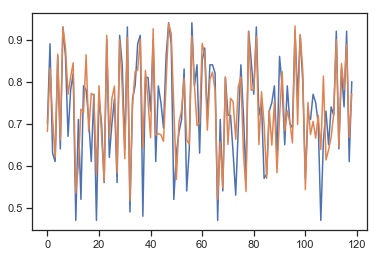

In [40]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(BagRegP1) )], BagRegP1)
plt.show()

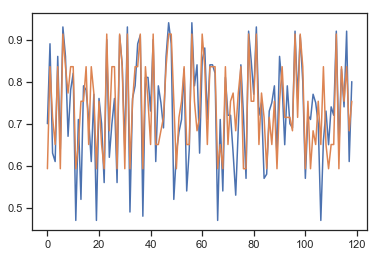

In [41]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(DecTreeP1) )], DecTreeP1)
plt.show()

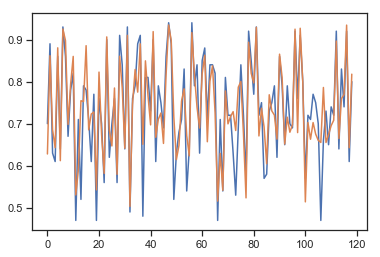

In [42]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(CatModelP1) )], CatModelP1)
plt.show()

In [43]:
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, BagRegP1))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, BagRegP1))
print("Коэффициент детерминации:\t",r2_score(TestY, BagRegP1))

Средняя абсолютная ошибка:	 0.04996201680672339
Средняя квадратичная ошибка:	 0.004608168678991673
Коэффициент детерминации:	 0.696334697423951


In [44]:
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, DecTreeP1))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, DecTreeP1))
print("Коэффициент детерминации:\t",r2_score(TestY, DecTreeP1))

Средняя абсолютная ошибка:	 0.05883784687964256
Средняя квадратичная ошибка:	 0.006007195544578921
Коэффициент детерминации:	 0.60414277780361


In [45]:
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, CatModelP1))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, CatModelP1))
print("Коэффициент детерминации:\t",r2_score(TestY, CatModelP1))

Средняя абсолютная ошибка:	 0.04714198357248925
Средняя квадратичная ошибка:	 0.004033817514983304
Коэффициент детерминации:	 0.7341828171767354
